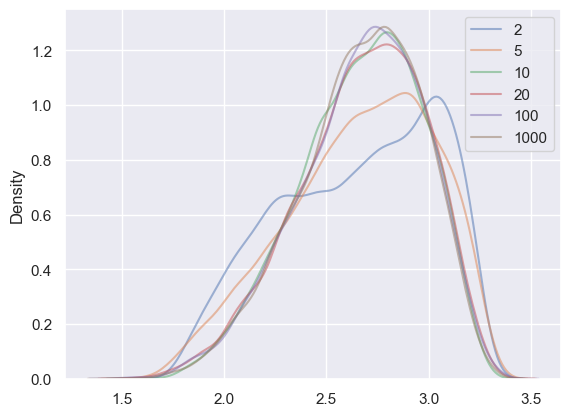

In [181]:
from scipy import stats

# N = 10000
# alpha = np.random.randn()
# beta = np.random.randn(1000)
# for p in [2,5,10,20,100,1000]:
#     X = np.random.rand(N*p).reshape((N,p))
#     eta = 2*(X-0.5).dot(beta[:p])/np.sqrt(p) + alpha
#     z = eta
#     sns.kdeplot(z, alpha=0.5, label=p)
# plt.legend()
# # plt.xlim(0,1)


N = 10000
alpha = np.random.randn()
beta = np.random.randn(1000)
for p in [2,5,10,20,100,1000]:
    X = np.random.rand(N*p).reshape((N,p))
    eta = 2*(X-0.5).dot(beta[:p])/np.sqrt(p) + alpha
    z = 1 + 5*gam*stats.logistic.cdf(eta)
    sns.kdeplot(z, alpha=0.5, label=p)
plt.legend()
# plt.xlim(0,1)

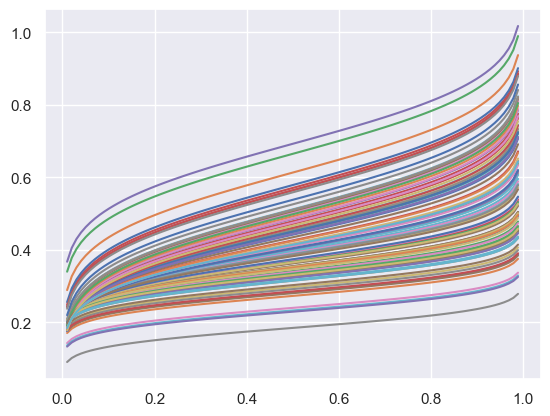

In [208]:

from scipy import stats

p = 10


for i in range(100):
    alpha=np.random.randn()
    beta=np.random.randn(p)
    sig0=1
    gam=2.5
    STD_NORMAL_Q = stats.norm.ppf(W1d.Wasserstein1D.GRID)

    x = np.random.randn(p)
    mu = 2*(x-0.5).dot(beta)/np.sqrt(p) + alpha
    sig = sig0 + gam*stats.logistic.cdf(mu)
    Q0 = mu + sig * STD_NORMAL_Q
    
    plt.plot(W1d.Wasserstein1D.GRID, Q0/25+0.4) # scale to [0, 1]

In [1]:
import sys, os; sys.path.append(os.path.dirname(os.getcwd())) 
from benchmark import bench

import numpy as np
from scipy import stats

from pyfrechet.metric_spaces import *
import pyfrechet.metric_spaces.wasserstein_1d as W1d

OUT_FILE = 'result_wasserstein_cross_est_new_dgp.json'

def gen_data(N, p, alpha, beta, sig0=1, gam=2.5):
    M = W1d.Wasserstein1D()
    STD_NORMAL_Q = stats.norm.ppf(W1d.Wasserstein1D.GRID)
    def m(x):
        mu = 2*(x-0.5).dot(beta)/np.sqrt(p) + alpha
        sig = sig0 + gam*stats.logistic.cdf(mu)
        Q0 = mu + sig * STD_NORMAL_Q
        return Q0/25+0.4 # scale to [0, 1]

    compose = lambda f, g: np.interp(g, W1d.Wasserstein1D.GRID, f)
    x = np.random.rand(N*p).reshape((N,p))
    mx = np.array([ compose(M.GRID, m(x[i,:])) for i in range(N)])
    y = np.array([ compose(W1d.noise(), mx[i,:]) for i in range(N)])

    return x, MetricData(M, y), MetricData(M, mx)

bench(
    gen_data,
    OUT_FILE,
    ps=[2, 5, 10, 20],
    Ns=[50,100,200,400],
    replicas=25
)

INFO: Using numpy backend
INFO: NumExpr defaulting to 8 threads.


[2023-06-08 11:10:59.089538] Progress: N=50	p=2	i=0
[2023-06-08 11:10:59.097501] Distances for cart_2means
[2023-06-08 11:10:59.097518] dt = 0
[2023-06-08 11:10:59.097522] Fitting for cart_2means
[2023-06-08 11:10:59.133811] dt = 0.036309242248535156
[2023-06-08 11:10:59.133858] MSE for cart_2means
[2023-06-08 11:10:59.137738] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    2.1s finished


[2023-06-08 11:11:01.251022] dt = 2.1132659912109375
[2023-06-08 11:11:01.251124] Fitting for medoid_2means
[2023-06-08 11:11:01.428959] dt = 0.17795276641845703
[2023-06-08 11:11:01.429003] MSE for medoid_2means
[2023-06-08 11:11:01.433225] Distances for medoid_greedy
[2023-06-08 11:11:01.433239] dt = 0.0
[2023-06-08 11:11:01.433243] Fitting for medoid_greedy
[2023-06-08 11:11:01.439220] dt = 0.005995035171508789
[2023-06-08 11:11:01.439228] MSE for medoid_greedy
[2023-06-08 11:11:01.443767] Progress: N=50	p=2	i=1
[2023-06-08 11:11:01.465661] Distances for cart_2means
[2023-06-08 11:11:01.465807] dt = 0
[2023-06-08 11:11:01.465818] Fitting for cart_2means
[2023-06-08 11:11:01.549778] dt = 0.08411693572998047
[2023-06-08 11:11:01.549802] MSE for cart_2means
[2023-06-08 11:11:01.552826] Distances for medoid_2means
[2023-06-08 11:11:01.581111] dt = 0.028268098831176758
[2023-06-08 11:11:01.581126] Fitting for medoid_2means
[2023-06-08 11:11:01.603300] dt = 0.022207021713256836
[2023-06-0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:01.681515] dt = 0.015424966812133789
[2023-06-08 11:11:01.681641] MSE for medoid_2means
[2023-06-08 11:11:01.684394] Distances for medoid_greedy
[2023-06-08 11:11:01.684402] dt = 0.0
[2023-06-08 11:11:01.684406] Fitting for medoid_greedy
[2023-06-08 11:11:01.690404] dt = 0.006010293960571289
[2023-06-08 11:11:01.690411] MSE for medoid_greedy
[2023-06-08 11:11:01.693248] Progress: N=50	p=2	i=3
[2023-06-08 11:11:01.700994] Distances for cart_2means
[2023-06-08 11:11:01.701010] dt = 0
[2023-06-08 11:11:01.701013] Fitting for cart_2means
[2023-06-08 11:11:01.716981] dt = 0.015986919403076172
[2023-06-08 11:11:01.716999] MSE for cart_2means
[2023-06-08 11:11:01.719410] Distances for medoid_2means
[2023-06-08 11:11:01.741743] dt = 0.022327184677124023
[2023-06-08 11:11:01.741756] Fitting for medoid_2means
[2023-06-08 11:11:01.758004] dt = 0.016265869140625
[2023-06-08 11:11:01.758019] MSE for medoid_2means
[2023-06-08 11:11:01.760570] Distances for medoid_greedy
[2023-06-08

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:01.900458] dt = 0.023833751678466797
[2023-06-08 11:11:01.900520] Fitting for medoid_2means
[2023-06-08 11:11:01.919663] dt = 0.019210338592529297
[2023-06-08 11:11:01.919684] MSE for medoid_2means
[2023-06-08 11:11:01.922128] Distances for medoid_greedy
[2023-06-08 11:11:01.922134] dt = 0.0
[2023-06-08 11:11:01.922138] Fitting for medoid_greedy
[2023-06-08 11:11:01.928117] dt = 0.005988121032714844
[2023-06-08 11:11:01.928136] MSE for medoid_greedy
[2023-06-08 11:11:01.930906] Progress: N=50	p=2	i=6
[2023-06-08 11:11:01.938182] Distances for cart_2means
[2023-06-08 11:11:01.938188] dt = 0
[2023-06-08 11:11:01.938191] Fitting for cart_2means
[2023-06-08 11:11:01.955260] dt = 0.017076969146728516
[2023-06-08 11:11:01.955277] MSE for cart_2means
[2023-06-08 11:11:01.957636] Distances for medoid_2means
[2023-06-08 11:11:01.980075] dt = 0.022433042526245117
[2023-06-08 11:11:01.980089] Fitting for medoid_2means
[2023-06-08 11:11:01.996609] dt = 0.01653885841369629
[2023-0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:02.113227] dt = 0.017055988311767578
[2023-06-08 11:11:02.113297] MSE for cart_2means
[2023-06-08 11:11:02.116284] Distances for medoid_2means
[2023-06-08 11:11:02.140200] dt = 0.023897886276245117
[2023-06-08 11:11:02.140214] Fitting for medoid_2means
[2023-06-08 11:11:02.155630] dt = 0.015449047088623047
[2023-06-08 11:11:02.155649] MSE for medoid_2means
[2023-06-08 11:11:02.158075] Distances for medoid_greedy
[2023-06-08 11:11:02.158081] dt = 0.0
[2023-06-08 11:11:02.158084] Fitting for medoid_greedy
[2023-06-08 11:11:02.163983] dt = 0.005908012390136719
[2023-06-08 11:11:02.163997] MSE for medoid_greedy
[2023-06-08 11:11:02.166688] Progress: N=50	p=2	i=9
[2023-06-08 11:11:02.173953] Distances for cart_2means
[2023-06-08 11:11:02.173959] dt = 0
[2023-06-08 11:11:02.173962] Fitting for cart_2means
[2023-06-08 11:11:02.190307] dt = 0.016351938247680664
[2023-06-08 11:11:02.190323] MSE for cart_2means
[2023-06-08 11:11:02.192751] Distances for medoid_2means
[2023-06-0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:02.318717] Progress: N=50	p=2	i=11
[2023-06-08 11:11:02.326243] Distances for cart_2means
[2023-06-08 11:11:02.326250] dt = 0
[2023-06-08 11:11:02.326253] Fitting for cart_2means
[2023-06-08 11:11:02.345086] dt = 0.01884174346923828
[2023-06-08 11:11:02.345107] MSE for cart_2means
[2023-06-08 11:11:02.347823] Distances for medoid_2means
[2023-06-08 11:11:02.370784] dt = 0.022942066192626953
[2023-06-08 11:11:02.370797] Fitting for medoid_2means
[2023-06-08 11:11:02.385994] dt = 0.015228748321533203
[2023-06-08 11:11:02.386013] MSE for medoid_2means
[2023-06-08 11:11:02.388565] Distances for medoid_greedy
[2023-06-08 11:11:02.388573] dt = 0.0
[2023-06-08 11:11:02.388577] Fitting for medoid_greedy
[2023-06-08 11:11:02.395329] dt = 0.006762981414794922
[2023-06-08 11:11:02.395341] MSE for medoid_greedy
[2023-06-08 11:11:02.398072] Progress: N=50	p=2	i=12
[2023-06-08 11:11:02.405547] Distances for cart_2means
[2023-06-08 11:11:02.405553] dt = 0
[2023-06-08 11:11:02.405556

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-08 11:11:02.522125] dt = 0.023054122924804688
[2023-06-08 11:11:02.522328] Fitting for medoid_2means
[2023-06-08 11:11:02.534770] dt = 0.012657880783081055
[2023-06-08 11:11:02.534837] MSE for medoid_2means
[2023-06-08 11:11:02.537376] Distances for medoid_greedy
[2023-06-08 11:11:02.537387] dt = 0.0
[2023-06-08 11:11:02.537391] Fitting for medoid_greedy
[2023-06-08 11:11:02.544729] dt = 0.007353067398071289
[2023-06-08 11:11:02.544746] MSE for medoid_greedy
[2023-06-08 11:11:02.547626] Progress: N=50	p=2	i=14
[2023-06-08 11:11:02.555266] Distances for cart_2means
[2023-06-08 11:11:02.555276] dt = 0
[2023-06-08 11:11:02.555280] Fitting for cart_2means
[2023-06-08 11:11:02.573877] dt = 0.01861095428466797
[2023-06-08 11:11:02.573897] MSE for cart_2means
[2023-06-08 11:11:02.576423] Distances for medoid_2means
[2023-06-08 11:11:02.628881] dt = 0.05244803428649902
[2023-06-08 11:11:02.628897] Fitting for medoid_2means
[2023-06-08 11:11:02.665448] dt = 0.0365748405456543
[2023-06-

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:02.728686] dt = 0.023695945739746094
[2023-06-08 11:11:02.728770] Fitting for medoid_2means
[2023-06-08 11:11:02.748312] dt = 0.01963210105895996
[2023-06-08 11:11:02.748336] MSE for medoid_2means
[2023-06-08 11:11:02.750868] Distances for medoid_greedy
[2023-06-08 11:11:02.750874] dt = 9.5367431640625e-07
[2023-06-08 11:11:02.750879] Fitting for medoid_greedy
[2023-06-08 11:11:02.756946] dt = 0.0060770511627197266
[2023-06-08 11:11:02.756952] MSE for medoid_greedy
[2023-06-08 11:11:02.759726] Progress: N=50	p=2	i=16
[2023-06-08 11:11:02.767418] Distances for cart_2means
[2023-06-08 11:11:02.767435] dt = 0
[2023-06-08 11:11:02.767438] Fitting for cart_2means
[2023-06-08 11:11:02.784037] dt = 0.016618967056274414
[2023-06-08 11:11:02.784058] MSE for cart_2means
[2023-06-08 11:11:02.786436] Distances for medoid_2means
[2023-06-08 11:11:02.808936] dt = 0.022494077682495117
[2023-06-08 11:11:02.808949] Fitting for medoid_2means
[2023-06-08 11:11:02.825546] dt = 0.01661586

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:03.152424] dt = 0.007525920867919922
[2023-06-08 11:11:03.152476] MSE for medoid_greedy
[2023-06-08 11:11:03.155648] Progress: N=50	p=2	i=21
[2023-06-08 11:11:03.163245] Distances for cart_2means
[2023-06-08 11:11:03.163264] dt = 0
[2023-06-08 11:11:03.163268] Fitting for cart_2means
[2023-06-08 11:11:03.183636] dt = 0.020389795303344727
[2023-06-08 11:11:03.183676] MSE for cart_2means
[2023-06-08 11:11:03.186710] Distances for medoid_2means
[2023-06-08 11:11:03.210343] dt = 0.023620128631591797
[2023-06-08 11:11:03.210356] Fitting for medoid_2means
[2023-06-08 11:11:03.225835] dt = 0.015504837036132812
[2023-06-08 11:11:03.225855] MSE for medoid_2means
[2023-06-08 11:11:03.228324] Distances for medoid_greedy
[2023-06-08 11:11:03.228332] dt = 0.0
[2023-06-08 11:11:03.228336] Fitting for medoid_greedy
[2023-06-08 11:11:03.234385] dt = 0.006062030792236328
[2023-06-08 11:11:03.234393] MSE for medoid_greedy
[2023-06-08 11:11:03.237301] Progress: N=50	p=2	i=22
[2023-06-08

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:03.356148] dt = 0.02297496795654297
[2023-06-08 11:11:03.356216] Fitting for medoid_2means
[2023-06-08 11:11:03.371883] dt = 0.01574087142944336
[2023-06-08 11:11:03.371903] MSE for medoid_2means
[2023-06-08 11:11:03.374329] Distances for medoid_greedy
[2023-06-08 11:11:03.374335] dt = 0.0
[2023-06-08 11:11:03.374339] Fitting for medoid_greedy
[2023-06-08 11:11:03.380369] dt = 0.006036996841430664
[2023-06-08 11:11:03.380397] MSE for medoid_greedy
[2023-06-08 11:11:03.383595] Progress: N=50	p=2	i=24
[2023-06-08 11:11:03.392080] Distances for cart_2means
[2023-06-08 11:11:03.392089] dt = 0
[2023-06-08 11:11:03.392093] Fitting for cart_2means
[2023-06-08 11:11:03.413525] dt = 0.021443843841552734
[2023-06-08 11:11:03.413554] MSE for cart_2means
[2023-06-08 11:11:03.416240] Distances for medoid_2means
[2023-06-08 11:11:03.439273] dt = 0.023013830184936523
[2023-06-08 11:11:03.439286] Fitting for medoid_2means
[2023-06-08 11:11:03.456478] dt = 0.01722407341003418
[2023-06

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:03.584626] dt = 0.043234825134277344
[2023-06-08 11:11:03.584698] MSE for medoid_2means
[2023-06-08 11:11:03.587350] Distances for medoid_greedy
[2023-06-08 11:11:03.587357] dt = 1.1920928955078125e-06
[2023-06-08 11:11:03.587362] Fitting for medoid_greedy
[2023-06-08 11:11:03.605437] dt = 0.01808452606201172
[2023-06-08 11:11:03.605455] MSE for medoid_greedy
[2023-06-08 11:11:03.608372] Progress: N=50	p=5	i=1
[2023-06-08 11:11:03.615986] Distances for cart_2means
[2023-06-08 11:11:03.616002] dt = 0
[2023-06-08 11:11:03.616006] Fitting for cart_2means
[2023-06-08 11:11:03.662898] dt = 0.04691123962402344
[2023-06-08 11:11:03.662918] MSE for cart_2means
[2023-06-08 11:11:03.665381] Distances for medoid_2means
[2023-06-08 11:11:03.687731] dt = 0.02234172821044922
[2023-06-08 11:11:03.687743] Fitting for medoid_2means
[2023-06-08 11:11:03.730085] dt = 0.04236125946044922
[2023-06-08 11:11:03.730139] MSE for medoid_2means
[2023-06-08 11:11:03.732620] Distances for medoid_

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:03.800796] dt = 0.041799068450927734
[2023-06-08 11:11:03.800872] MSE for cart_2means
[2023-06-08 11:11:03.803604] Distances for medoid_2means
[2023-06-08 11:11:03.827247] dt = 0.023632049560546875
[2023-06-08 11:11:03.827262] Fitting for medoid_2means
[2023-06-08 11:11:03.864537] dt = 0.037301063537597656
[2023-06-08 11:11:03.864556] MSE for medoid_2means
[2023-06-08 11:11:03.866966] Distances for medoid_greedy
[2023-06-08 11:11:03.866972] dt = 1.1920928955078125e-06
[2023-06-08 11:11:03.866977] Fitting for medoid_greedy
[2023-06-08 11:11:03.881137] dt = 0.014166831970214844
[2023-06-08 11:11:03.881164] MSE for medoid_greedy
[2023-06-08 11:11:03.884321] Progress: N=50	p=5	i=3
[2023-06-08 11:11:03.891731] Distances for cart_2means
[2023-06-08 11:11:03.891736] dt = 0
[2023-06-08 11:11:03.891739] Fitting for cart_2means
[2023-06-08 11:11:03.935622] dt = 0.043891191482543945
[2023-06-08 11:11:03.935642] MSE for cart_2means
[2023-06-08 11:11:03.938021] Distances for medoi

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:04.008856] dt = 0.016386985778808594
[2023-06-08 11:11:04.008914] MSE for medoid_greedy
[2023-06-08 11:11:04.012156] Progress: N=50	p=5	i=4
[2023-06-08 11:11:04.019446] Distances for cart_2means
[2023-06-08 11:11:04.019461] dt = 0
[2023-06-08 11:11:04.019464] Fitting for cart_2means
[2023-06-08 11:11:04.058187] dt = 0.038741111755371094
[2023-06-08 11:11:04.058208] MSE for cart_2means
[2023-06-08 11:11:04.060673] Distances for medoid_2means
[2023-06-08 11:11:04.083259] dt = 0.02257823944091797
[2023-06-08 11:11:04.083273] Fitting for medoid_2means
[2023-06-08 11:11:04.117188] dt = 0.0339357852935791
[2023-06-08 11:11:04.117208] MSE for medoid_2means
[2023-06-08 11:11:04.119743] Distances for medoid_greedy
[2023-06-08 11:11:04.119750] dt = 0.0
[2023-06-08 11:11:04.119754] Fitting for medoid_greedy
[2023-06-08 11:11:04.134116] dt = 0.014372110366821289
[2023-06-08 11:11:04.134137] MSE for medoid_greedy
[2023-06-08 11:11:04.137229] Progress: N=50	p=5	i=5
[2023-06-08 11:1

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:04.242066] dt = 0.03548598289489746
[2023-06-08 11:11:04.242137] MSE for medoid_2means
[2023-06-08 11:11:04.244861] Distances for medoid_greedy
[2023-06-08 11:11:04.244872] dt = 0.0
[2023-06-08 11:11:04.244876] Fitting for medoid_greedy
[2023-06-08 11:11:04.260193] dt = 0.01533198356628418
[2023-06-08 11:11:04.260206] MSE for medoid_greedy
[2023-06-08 11:11:04.263346] Progress: N=50	p=5	i=6
[2023-06-08 11:11:04.270798] Distances for cart_2means
[2023-06-08 11:11:04.270807] dt = 0
[2023-06-08 11:11:04.270810] Fitting for cart_2means
[2023-06-08 11:11:04.318467] dt = 0.0476689338684082
[2023-06-08 11:11:04.318486] MSE for cart_2means
[2023-06-08 11:11:04.320895] Distances for medoid_2means
[2023-06-08 11:11:04.343491] dt = 0.022588729858398438
[2023-06-08 11:11:04.343507] Fitting for medoid_2means
[2023-06-08 11:11:04.389862] dt = 0.046378374099731445
[2023-06-08 11:11:04.389878] MSE for medoid_2means
[2023-06-08 11:11:04.392409] Distances for medoid_greedy
[2023-06-08 

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:04.687447] dt = 0.01481485366821289
[2023-06-08 11:11:04.687515] MSE for medoid_greedy
[2023-06-08 11:11:04.691083] Progress: N=50	p=5	i=9
[2023-06-08 11:11:04.698799] Distances for cart_2means
[2023-06-08 11:11:04.698814] dt = 0
[2023-06-08 11:11:04.698817] Fitting for cart_2means
[2023-06-08 11:11:04.741173] dt = 0.0423738956451416
[2023-06-08 11:11:04.741192] MSE for cart_2means
[2023-06-08 11:11:04.743691] Distances for medoid_2means
[2023-06-08 11:11:04.766124] dt = 0.022422075271606445
[2023-06-08 11:11:04.766137] Fitting for medoid_2means
[2023-06-08 11:11:04.807021] dt = 0.04090690612792969
[2023-06-08 11:11:04.807040] MSE for medoid_2means
[2023-06-08 11:11:04.809532] Distances for medoid_greedy
[2023-06-08 11:11:04.809537] dt = 0.0
[2023-06-08 11:11:04.809541] Fitting for medoid_greedy
[2023-06-08 11:11:04.827166] dt = 0.017633914947509766
[2023-06-08 11:11:04.827179] MSE for medoid_greedy
[2023-06-08 11:11:04.830245] Progress: N=50	p=5	i=10
[2023-06-08 11:1

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:04.898496] dt = 0.02340102195739746
[2023-06-08 11:11:04.898568] Fitting for medoid_2means
[2023-06-08 11:11:04.942562] dt = 0.04407000541687012
[2023-06-08 11:11:04.942581] MSE for medoid_2means
[2023-06-08 11:11:04.945088] Distances for medoid_greedy
[2023-06-08 11:11:04.945098] dt = 9.5367431640625e-07
[2023-06-08 11:11:04.945105] Fitting for medoid_greedy
[2023-06-08 11:11:04.960619] dt = 0.015529155731201172
[2023-06-08 11:11:04.960649] MSE for medoid_greedy
[2023-06-08 11:11:04.963962] Progress: N=50	p=5	i=11
[2023-06-08 11:11:04.971407] Distances for cart_2means
[2023-06-08 11:11:04.971416] dt = 0
[2023-06-08 11:11:04.971419] Fitting for cart_2means
[2023-06-08 11:11:05.016123] dt = 0.044714927673339844
[2023-06-08 11:11:05.016141] MSE for cart_2means
[2023-06-08 11:11:05.018626] Distances for medoid_2means
[2023-06-08 11:11:05.041352] dt = 0.022719860076904297
[2023-06-08 11:11:05.041364] Fitting for medoid_2means
[2023-06-08 11:11:05.075885] dt = 0.0345392227

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:05.105011] Distances for cart_2means
[2023-06-08 11:11:05.105098] dt = 0
[2023-06-08 11:11:05.105103] Fitting for cart_2means
[2023-06-08 11:11:05.149905] dt = 0.044893741607666016
[2023-06-08 11:11:05.149924] MSE for cart_2means
[2023-06-08 11:11:05.152373] Distances for medoid_2means
[2023-06-08 11:11:05.174689] dt = 0.022310256958007812
[2023-06-08 11:11:05.174702] Fitting for medoid_2means
[2023-06-08 11:11:05.209590] dt = 0.03490471839904785
[2023-06-08 11:11:05.209609] MSE for medoid_2means
[2023-06-08 11:11:05.212044] Distances for medoid_greedy
[2023-06-08 11:11:05.212054] dt = 9.5367431640625e-07
[2023-06-08 11:11:05.212060] Fitting for medoid_greedy
[2023-06-08 11:11:05.226899] dt = 0.01485300064086914
[2023-06-08 11:11:05.226911] MSE for medoid_greedy
[2023-06-08 11:11:05.230093] Progress: N=50	p=5	i=13
[2023-06-08 11:11:05.237769] Distances for cart_2means
[2023-06-08 11:11:05.237788] dt = 0
[2023-06-08 11:11:05.237792] Fitting for cart_2means
[2023-06-08 

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:05.346299] dt = 0.04094195365905762
[2023-06-08 11:11:05.346380] MSE for medoid_2means
[2023-06-08 11:11:05.349180] Distances for medoid_greedy
[2023-06-08 11:11:05.349197] dt = 0.0
[2023-06-08 11:11:05.349201] Fitting for medoid_greedy
[2023-06-08 11:11:05.368719] dt = 0.019538164138793945
[2023-06-08 11:11:05.368744] MSE for medoid_greedy
[2023-06-08 11:11:05.371978] Progress: N=50	p=5	i=14
[2023-06-08 11:11:05.379524] Distances for cart_2means
[2023-06-08 11:11:05.379541] dt = 0
[2023-06-08 11:11:05.379545] Fitting for cart_2means
[2023-06-08 11:11:05.434334] dt = 0.054808855056762695
[2023-06-08 11:11:05.434353] MSE for cart_2means
[2023-06-08 11:11:05.436846] Distances for medoid_2means
[2023-06-08 11:11:05.459399] dt = 0.022546768188476562
[2023-06-08 11:11:05.459413] Fitting for medoid_2means
[2023-06-08 11:11:05.495228] dt = 0.03583502769470215
[2023-06-08 11:11:05.495248] MSE for medoid_2means
[2023-06-08 11:11:05.497653] Distances for medoid_greedy
[2023-06-

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:05.782978] dt = 0.019334793090820312
[2023-06-08 11:11:05.783326] MSE for medoid_greedy
[2023-06-08 11:11:05.787579] Progress: N=50	p=5	i=17
[2023-06-08 11:11:05.795176] Distances for cart_2means
[2023-06-08 11:11:05.795195] dt = 0
[2023-06-08 11:11:05.795198] Fitting for cart_2means
[2023-06-08 11:11:05.856131] dt = 0.06095623970031738
[2023-06-08 11:11:05.856150] MSE for cart_2means
[2023-06-08 11:11:05.858517] Distances for medoid_2means
[2023-06-08 11:11:05.880733] dt = 0.022209644317626953
[2023-06-08 11:11:05.880746] Fitting for medoid_2means
[2023-06-08 11:11:05.920741] dt = 0.04001450538635254
[2023-06-08 11:11:05.920761] MSE for medoid_2means
[2023-06-08 11:11:05.923222] Distances for medoid_greedy
[2023-06-08 11:11:05.923228] dt = 0.0
[2023-06-08 11:11:05.923231] Fitting for medoid_greedy
[2023-06-08 11:11:05.941995] dt = 0.018772125244140625
[2023-06-08 11:11:05.942013] MSE for medoid_greedy
[2023-06-08 11:11:05.945233] Progress: N=50	p=5	i=18
[2023-06-08 1

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:06.014514] dt = 0.06158304214477539
[2023-06-08 11:11:06.014725] MSE for cart_2means
[2023-06-08 11:11:06.018061] Distances for medoid_2means
[2023-06-08 11:11:06.056067] dt = 0.037982940673828125
[2023-06-08 11:11:06.056081] Fitting for medoid_2means
[2023-06-08 11:11:06.130075] dt = 0.07402920722961426
[2023-06-08 11:11:06.130119] MSE for medoid_2means
[2023-06-08 11:11:06.133986] Distances for medoid_greedy
[2023-06-08 11:11:06.133998] dt = 1.1920928955078125e-06
[2023-06-08 11:11:06.134005] Fitting for medoid_greedy
[2023-06-08 11:11:06.148022] dt = 0.014033794403076172
[2023-06-08 11:11:06.148039] MSE for medoid_greedy
[2023-06-08 11:11:06.151190] Progress: N=50	p=5	i=19
[2023-06-08 11:11:06.158694] Distances for cart_2means
[2023-06-08 11:11:06.158700] dt = 0
[2023-06-08 11:11:06.158703] Fitting for cart_2means
[2023-06-08 11:11:06.202041] dt = 0.04334521293640137
[2023-06-08 11:11:06.202060] MSE for cart_2means
[2023-06-08 11:11:06.204472] Distances for medoid_

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:06.227537] dt = 0.0230562686920166
[2023-06-08 11:11:06.227604] Fitting for medoid_2means
[2023-06-08 11:11:06.264808] dt = 0.0372774600982666
[2023-06-08 11:11:06.264827] MSE for medoid_2means
[2023-06-08 11:11:06.267330] Distances for medoid_greedy
[2023-06-08 11:11:06.267337] dt = 0.0
[2023-06-08 11:11:06.267341] Fitting for medoid_greedy
[2023-06-08 11:11:06.282300] dt = 0.014969110488891602
[2023-06-08 11:11:06.282316] MSE for medoid_greedy
[2023-06-08 11:11:06.285416] Progress: N=50	p=5	i=20
[2023-06-08 11:11:06.293134] Distances for cart_2means
[2023-06-08 11:11:06.293140] dt = 0
[2023-06-08 11:11:06.293143] Fitting for cart_2means
[2023-06-08 11:11:06.343244] dt = 0.050109148025512695
[2023-06-08 11:11:06.343268] MSE for cart_2means
[2023-06-08 11:11:06.345808] Distances for medoid_2means
[2023-06-08 11:11:06.368286] dt = 0.022459983825683594
[2023-06-08 11:11:06.368300] Fitting for medoid_2means
[2023-06-08 11:11:06.407286] dt = 0.039015769958496094
[2023-06-

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:06.632690] dt = 0.0480189323425293
[2023-06-08 11:11:06.632738] MSE for cart_2means
[2023-06-08 11:11:06.635388] Distances for medoid_2means
[2023-06-08 11:11:06.657966] dt = 0.022569894790649414
[2023-06-08 11:11:06.657978] Fitting for medoid_2means
[2023-06-08 11:11:06.699048] dt = 0.04108905792236328
[2023-06-08 11:11:06.699066] MSE for medoid_2means
[2023-06-08 11:11:06.701529] Distances for medoid_greedy
[2023-06-08 11:11:06.701535] dt = 9.5367431640625e-07
[2023-06-08 11:11:06.701540] Fitting for medoid_greedy
[2023-06-08 11:11:06.716640] dt = 0.015107870101928711
[2023-06-08 11:11:06.716663] MSE for medoid_greedy
[2023-06-08 11:11:06.719951] Progress: N=50	p=5	i=23
[2023-06-08 11:11:06.727375] Distances for cart_2means
[2023-06-08 11:11:06.727385] dt = 0
[2023-06-08 11:11:06.727388] Fitting for cart_2means
[2023-06-08 11:11:06.772982] dt = 0.04560589790344238
[2023-06-08 11:11:06.773000] MSE for cart_2means
[2023-06-08 11:11:06.775383] Distances for medoid_2mea

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:06.836271] Distances for medoid_greedy
[2023-06-08 11:11:06.836324] dt = 9.5367431640625e-07
[2023-06-08 11:11:06.836333] Fitting for medoid_greedy
[2023-06-08 11:11:06.851608] dt = 0.0153350830078125
[2023-06-08 11:11:06.851630] MSE for medoid_greedy
[2023-06-08 11:11:06.854787] Progress: N=50	p=5	i=24
[2023-06-08 11:11:06.862620] Distances for cart_2means
[2023-06-08 11:11:06.862643] dt = 0
[2023-06-08 11:11:06.862647] Fitting for cart_2means
[2023-06-08 11:11:06.905714] dt = 0.043094635009765625
[2023-06-08 11:11:06.905733] MSE for cart_2means
[2023-06-08 11:11:06.908179] Distances for medoid_2means
[2023-06-08 11:11:06.930268] dt = 0.022082090377807617
[2023-06-08 11:11:06.930281] Fitting for medoid_2means
[2023-06-08 11:11:06.965748] dt = 0.03548479080200195
[2023-06-08 11:11:06.965767] MSE for medoid_2means
[2023-06-08 11:11:06.968182] Distances for medoid_greedy
[2023-06-08 11:11:06.968188] dt = 0.0
[2023-06-08 11:11:06.968191] Fitting for medoid_greedy
[2023-0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:07.370973] dt = 0.10288476943969727
[2023-06-08 11:11:07.371053] MSE for cart_2means
[2023-06-08 11:11:07.373732] Distances for medoid_2means
[2023-06-08 11:11:07.396414] dt = 0.0226747989654541
[2023-06-08 11:11:07.396428] Fitting for medoid_2means
[2023-06-08 11:11:07.476652] dt = 0.0802450180053711
[2023-06-08 11:11:07.476675] MSE for medoid_2means
[2023-06-08 11:11:07.479116] Distances for medoid_greedy
[2023-06-08 11:11:07.479122] dt = 0.0
[2023-06-08 11:11:07.479126] Fitting for medoid_greedy
[2023-06-08 11:11:07.508938] dt = 0.029820919036865234
[2023-06-08 11:11:07.508947] MSE for medoid_greedy
[2023-06-08 11:11:07.512215] Progress: N=50	p=10	i=2
[2023-06-08 11:11:07.519557] Distances for cart_2means
[2023-06-08 11:11:07.519563] dt = 0
[2023-06-08 11:11:07.519566] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:07.618984] dt = 0.0994257926940918
[2023-06-08 11:11:07.619060] MSE for cart_2means
[2023-06-08 11:11:07.621992] Distances for medoid_2means
[2023-06-08 11:11:07.644830] dt = 0.02283000946044922
[2023-06-08 11:11:07.644844] Fitting for medoid_2means
[2023-06-08 11:11:07.718225] dt = 0.07340288162231445
[2023-06-08 11:11:07.718245] MSE for medoid_2means
[2023-06-08 11:11:07.720806] Distances for medoid_greedy
[2023-06-08 11:11:07.720814] dt = 9.5367431640625e-07
[2023-06-08 11:11:07.720820] Fitting for medoid_greedy
[2023-06-08 11:11:07.753769] dt = 0.032961130142211914
[2023-06-08 11:11:07.753788] MSE for medoid_greedy
[2023-06-08 11:11:07.757897] Progress: N=50	p=10	i=3
[2023-06-08 11:11:07.765240] Distances for cart_2means
[2023-06-08 11:11:07.765253] dt = 0
[2023-06-08 11:11:07.765256] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:07.836125] dt = 0.07088494300842285
[2023-06-08 11:11:07.836211] MSE for cart_2means
[2023-06-08 11:11:07.839038] Distances for medoid_2means
[2023-06-08 11:11:07.862521] dt = 0.02347111701965332
[2023-06-08 11:11:07.862544] Fitting for medoid_2means
[2023-06-08 11:11:07.937957] dt = 0.07544708251953125
[2023-06-08 11:11:07.937995] MSE for medoid_2means
[2023-06-08 11:11:07.940661] Distances for medoid_greedy
[2023-06-08 11:11:07.940672] dt = 9.5367431640625e-07
[2023-06-08 11:11:07.940679] Fitting for medoid_greedy
[2023-06-08 11:11:07.968770] dt = 0.02810811996459961
[2023-06-08 11:11:07.968792] MSE for medoid_greedy
[2023-06-08 11:11:07.972903] Progress: N=50	p=10	i=4
[2023-06-08 11:11:07.980492] Distances for cart_2means
[2023-06-08 11:11:07.980502] dt = 0
[2023-06-08 11:11:07.980506] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:08.076429] dt = 0.09593701362609863
[2023-06-08 11:11:08.076509] MSE for cart_2means
[2023-06-08 11:11:08.079395] Distances for medoid_2means
[2023-06-08 11:11:08.102780] dt = 0.02335834503173828
[2023-06-08 11:11:08.102793] Fitting for medoid_2means
[2023-06-08 11:11:08.187661] dt = 0.08490872383117676
[2023-06-08 11:11:08.187681] MSE for medoid_2means
[2023-06-08 11:11:08.190181] Distances for medoid_greedy
[2023-06-08 11:11:08.190187] dt = 9.5367431640625e-07
[2023-06-08 11:11:08.190193] Fitting for medoid_greedy
[2023-06-08 11:11:08.218469] dt = 0.028287172317504883
[2023-06-08 11:11:08.218486] MSE for medoid_greedy
[2023-06-08 11:11:08.221678] Progress: N=50	p=10	i=5
[2023-06-08 11:11:08.229401] Distances for cart_2means
[2023-06-08 11:11:08.229411] dt = 0
[2023-06-08 11:11:08.229414] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:08.313520] dt = 0.08411884307861328
[2023-06-08 11:11:08.313600] MSE for cart_2means
[2023-06-08 11:11:08.316542] Distances for medoid_2means
[2023-06-08 11:11:08.339552] dt = 0.023001909255981445
[2023-06-08 11:11:08.339566] Fitting for medoid_2means
[2023-06-08 11:11:08.412940] dt = 0.0733950138092041
[2023-06-08 11:11:08.412963] MSE for medoid_2means
[2023-06-08 11:11:08.415450] Distances for medoid_greedy
[2023-06-08 11:11:08.415456] dt = 1.1920928955078125e-06
[2023-06-08 11:11:08.415461] Fitting for medoid_greedy
[2023-06-08 11:11:08.448773] dt = 0.03332090377807617
[2023-06-08 11:11:08.448790] MSE for medoid_greedy
[2023-06-08 11:11:08.452758] Progress: N=50	p=10	i=6
[2023-06-08 11:11:08.460276] Distances for cart_2means
[2023-06-08 11:11:08.460283] dt = 0
[2023-06-08 11:11:08.460286] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:08.556839] dt = 0.09656214714050293
[2023-06-08 11:11:08.556920] MSE for cart_2means
[2023-06-08 11:11:08.559625] Distances for medoid_2means
[2023-06-08 11:11:08.583552] dt = 0.023919105529785156
[2023-06-08 11:11:08.583566] Fitting for medoid_2means
[2023-06-08 11:11:08.667149] dt = 0.08360409736633301
[2023-06-08 11:11:08.667168] MSE for medoid_2means
[2023-06-08 11:11:08.669551] Distances for medoid_greedy
[2023-06-08 11:11:08.669557] dt = 0.0
[2023-06-08 11:11:08.669560] Fitting for medoid_greedy
[2023-06-08 11:11:08.700366] dt = 0.030813932418823242
[2023-06-08 11:11:08.700378] MSE for medoid_greedy
[2023-06-08 11:11:08.703634] Progress: N=50	p=10	i=7
[2023-06-08 11:11:08.710877] Distances for cart_2means
[2023-06-08 11:11:08.710885] dt = 0
[2023-06-08 11:11:08.710887] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:08.811246] dt = 0.10036802291870117
[2023-06-08 11:11:08.811328] MSE for cart_2means
[2023-06-08 11:11:08.814125] Distances for medoid_2means
[2023-06-08 11:11:08.836432] dt = 0.02228999137878418
[2023-06-08 11:11:08.836445] Fitting for medoid_2means
[2023-06-08 11:11:08.920990] dt = 0.08457374572753906
[2023-06-08 11:11:08.921009] MSE for medoid_2means
[2023-06-08 11:11:08.923490] Distances for medoid_greedy
[2023-06-08 11:11:08.923497] dt = 0.0
[2023-06-08 11:11:08.923500] Fitting for medoid_greedy
[2023-06-08 11:11:08.960122] dt = 0.03662991523742676
[2023-06-08 11:11:08.960138] MSE for medoid_greedy
[2023-06-08 11:11:08.963747] Progress: N=50	p=10	i=8
[2023-06-08 11:11:08.971734] Distances for cart_2means
[2023-06-08 11:11:08.971740] dt = 0
[2023-06-08 11:11:08.971743] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:09.056660] dt = 0.08492398262023926
[2023-06-08 11:11:09.056735] MSE for cart_2means
[2023-06-08 11:11:09.059510] Distances for medoid_2means
[2023-06-08 11:11:09.083661] dt = 0.024142026901245117
[2023-06-08 11:11:09.083674] Fitting for medoid_2means
[2023-06-08 11:11:09.155043] dt = 0.07139086723327637
[2023-06-08 11:11:09.155064] MSE for medoid_2means
[2023-06-08 11:11:09.157508] Distances for medoid_greedy
[2023-06-08 11:11:09.157514] dt = 1.1920928955078125e-06
[2023-06-08 11:11:09.157519] Fitting for medoid_greedy
[2023-06-08 11:11:09.187363] dt = 0.029852628707885742
[2023-06-08 11:11:09.187380] MSE for medoid_greedy
[2023-06-08 11:11:09.191696] Progress: N=50	p=10	i=9
[2023-06-08 11:11:09.198957] Distances for cart_2means
[2023-06-08 11:11:09.198967] dt = 0
[2023-06-08 11:11:09.198970] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:09.284094] dt = 0.08513593673706055
[2023-06-08 11:11:09.284168] MSE for cart_2means
[2023-06-08 11:11:09.286735] Distances for medoid_2means
[2023-06-08 11:11:09.309973] dt = 0.02323007583618164
[2023-06-08 11:11:09.309986] Fitting for medoid_2means
[2023-06-08 11:11:09.384590] dt = 0.07462477684020996
[2023-06-08 11:11:09.384611] MSE for medoid_2means
[2023-06-08 11:11:09.387099] Distances for medoid_greedy
[2023-06-08 11:11:09.387105] dt = 0.0
[2023-06-08 11:11:09.387108] Fitting for medoid_greedy
[2023-06-08 11:11:09.416936] dt = 0.02983689308166504
[2023-06-08 11:11:09.416957] MSE for medoid_greedy
[2023-06-08 11:11:09.420232] Progress: N=50	p=10	i=10
[2023-06-08 11:11:09.427425] Distances for cart_2means
[2023-06-08 11:11:09.427432] dt = 0
[2023-06-08 11:11:09.427434] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:09.514544] dt = 0.08711814880371094
[2023-06-08 11:11:09.514629] MSE for cart_2means
[2023-06-08 11:11:09.517554] Distances for medoid_2means
[2023-06-08 11:11:09.541071] dt = 0.023504972457885742
[2023-06-08 11:11:09.541084] Fitting for medoid_2means
[2023-06-08 11:11:09.600189] dt = 0.059130191802978516
[2023-06-08 11:11:09.600210] MSE for medoid_2means
[2023-06-08 11:11:09.602676] Distances for medoid_greedy
[2023-06-08 11:11:09.602682] dt = 9.5367431640625e-07
[2023-06-08 11:11:09.602688] Fitting for medoid_greedy
[2023-06-08 11:11:09.634426] dt = 0.031748056411743164
[2023-06-08 11:11:09.634449] MSE for medoid_greedy
[2023-06-08 11:11:09.637761] Progress: N=50	p=10	i=11
[2023-06-08 11:11:09.645242] Distances for cart_2means
[2023-06-08 11:11:09.645251] dt = 0
[2023-06-08 11:11:09.645255] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:09.729232] dt = 0.08398890495300293
[2023-06-08 11:11:09.729307] MSE for cart_2means
[2023-06-08 11:11:09.732053] Distances for medoid_2means
[2023-06-08 11:11:09.755996] dt = 0.023931026458740234
[2023-06-08 11:11:09.756009] Fitting for medoid_2means
[2023-06-08 11:11:09.825527] dt = 0.06954312324523926
[2023-06-08 11:11:09.825547] MSE for medoid_2means
[2023-06-08 11:11:09.828073] Distances for medoid_greedy
[2023-06-08 11:11:09.828083] dt = 1.1920928955078125e-06
[2023-06-08 11:11:09.828089] Fitting for medoid_greedy
[2023-06-08 11:11:09.861766] dt = 0.0336909294128418
[2023-06-08 11:11:09.861796] MSE for medoid_greedy
[2023-06-08 11:11:09.865175] Progress: N=50	p=10	i=12
[2023-06-08 11:11:09.872585] Distances for cart_2means
[2023-06-08 11:11:09.872591] dt = 0
[2023-06-08 11:11:09.872594] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:10.003440] dt = 0.13085412979125977
[2023-06-08 11:11:10.003523] MSE for cart_2means
[2023-06-08 11:11:10.006462] Distances for medoid_2means
[2023-06-08 11:11:10.043881] dt = 0.03740286827087402
[2023-06-08 11:11:10.043899] Fitting for medoid_2means
[2023-06-08 11:11:10.116342] dt = 0.07247710227966309
[2023-06-08 11:11:10.116361] MSE for medoid_2means
[2023-06-08 11:11:10.118770] Distances for medoid_greedy
[2023-06-08 11:11:10.118776] dt = 9.5367431640625e-07
[2023-06-08 11:11:10.118781] Fitting for medoid_greedy
[2023-06-08 11:11:10.152256] dt = 0.033483028411865234
[2023-06-08 11:11:10.152271] MSE for medoid_greedy
[2023-06-08 11:11:10.155650] Progress: N=50	p=10	i=13
[2023-06-08 11:11:10.163177] Distances for cart_2means
[2023-06-08 11:11:10.163196] dt = 0
[2023-06-08 11:11:10.163200] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:10.261032] dt = 0.0978550910949707
[2023-06-08 11:11:10.261114] MSE for cart_2means
[2023-06-08 11:11:10.264124] Distances for medoid_2means
[2023-06-08 11:11:10.286346] dt = 0.022204875946044922
[2023-06-08 11:11:10.286360] Fitting for medoid_2means
[2023-06-08 11:11:10.370023] dt = 0.0836939811706543
[2023-06-08 11:11:10.370043] MSE for medoid_2means
[2023-06-08 11:11:10.372453] Distances for medoid_greedy
[2023-06-08 11:11:10.372458] dt = 0.0
[2023-06-08 11:11:10.372462] Fitting for medoid_greedy
[2023-06-08 11:11:10.401952] dt = 0.029497861862182617
[2023-06-08 11:11:10.401970] MSE for medoid_greedy
[2023-06-08 11:11:10.405231] Progress: N=50	p=10	i=14
[2023-06-08 11:11:10.412627] Distances for cart_2means
[2023-06-08 11:11:10.412636] dt = 0
[2023-06-08 11:11:10.412639] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:10.496490] dt = 0.08386087417602539
[2023-06-08 11:11:10.496574] MSE for cart_2means
[2023-06-08 11:11:10.499494] Distances for medoid_2means
[2023-06-08 11:11:10.523141] dt = 0.023630142211914062
[2023-06-08 11:11:10.523154] Fitting for medoid_2means
[2023-06-08 11:11:10.606027] dt = 0.08290266990661621
[2023-06-08 11:11:10.606047] MSE for medoid_2means
[2023-06-08 11:11:10.608484] Distances for medoid_greedy
[2023-06-08 11:11:10.608490] dt = 0.0
[2023-06-08 11:11:10.608494] Fitting for medoid_greedy
[2023-06-08 11:11:10.635829] dt = 0.027342796325683594
[2023-06-08 11:11:10.635845] MSE for medoid_greedy
[2023-06-08 11:11:10.639237] Progress: N=50	p=10	i=15
[2023-06-08 11:11:10.646547] Distances for cart_2means
[2023-06-08 11:11:10.646555] dt = 0
[2023-06-08 11:11:10.646558] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:10.759596] dt = 0.11304712295532227
[2023-06-08 11:11:10.759697] MSE for cart_2means
[2023-06-08 11:11:10.762682] Distances for medoid_2means
[2023-06-08 11:11:10.785548] dt = 0.022845029830932617
[2023-06-08 11:11:10.785561] Fitting for medoid_2means
[2023-06-08 11:11:10.865837] dt = 0.08031105995178223
[2023-06-08 11:11:10.865856] MSE for medoid_2means
[2023-06-08 11:11:10.868251] Distances for medoid_greedy
[2023-06-08 11:11:10.868257] dt = 9.5367431640625e-07
[2023-06-08 11:11:10.868262] Fitting for medoid_greedy
[2023-06-08 11:11:10.895603] dt = 0.027348995208740234
[2023-06-08 11:11:10.895621] MSE for medoid_greedy
[2023-06-08 11:11:10.898975] Progress: N=50	p=10	i=16
[2023-06-08 11:11:10.906344] Distances for cart_2means
[2023-06-08 11:11:10.906350] dt = 0
[2023-06-08 11:11:10.906353] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:11.006419] dt = 0.10007286071777344
[2023-06-08 11:11:11.006491] MSE for cart_2means
[2023-06-08 11:11:11.009212] Distances for medoid_2means
[2023-06-08 11:11:11.032698] dt = 0.023478031158447266
[2023-06-08 11:11:11.032711] Fitting for medoid_2means
[2023-06-08 11:11:11.115125] dt = 0.08243393898010254
[2023-06-08 11:11:11.115144] MSE for medoid_2means
[2023-06-08 11:11:11.117546] Distances for medoid_greedy
[2023-06-08 11:11:11.117552] dt = 9.5367431640625e-07
[2023-06-08 11:11:11.117557] Fitting for medoid_greedy
[2023-06-08 11:11:11.145229] dt = 0.02768111228942871
[2023-06-08 11:11:11.145247] MSE for medoid_greedy
[2023-06-08 11:11:11.148704] Progress: N=50	p=10	i=17
[2023-06-08 11:11:11.155816] Distances for cart_2means
[2023-06-08 11:11:11.155822] dt = 0
[2023-06-08 11:11:11.155824] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:11.240946] dt = 0.0851290225982666
[2023-06-08 11:11:11.241028] MSE for cart_2means
[2023-06-08 11:11:11.243733] Distances for medoid_2means
[2023-06-08 11:11:11.267168] dt = 0.023426055908203125
[2023-06-08 11:11:11.267181] Fitting for medoid_2means
[2023-06-08 11:11:11.339307] dt = 0.07214784622192383
[2023-06-08 11:11:11.339327] MSE for medoid_2means
[2023-06-08 11:11:11.341787] Distances for medoid_greedy
[2023-06-08 11:11:11.341793] dt = 0.0
[2023-06-08 11:11:11.341796] Fitting for medoid_greedy
[2023-06-08 11:11:11.372581] dt = 0.030792951583862305
[2023-06-08 11:11:11.372603] MSE for medoid_greedy
[2023-06-08 11:11:11.375984] Progress: N=50	p=10	i=18
[2023-06-08 11:11:11.383406] Distances for cart_2means
[2023-06-08 11:11:11.383417] dt = 0
[2023-06-08 11:11:11.383420] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:11.481327] dt = 0.09792113304138184
[2023-06-08 11:11:11.481399] MSE for cart_2means
[2023-06-08 11:11:11.484365] Distances for medoid_2means
[2023-06-08 11:11:11.507707] dt = 0.02333521842956543
[2023-06-08 11:11:11.507720] Fitting for medoid_2means
[2023-06-08 11:11:11.591750] dt = 0.08404898643493652
[2023-06-08 11:11:11.591770] MSE for medoid_2means
[2023-06-08 11:11:11.594329] Distances for medoid_greedy
[2023-06-08 11:11:11.594338] dt = 9.5367431640625e-07
[2023-06-08 11:11:11.594344] Fitting for medoid_greedy
[2023-06-08 11:11:11.626131] dt = 0.03180074691772461
[2023-06-08 11:11:11.626144] MSE for medoid_greedy
[2023-06-08 11:11:11.629639] Progress: N=50	p=10	i=19
[2023-06-08 11:11:11.637141] Distances for cart_2means
[2023-06-08 11:11:11.637147] dt = 0
[2023-06-08 11:11:11.637150] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:11.734695] dt = 0.09755110740661621
[2023-06-08 11:11:11.734824] MSE for cart_2means
[2023-06-08 11:11:11.737638] Distances for medoid_2means
[2023-06-08 11:11:11.760229] dt = 0.0225830078125
[2023-06-08 11:11:11.760245] Fitting for medoid_2means
[2023-06-08 11:11:11.841958] dt = 0.08173704147338867
[2023-06-08 11:11:11.841978] MSE for medoid_2means
[2023-06-08 11:11:11.844464] Distances for medoid_greedy
[2023-06-08 11:11:11.844471] dt = 0.0
[2023-06-08 11:11:11.844475] Fitting for medoid_greedy
[2023-06-08 11:11:11.875988] dt = 0.03152298927307129
[2023-06-08 11:11:11.876002] MSE for medoid_greedy
[2023-06-08 11:11:11.879482] Progress: N=50	p=10	i=20
[2023-06-08 11:11:11.886908] Distances for cart_2means
[2023-06-08 11:11:11.886913] dt = 0
[2023-06-08 11:11:11.886916] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:11.985377] dt = 0.09846901893615723
[2023-06-08 11:11:11.985451] MSE for cart_2means
[2023-06-08 11:11:11.988221] Distances for medoid_2means
[2023-06-08 11:11:12.010216] dt = 0.021986722946166992
[2023-06-08 11:11:12.010229] Fitting for medoid_2means
[2023-06-08 11:11:12.095794] dt = 0.08558440208435059
[2023-06-08 11:11:12.095816] MSE for medoid_2means
[2023-06-08 11:11:12.098229] Distances for medoid_greedy
[2023-06-08 11:11:12.098234] dt = 0.0
[2023-06-08 11:11:12.098238] Fitting for medoid_greedy
[2023-06-08 11:11:12.125915] dt = 0.027686119079589844
[2023-06-08 11:11:12.125931] MSE for medoid_greedy
[2023-06-08 11:11:12.129410] Progress: N=50	p=10	i=21
[2023-06-08 11:11:12.136783] Distances for cart_2means
[2023-06-08 11:11:12.136788] dt = 0
[2023-06-08 11:11:12.136791] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:12.242261] dt = 0.10547780990600586
[2023-06-08 11:11:12.242341] MSE for cart_2means
[2023-06-08 11:11:12.245326] Distances for medoid_2means
[2023-06-08 11:11:12.268039] dt = 0.022687911987304688
[2023-06-08 11:11:12.268055] Fitting for medoid_2means
[2023-06-08 11:11:12.354570] dt = 0.08655714988708496
[2023-06-08 11:11:12.354589] MSE for medoid_2means
[2023-06-08 11:11:12.356946] Distances for medoid_greedy
[2023-06-08 11:11:12.356952] dt = 9.5367431640625e-07
[2023-06-08 11:11:12.356957] Fitting for medoid_greedy
[2023-06-08 11:11:12.383984] dt = 0.027036190032958984
[2023-06-08 11:11:12.383997] MSE for medoid_greedy
[2023-06-08 11:11:12.387419] Progress: N=50	p=10	i=22
[2023-06-08 11:11:12.394820] Distances for cart_2means
[2023-06-08 11:11:12.394831] dt = 0
[2023-06-08 11:11:12.394834] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:12.498177] dt = 0.10335588455200195
[2023-06-08 11:11:12.498257] MSE for cart_2means
[2023-06-08 11:11:12.500996] Distances for medoid_2means
[2023-06-08 11:11:12.524047] dt = 0.0230410099029541
[2023-06-08 11:11:12.524060] Fitting for medoid_2means
[2023-06-08 11:11:12.604945] dt = 0.08090686798095703
[2023-06-08 11:11:12.604965] MSE for medoid_2means
[2023-06-08 11:11:12.607419] Distances for medoid_greedy
[2023-06-08 11:11:12.607424] dt = 0.0
[2023-06-08 11:11:12.607428] Fitting for medoid_greedy
[2023-06-08 11:11:12.635805] dt = 0.028384923934936523
[2023-06-08 11:11:12.635822] MSE for medoid_greedy
[2023-06-08 11:11:12.639230] Progress: N=50	p=10	i=23
[2023-06-08 11:11:12.646512] Distances for cart_2means
[2023-06-08 11:11:12.646521] dt = 0
[2023-06-08 11:11:12.646524] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:12.732939] dt = 0.08642697334289551
[2023-06-08 11:11:12.733017] MSE for cart_2means
[2023-06-08 11:11:12.735725] Distances for medoid_2means
[2023-06-08 11:11:12.759295] dt = 0.023561954498291016
[2023-06-08 11:11:12.759309] Fitting for medoid_2means
[2023-06-08 11:11:12.832002] dt = 0.07271504402160645
[2023-06-08 11:11:12.832021] MSE for medoid_2means
[2023-06-08 11:11:12.834503] Distances for medoid_greedy
[2023-06-08 11:11:12.834509] dt = 1.1920928955078125e-06
[2023-06-08 11:11:12.834514] Fitting for medoid_greedy
[2023-06-08 11:11:12.872959] dt = 0.03845381736755371
[2023-06-08 11:11:12.872976] MSE for medoid_greedy
[2023-06-08 11:11:12.876381] Progress: N=50	p=10	i=24
[2023-06-08 11:11:12.883728] Distances for cart_2means
[2023-06-08 11:11:12.883737] dt = 0
[2023-06-08 11:11:12.883740] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:12.965489] dt = 0.08176040649414062
[2023-06-08 11:11:12.965576] MSE for cart_2means
[2023-06-08 11:11:12.968321] Distances for medoid_2means
[2023-06-08 11:11:12.992365] dt = 0.02403092384338379
[2023-06-08 11:11:12.992378] Fitting for medoid_2means
[2023-06-08 11:11:13.061379] dt = 0.06902527809143066
[2023-06-08 11:11:13.061426] MSE for medoid_2means
[2023-06-08 11:11:13.064637] Distances for medoid_greedy
[2023-06-08 11:11:13.064652] dt = 1.1920928955078125e-06
[2023-06-08 11:11:13.064659] Fitting for medoid_greedy
[2023-06-08 11:11:13.097873] dt = 0.033234596252441406
[2023-06-08 11:11:13.097892] MSE for medoid_greedy
[2023-06-08 11:11:13.101403] Progress: N=50	p=20	i=0
[2023-06-08 11:11:13.108776] Distances for cart_2means
[2023-06-08 11:11:13.108782] dt = 0
[2023-06-08 11:11:13.108784] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:13.276079] dt = 0.16730022430419922
[2023-06-08 11:11:13.276204] MSE for cart_2means
[2023-06-08 11:11:13.279008] Distances for medoid_2means
[2023-06-08 11:11:13.301371] dt = 0.022352218627929688
[2023-06-08 11:11:13.301383] Fitting for medoid_2means
[2023-06-08 11:11:13.440809] dt = 0.1394486427307129
[2023-06-08 11:11:13.440827] MSE for medoid_2means
[2023-06-08 11:11:13.443310] Distances for medoid_greedy
[2023-06-08 11:11:13.443318] dt = 1.1920928955078125e-06
[2023-06-08 11:11:13.443323] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:13.499620] dt = 0.056305885314941406
[2023-06-08 11:11:13.499721] MSE for medoid_greedy
[2023-06-08 11:11:13.503735] Progress: N=50	p=20	i=1
[2023-06-08 11:11:13.511100] Distances for cart_2means
[2023-06-08 11:11:13.511108] dt = 0
[2023-06-08 11:11:13.511112] Fitting for cart_2means
[2023-06-08 11:11:13.666805] dt = 0.15570402145385742
[2023-06-08 11:11:13.666824] MSE for cart_2means
[2023-06-08 11:11:13.669314] Distances for medoid_2means
[2023-06-08 11:11:13.691237] dt = 0.021918296813964844
[2023-06-08 11:11:13.691250] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:13.860101] dt = 0.1688675880432129
[2023-06-08 11:11:13.860182] MSE for medoid_2means
[2023-06-08 11:11:13.862966] Distances for medoid_greedy
[2023-06-08 11:11:13.862979] dt = 1.1920928955078125e-06
[2023-06-08 11:11:13.862985] Fitting for medoid_greedy
[2023-06-08 11:11:13.936454] dt = 0.0734858512878418
[2023-06-08 11:11:13.936477] MSE for medoid_greedy
[2023-06-08 11:11:13.939946] Progress: N=50	p=20	i=2
[2023-06-08 11:11:13.947260] Distances for cart_2means
[2023-06-08 11:11:13.947268] dt = 0
[2023-06-08 11:11:13.947271] Fitting for cart_2means
[2023-06-08 11:11:14.203193] dt = 0.255932092666626
[2023-06-08 11:11:14.203269] MSE for cart_2means
[2023-06-08 11:11:14.206368] Distances for medoid_2means
[2023-06-08 11:11:14.228737] dt = 0.02235698699951172
[2023-06-08 11:11:14.228751] Fitting for medoid_2means
[2023-06-08 11:11:14.400030] dt = 0.17130494117736816
[2023-06-08 11:11:14.400050] MSE for medoid_2means
[2023-06-08 11:11:14.402457] Distances for medoid_gree

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:14.476184] dt = 0.07372593879699707
[2023-06-08 11:11:14.476271] MSE for medoid_greedy
[2023-06-08 11:11:14.480285] Progress: N=50	p=20	i=3
[2023-06-08 11:11:14.487682] Distances for cart_2means
[2023-06-08 11:11:14.487687] dt = 0
[2023-06-08 11:11:14.487690] Fitting for cart_2means
[2023-06-08 11:11:14.653135] dt = 0.16545319557189941
[2023-06-08 11:11:14.653155] MSE for cart_2means
[2023-06-08 11:11:14.655636] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:14.679025] dt = 0.023381948471069336
[2023-06-08 11:11:14.679086] Fitting for medoid_2means
[2023-06-08 11:11:14.847211] dt = 0.16819310188293457
[2023-06-08 11:11:14.847230] MSE for medoid_2means
[2023-06-08 11:11:14.849626] Distances for medoid_greedy
[2023-06-08 11:11:14.849632] dt = 9.5367431640625e-07
[2023-06-08 11:11:14.849637] Fitting for medoid_greedy
[2023-06-08 11:11:14.908303] dt = 0.05867290496826172
[2023-06-08 11:11:14.908385] MSE for medoid_greedy
[2023-06-08 11:11:14.912375] Progress: N=50	p=20	i=4
[2023-06-08 11:11:14.920081] Distances for cart_2means
[2023-06-08 11:11:14.920096] dt = 0
[2023-06-08 11:11:14.920099] Fitting for cart_2means
[2023-06-08 11:11:15.106991] dt = 0.18691015243530273
[2023-06-08 11:11:15.107011] MSE for cart_2means
[2023-06-08 11:11:15.109450] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:15.133732] dt = 0.02427530288696289
[2023-06-08 11:11:15.133795] Fitting for medoid_2means
[2023-06-08 11:11:15.271026] dt = 0.1372995376586914
[2023-06-08 11:11:15.271046] MSE for medoid_2means
[2023-06-08 11:11:15.273443] Distances for medoid_greedy
[2023-06-08 11:11:15.273448] dt = 0.0
[2023-06-08 11:11:15.273452] Fitting for medoid_greedy
[2023-06-08 11:11:15.344412] dt = 0.07096695899963379
[2023-06-08 11:11:15.344479] MSE for medoid_greedy
[2023-06-08 11:11:15.348354] Progress: N=50	p=20	i=5
[2023-06-08 11:11:15.355872] Distances for cart_2means
[2023-06-08 11:11:15.355887] dt = 0
[2023-06-08 11:11:15.355890] Fitting for cart_2means
[2023-06-08 11:11:15.546524] dt = 0.19065189361572266
[2023-06-08 11:11:15.546615] MSE for cart_2means
[2023-06-08 11:11:15.549383] Distances for medoid_2means
[2023-06-08 11:11:15.573082] dt = 0.023689985275268555
[2023-06-08 11:11:15.573094] Fitting for medoid_2means
[2023-06-08 11:11:15.722659] dt = 0.14958524703979492
[2023-06-08

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:15.792710] dt = 0.06763529777526855
[2023-06-08 11:11:15.792794] MSE for medoid_greedy
[2023-06-08 11:11:15.797108] Progress: N=50	p=20	i=6
[2023-06-08 11:11:15.804688] Distances for cart_2means
[2023-06-08 11:11:15.804702] dt = 0
[2023-06-08 11:11:15.804705] Fitting for cart_2means
[2023-06-08 11:11:15.993633] dt = 0.18894505500793457
[2023-06-08 11:11:15.993655] MSE for cart_2means
[2023-06-08 11:11:15.996838] Distances for medoid_2means
[2023-06-08 11:11:16.020931] dt = 0.024055004119873047
[2023-06-08 11:11:16.020945] Fitting for medoid_2means
[2023-06-08 11:11:16.188323] dt = 0.16742992401123047
[2023-06-08 11:11:16.188343] MSE for medoid_2means
[2023-06-08 11:11:16.190735] Distances for medoid_greedy
[2023-06-08 11:11:16.190741] dt = 0.0
[2023-06-08 11:11:16.190744] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:16.250028] dt = 0.05929088592529297
[2023-06-08 11:11:16.250121] MSE for medoid_greedy
[2023-06-08 11:11:16.253940] Progress: N=50	p=20	i=7
[2023-06-08 11:11:16.261724] Distances for cart_2means
[2023-06-08 11:11:16.261741] dt = 0
[2023-06-08 11:11:16.261745] Fitting for cart_2means
[2023-06-08 11:11:16.447451] dt = 0.18572735786437988
[2023-06-08 11:11:16.447474] MSE for cart_2means
[2023-06-08 11:11:16.449902] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:16.484664] dt = 0.03475308418273926
[2023-06-08 11:11:16.484871] Fitting for medoid_2means
[2023-06-08 11:11:16.667537] dt = 0.18288087844848633
[2023-06-08 11:11:16.667558] MSE for medoid_2means
[2023-06-08 11:11:16.670086] Distances for medoid_greedy
[2023-06-08 11:11:16.670093] dt = 9.5367431640625e-07
[2023-06-08 11:11:16.670098] Fitting for medoid_greedy
[2023-06-08 11:11:16.727444] dt = 0.057353973388671875
[2023-06-08 11:11:16.727535] MSE for medoid_greedy
[2023-06-08 11:11:16.731955] Progress: N=50	p=20	i=8
[2023-06-08 11:11:16.739367] Distances for cart_2means
[2023-06-08 11:11:16.739375] dt = 0
[2023-06-08 11:11:16.739378] Fitting for cart_2means
[2023-06-08 11:11:16.924028] dt = 0.1846611499786377
[2023-06-08 11:11:16.924049] MSE for cart_2means
[2023-06-08 11:11:16.926528] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:16.950173] dt = 0.023637056350708008
[2023-06-08 11:11:16.950241] Fitting for medoid_2means
[2023-06-08 11:11:17.086066] dt = 0.13589978218078613
[2023-06-08 11:11:17.086086] MSE for medoid_2means
[2023-06-08 11:11:17.088507] Distances for medoid_greedy
[2023-06-08 11:11:17.088513] dt = 1.1920928955078125e-06
[2023-06-08 11:11:17.088518] Fitting for medoid_greedy
[2023-06-08 11:11:17.150664] dt = 0.06215381622314453
[2023-06-08 11:11:17.150693] MSE for medoid_greedy
[2023-06-08 11:11:17.155611] Progress: N=50	p=20	i=9
[2023-06-08 11:11:17.163798] Distances for cart_2means
[2023-06-08 11:11:17.163818] dt = 0
[2023-06-08 11:11:17.163822] Fitting for cart_2means
[2023-06-08 11:11:17.352281] dt = 0.18848323822021484
[2023-06-08 11:11:17.352300] MSE for cart_2means
[2023-06-08 11:11:17.354799] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:17.379523] dt = 0.024717092514038086
[2023-06-08 11:11:17.379800] Fitting for medoid_2means
[2023-06-08 11:11:17.522560] dt = 0.14304280281066895
[2023-06-08 11:11:17.522579] MSE for medoid_2means
[2023-06-08 11:11:17.525059] Distances for medoid_greedy
[2023-06-08 11:11:17.525065] dt = 9.5367431640625e-07
[2023-06-08 11:11:17.525070] Fitting for medoid_greedy
[2023-06-08 11:11:17.600642] dt = 0.07557797431945801
[2023-06-08 11:11:17.600738] MSE for medoid_greedy
[2023-06-08 11:11:17.604557] Progress: N=50	p=20	i=10
[2023-06-08 11:11:17.611859] Distances for cart_2means
[2023-06-08 11:11:17.611871] dt = 0
[2023-06-08 11:11:17.611875] Fitting for cart_2means
[2023-06-08 11:11:17.768839] dt = 0.15697932243347168
[2023-06-08 11:11:17.768859] MSE for cart_2means
[2023-06-08 11:11:17.771555] Distances for medoid_2means
[2023-06-08 11:11:17.793428] dt = 0.021867036819458008
[2023-06-08 11:11:17.793444] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:17.935373] dt = 0.1419510841369629
[2023-06-08 11:11:17.935449] MSE for medoid_2means
[2023-06-08 11:11:17.938066] Distances for medoid_greedy
[2023-06-08 11:11:17.938074] dt = 0.0
[2023-06-08 11:11:17.938077] Fitting for medoid_greedy
[2023-06-08 11:11:18.000038] dt = 0.061968088150024414
[2023-06-08 11:11:18.000066] MSE for medoid_greedy
[2023-06-08 11:11:18.003671] Progress: N=50	p=20	i=11
[2023-06-08 11:11:18.011027] Distances for cart_2means
[2023-06-08 11:11:18.011034] dt = 0
[2023-06-08 11:11:18.011038] Fitting for cart_2means
[2023-06-08 11:11:18.173404] dt = 0.16237521171569824
[2023-06-08 11:11:18.173473] MSE for cart_2means
[2023-06-08 11:11:18.176098] Distances for medoid_2means
[2023-06-08 11:11:18.199309] dt = 0.023202896118164062
[2023-06-08 11:11:18.199322] Fitting for medoid_2means
[2023-06-08 11:11:18.362652] dt = 0.16335105895996094
[2023-06-08 11:11:18.362675] MSE for medoid_2means
[2023-06-08 11:11:18.365111] Distances for medoid_greedy
[2023-06-0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:18.426437] dt = 0.06132102012634277
[2023-06-08 11:11:18.426529] MSE for medoid_greedy
[2023-06-08 11:11:18.430663] Progress: N=50	p=20	i=12
[2023-06-08 11:11:18.438623] Distances for cart_2means
[2023-06-08 11:11:18.438631] dt = 0
[2023-06-08 11:11:18.438635] Fitting for cart_2means
[2023-06-08 11:11:18.623460] dt = 0.18483614921569824
[2023-06-08 11:11:18.623480] MSE for cart_2means
[2023-06-08 11:11:18.625870] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:18.649863] dt = 0.023985862731933594
[2023-06-08 11:11:18.649952] Fitting for medoid_2means
[2023-06-08 11:11:18.793307] dt = 0.14345026016235352
[2023-06-08 11:11:18.793326] MSE for medoid_2means
[2023-06-08 11:11:18.795904] Distances for medoid_greedy
[2023-06-08 11:11:18.795918] dt = 0.0
[2023-06-08 11:11:18.795922] Fitting for medoid_greedy
[2023-06-08 11:11:18.870620] dt = 0.07471299171447754
[2023-06-08 11:11:18.870969] MSE for medoid_greedy
[2023-06-08 11:11:18.878117] Progress: N=50	p=20	i=13
[2023-06-08 11:11:18.886443] Distances for cart_2means
[2023-06-08 11:11:18.886467] dt = 0
[2023-06-08 11:11:18.886471] Fitting for cart_2means
[2023-06-08 11:11:19.097672] dt = 0.2112278938293457
[2023-06-08 11:11:19.097761] MSE for cart_2means
[2023-06-08 11:11:19.100610] Distances for medoid_2means
[2023-06-08 11:11:19.123490] dt = 0.02287006378173828
[2023-06-08 11:11:19.123503] Fitting for medoid_2means
[2023-06-08 11:11:19.263880] dt = 0.14039874076843262
[2023-06-0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:19.340029] dt = 0.07365775108337402
[2023-06-08 11:11:19.340112] MSE for medoid_greedy
[2023-06-08 11:11:19.344103] Progress: N=50	p=20	i=14
[2023-06-08 11:11:19.351737] Distances for cart_2means
[2023-06-08 11:11:19.351753] dt = 0
[2023-06-08 11:11:19.351757] Fitting for cart_2means
[2023-06-08 11:11:19.513698] dt = 0.16196179389953613
[2023-06-08 11:11:19.513719] MSE for cart_2means
[2023-06-08 11:11:19.516113] Distances for medoid_2means
[2023-06-08 11:11:19.538708] dt = 0.02258896827697754
[2023-06-08 11:11:19.538722] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:19.682882] dt = 0.14417815208435059
[2023-06-08 11:11:19.682955] MSE for medoid_2means
[2023-06-08 11:11:19.685556] Distances for medoid_greedy
[2023-06-08 11:11:19.685563] dt = 0.0
[2023-06-08 11:11:19.685566] Fitting for medoid_greedy
[2023-06-08 11:11:19.749559] dt = 0.06399893760681152
[2023-06-08 11:11:19.749585] MSE for medoid_greedy
[2023-06-08 11:11:19.753261] Progress: N=50	p=20	i=15
[2023-06-08 11:11:19.760675] Distances for cart_2means
[2023-06-08 11:11:19.760684] dt = 0
[2023-06-08 11:11:19.760687] Fitting for cart_2means
[2023-06-08 11:11:19.948666] dt = 0.18799114227294922
[2023-06-08 11:11:19.948735] MSE for cart_2means
[2023-06-08 11:11:19.951427] Distances for medoid_2means
[2023-06-08 11:11:19.973441] dt = 0.02200603485107422
[2023-06-08 11:11:19.973454] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:20.159582] dt = 0.18614792823791504
[2023-06-08 11:11:20.159629] MSE for medoid_2means
[2023-06-08 11:11:20.162378] Distances for medoid_greedy
[2023-06-08 11:11:20.162390] dt = 9.5367431640625e-07
[2023-06-08 11:11:20.162397] Fitting for medoid_greedy
[2023-06-08 11:11:20.223662] dt = 0.061280012130737305
[2023-06-08 11:11:20.223686] MSE for medoid_greedy
[2023-06-08 11:11:20.227731] Progress: N=50	p=20	i=16
[2023-06-08 11:11:20.235503] Distances for cart_2means
[2023-06-08 11:11:20.235510] dt = 0
[2023-06-08 11:11:20.235514] Fitting for cart_2means
[2023-06-08 11:11:20.426807] dt = 0.19130396842956543
[2023-06-08 11:11:20.426891] MSE for cart_2means
[2023-06-08 11:11:20.429805] Distances for medoid_2means
[2023-06-08 11:11:20.452288] dt = 0.022459983825683594
[2023-06-08 11:11:20.452302] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:20.642265] dt = 0.1900012493133545
[2023-06-08 11:11:20.642328] MSE for medoid_2means
[2023-06-08 11:11:20.645079] Distances for medoid_greedy
[2023-06-08 11:11:20.645104] dt = 1.1920928955078125e-06
[2023-06-08 11:11:20.645113] Fitting for medoid_greedy
[2023-06-08 11:11:20.700114] dt = 0.055032968521118164
[2023-06-08 11:11:20.700138] MSE for medoid_greedy
[2023-06-08 11:11:20.703803] Progress: N=50	p=20	i=17
[2023-06-08 11:11:20.711290] Distances for cart_2means
[2023-06-08 11:11:20.711303] dt = 0
[2023-06-08 11:11:20.711306] Fitting for cart_2means
[2023-06-08 11:11:20.904684] dt = 0.193389892578125
[2023-06-08 11:11:20.904808] MSE for cart_2means
[2023-06-08 11:11:20.907519] Distances for medoid_2means
[2023-06-08 11:11:20.930005] dt = 0.022476911544799805
[2023-06-08 11:11:20.930018] Fitting for medoid_2means
[2023-06-08 11:11:21.097004] dt = 0.167006254196167
[2023-06-08 11:11:21.097022] MSE for medoid_2means
[2023-06-08 11:11:21.099416] Distances for medoid_gr

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:21.158439] dt = 0.059021949768066406
[2023-06-08 11:11:21.158522] MSE for medoid_greedy
[2023-06-08 11:11:21.162935] Progress: N=50	p=20	i=18
[2023-06-08 11:11:21.170610] Distances for cart_2means
[2023-06-08 11:11:21.170618] dt = 0
[2023-06-08 11:11:21.170622] Fitting for cart_2means
[2023-06-08 11:11:21.360058] dt = 0.18944716453552246
[2023-06-08 11:11:21.360083] MSE for cart_2means
[2023-06-08 11:11:21.363237] Distances for medoid_2means
[2023-06-08 11:11:21.387855] dt = 0.024564027786254883
[2023-06-08 11:11:21.387869] Fitting for medoid_2means
[2023-06-08 11:11:21.528374] dt = 0.14057183265686035
[2023-06-08 11:11:21.528394] MSE for medoid_2means
[2023-06-08 11:11:21.530853] Distances for medoid_greedy
[2023-06-08 11:11:21.530859] dt = 0.0
[2023-06-08 11:11:21.530862] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:21.593288] dt = 0.06243300437927246
[2023-06-08 11:11:21.593373] MSE for medoid_greedy
[2023-06-08 11:11:21.597663] Progress: N=50	p=20	i=19
[2023-06-08 11:11:21.605484] Distances for cart_2means
[2023-06-08 11:11:21.605497] dt = 0
[2023-06-08 11:11:21.605501] Fitting for cart_2means
[2023-06-08 11:11:21.770963] dt = 0.16547894477844238
[2023-06-08 11:11:21.770983] MSE for cart_2means
[2023-06-08 11:11:21.773463] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:21.796875] dt = 0.023406028747558594
[2023-06-08 11:11:21.796939] Fitting for medoid_2means
[2023-06-08 11:11:21.940820] dt = 0.1439509391784668
[2023-06-08 11:11:21.940840] MSE for medoid_2means
[2023-06-08 11:11:21.943408] Distances for medoid_greedy
[2023-06-08 11:11:21.943415] dt = 9.5367431640625e-07
[2023-06-08 11:11:21.943421] Fitting for medoid_greedy
[2023-06-08 11:11:22.003256] dt = 0.059844970703125
[2023-06-08 11:11:22.003307] MSE for medoid_greedy
[2023-06-08 11:11:22.007254] Progress: N=50	p=20	i=20
[2023-06-08 11:11:22.015219] Distances for cart_2means
[2023-06-08 11:11:22.015240] dt = 0
[2023-06-08 11:11:22.015244] Fitting for cart_2means
[2023-06-08 11:11:22.180924] dt = 0.16570615768432617
[2023-06-08 11:11:22.180944] MSE for cart_2means
[2023-06-08 11:11:22.183422] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:22.206644] dt = 0.023215770721435547
[2023-06-08 11:11:22.206698] Fitting for medoid_2means
[2023-06-08 11:11:22.350923] dt = 0.1442852020263672
[2023-06-08 11:11:22.350944] MSE for medoid_2means
[2023-06-08 11:11:22.353387] Distances for medoid_greedy
[2023-06-08 11:11:22.353393] dt = 7.152557373046875e-07
[2023-06-08 11:11:22.353398] Fitting for medoid_greedy
[2023-06-08 11:11:22.412756] dt = 0.059365034103393555
[2023-06-08 11:11:22.412907] MSE for medoid_greedy
[2023-06-08 11:11:22.417090] Progress: N=50	p=20	i=21
[2023-06-08 11:11:22.424612] Distances for cart_2means
[2023-06-08 11:11:22.424618] dt = 0
[2023-06-08 11:11:22.424621] Fitting for cart_2means
[2023-06-08 11:11:22.608496] dt = 0.1838829517364502
[2023-06-08 11:11:22.608517] MSE for cart_2means
[2023-06-08 11:11:22.611195] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:22.635022] dt = 0.023816823959350586
[2023-06-08 11:11:22.635084] Fitting for medoid_2means
[2023-06-08 11:11:22.796221] dt = 0.1612088680267334
[2023-06-08 11:11:22.796240] MSE for medoid_2means
[2023-06-08 11:11:22.798683] Distances for medoid_greedy
[2023-06-08 11:11:22.798688] dt = 0.0
[2023-06-08 11:11:22.798691] Fitting for medoid_greedy
[2023-06-08 11:11:22.857792] dt = 0.05910778045654297
[2023-06-08 11:11:22.857869] MSE for medoid_greedy
[2023-06-08 11:11:22.862132] Progress: N=50	p=20	i=22
[2023-06-08 11:11:22.870001] Distances for cart_2means
[2023-06-08 11:11:22.870018] dt = 0
[2023-06-08 11:11:22.870022] Fitting for cart_2means
[2023-06-08 11:11:23.056891] dt = 0.1868889331817627
[2023-06-08 11:11:23.056909] MSE for cart_2means
[2023-06-08 11:11:23.059605] Distances for medoid_2means
[2023-06-08 11:11:23.084864] dt = 0.025105953216552734
[2023-06-08 11:11:23.084878] Fitting for medoid_2means
[2023-06-08 11:11:23.257731] dt = 0.1730201244354248
[2023-06-08

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:23.319321] dt = 0.05903220176696777
[2023-06-08 11:11:23.319407] MSE for medoid_greedy
[2023-06-08 11:11:23.323951] Progress: N=50	p=20	i=23
[2023-06-08 11:11:23.332179] Distances for cart_2means
[2023-06-08 11:11:23.332196] dt = 0
[2023-06-08 11:11:23.332200] Fitting for cart_2means
[2023-06-08 11:11:23.521043] dt = 0.18886494636535645
[2023-06-08 11:11:23.521062] MSE for cart_2means
[2023-06-08 11:11:23.524423] Distances for medoid_2means
[2023-06-08 11:11:23.552567] dt = 0.0280911922454834
[2023-06-08 11:11:23.552585] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:23.754175] dt = 0.2016599178314209
[2023-06-08 11:11:23.754248] MSE for medoid_2means
[2023-06-08 11:11:23.757018] Distances for medoid_greedy
[2023-06-08 11:11:23.757026] dt = 0.0
[2023-06-08 11:11:23.757029] Fitting for medoid_greedy
[2023-06-08 11:11:23.823730] dt = 0.0667109489440918
[2023-06-08 11:11:23.823755] MSE for medoid_greedy
[2023-06-08 11:11:23.827885] Progress: N=50	p=20	i=24
[2023-06-08 11:11:23.835686] Distances for cart_2means
[2023-06-08 11:11:23.835691] dt = 0
[2023-06-08 11:11:23.835695] Fitting for cart_2means
[2023-06-08 11:11:24.027878] dt = 0.19219207763671875
[2023-06-08 11:11:24.027959] MSE for cart_2means
[2023-06-08 11:11:24.030729] Distances for medoid_2means
[2023-06-08 11:11:24.052721] dt = 0.02198481559753418
[2023-06-08 11:11:24.052735] Fitting for medoid_2means
[2023-06-08 11:11:24.193659] dt = 0.1409454345703125
[2023-06-08 11:11:24.193682] MSE for medoid_2means
[2023-06-08 11:11:24.196133] Distances for medoid_greedy
[2023-06-08 11

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.0s finished


[2023-06-08 11:11:24.253459] dt = 0.05732274055480957
[2023-06-08 11:11:24.253533] MSE for medoid_greedy
[2023-06-08 11:11:24.257794] Progress: N=100	p=2	i=0
[2023-06-08 11:11:24.268887] Distances for cart_2means
[2023-06-08 11:11:24.268903] dt = 0
[2023-06-08 11:11:24.268906] Fitting for cart_2means
[2023-06-08 11:11:24.303116] dt = 0.03422904014587402
[2023-06-08 11:11:24.303136] MSE for cart_2means
[2023-06-08 11:11:24.305819] Distances for medoid_2means
[2023-06-08 11:11:24.447050] dt = 0.14122390747070312
[2023-06-08 11:11:24.447061] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:24.595689] dt = 0.14864420890808105
[2023-06-08 11:11:24.595810] MSE for medoid_2means
[2023-06-08 11:11:24.607199] Distances for medoid_greedy
[2023-06-08 11:11:24.607209] dt = 0.0
[2023-06-08 11:11:24.607213] Fitting for medoid_greedy
[2023-06-08 11:11:24.645128] dt = 0.03793001174926758
[2023-06-08 11:11:24.645140] MSE for medoid_greedy
[2023-06-08 11:11:24.661301] Progress: N=100	p=2	i=1
[2023-06-08 11:11:24.675574] Distances for cart_2means
[2023-06-08 11:11:24.675657] dt = 0
[2023-06-08 11:11:24.675671] Fitting for cart_2means
[2023-06-08 11:11:24.868784] dt = 0.19321227073669434
[2023-06-08 11:11:24.868905] MSE for cart_2means
[2023-06-08 11:11:24.891578] Distances for medoid_2means
[2023-06-08 11:11:24.982102] dt = 0.09049105644226074
[2023-06-08 11:11:24.982172] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:25.171115] dt = 0.18904685974121094
[2023-06-08 11:11:25.171202] MSE for medoid_2means
[2023-06-08 11:11:25.183036] Distances for medoid_greedy
[2023-06-08 11:11:25.183044] dt = 0.0
[2023-06-08 11:11:25.183047] Fitting for medoid_greedy
[2023-06-08 11:11:25.207517] dt = 0.02448105812072754
[2023-06-08 11:11:25.207525] MSE for medoid_greedy
[2023-06-08 11:11:25.214183] Progress: N=100	p=2	i=2
[2023-06-08 11:11:25.233821] Distances for cart_2means
[2023-06-08 11:11:25.233827] dt = 0
[2023-06-08 11:11:25.233830] Fitting for cart_2means
[2023-06-08 11:11:25.483560] dt = 0.24973797798156738
[2023-06-08 11:11:25.483631] MSE for cart_2means
[2023-06-08 11:11:25.506905] Distances for medoid_2means
[2023-06-08 11:11:25.663013] dt = 0.15609502792358398
[2023-06-08 11:11:25.663042] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:11:25.789565] dt = 0.12656378746032715
[2023-06-08 11:11:25.789636] MSE for medoid_2means
[2023-06-08 11:11:25.792406] Distances for medoid_greedy
[2023-06-08 11:11:25.792412] dt = 9.5367431640625e-07
[2023-06-08 11:11:25.792417] Fitting for medoid_greedy
[2023-06-08 11:11:25.821298] dt = 0.02889108657836914
[2023-06-08 11:11:25.821307] MSE for medoid_greedy
[2023-06-08 11:11:25.826368] Progress: N=100	p=2	i=3
[2023-06-08 11:11:25.838256] Distances for cart_2means
[2023-06-08 11:11:25.838262] dt = 0
[2023-06-08 11:11:25.838269] Fitting for cart_2means
[2023-06-08 11:11:26.115639] dt = 0.27738285064697266
[2023-06-08 11:11:26.115718] MSE for cart_2means
[2023-06-08 11:11:26.126383] Distances for medoid_2means
[2023-06-08 11:11:26.295422] dt = 0.16902804374694824
[2023-06-08 11:11:26.295462] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:11:26.415781] dt = 0.12036895751953125
[2023-06-08 11:11:26.415860] MSE for medoid_2means
[2023-06-08 11:11:26.430757] Distances for medoid_greedy
[2023-06-08 11:11:26.430765] dt = 0.0
[2023-06-08 11:11:26.430769] Fitting for medoid_greedy
[2023-06-08 11:11:26.467392] dt = 0.03663301467895508
[2023-06-08 11:11:26.467424] MSE for medoid_greedy
[2023-06-08 11:11:26.481616] Progress: N=100	p=2	i=4
[2023-06-08 11:11:26.503449] Distances for cart_2means
[2023-06-08 11:11:26.503455] dt = 0
[2023-06-08 11:11:26.503458] Fitting for cart_2means
[2023-06-08 11:11:26.671223] dt = 0.16777396202087402
[2023-06-08 11:11:26.671284] MSE for cart_2means
[2023-06-08 11:11:26.706575] Distances for medoid_2means
[2023-06-08 11:11:26.816609] dt = 0.11000394821166992
[2023-06-08 11:11:26.816636] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:26.984376] dt = 0.16779708862304688
[2023-06-08 11:11:26.984447] MSE for medoid_2means
[2023-06-08 11:11:26.987215] Distances for medoid_greedy
[2023-06-08 11:11:26.987221] dt = 9.5367431640625e-07
[2023-06-08 11:11:26.987226] Fitting for medoid_greedy
[2023-06-08 11:11:27.008005] dt = 0.020789146423339844
[2023-06-08 11:11:27.008012] MSE for medoid_greedy
[2023-06-08 11:11:27.017352] Progress: N=100	p=2	i=5
[2023-06-08 11:11:27.038049] Distances for cart_2means
[2023-06-08 11:11:27.038056] dt = 0
[2023-06-08 11:11:27.038060] Fitting for cart_2means
[2023-06-08 11:11:27.155192] dt = 0.11714291572570801
[2023-06-08 11:11:27.155226] MSE for cart_2means
[2023-06-08 11:11:27.159615] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:27.293107] dt = 0.13348126411437988
[2023-06-08 11:11:27.293469] Fitting for medoid_2means
[2023-06-08 11:11:27.436696] dt = 0.1435999870300293
[2023-06-08 11:11:27.436715] MSE for medoid_2means
[2023-06-08 11:11:27.439407] Distances for medoid_greedy
[2023-06-08 11:11:27.439413] dt = 1.1920928955078125e-06
[2023-06-08 11:11:27.439418] Fitting for medoid_greedy
[2023-06-08 11:11:27.478307] dt = 0.038895606994628906
[2023-06-08 11:11:27.478345] MSE for medoid_greedy
[2023-06-08 11:11:27.490092] Progress: N=100	p=2	i=6
[2023-06-08 11:11:27.513315] Distances for cart_2means
[2023-06-08 11:11:27.513378] dt = 0
[2023-06-08 11:11:27.513382] Fitting for cart_2means
[2023-06-08 11:11:27.689561] dt = 0.17624497413635254
[2023-06-08 11:11:27.689596] MSE for cart_2means
[2023-06-08 11:11:27.699714] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:27.812198] dt = 0.11246585845947266
[2023-06-08 11:11:27.812429] Fitting for medoid_2means
[2023-06-08 11:11:27.976473] dt = 0.1642932891845703
[2023-06-08 11:11:27.976494] MSE for medoid_2means
[2023-06-08 11:11:27.981543] Distances for medoid_greedy
[2023-06-08 11:11:27.981550] dt = 0.0
[2023-06-08 11:11:27.981553] Fitting for medoid_greedy
[2023-06-08 11:11:28.020689] dt = 0.03914308547973633
[2023-06-08 11:11:28.020788] MSE for medoid_greedy
[2023-06-08 11:11:28.048838] Progress: N=100	p=2	i=7
[2023-06-08 11:11:28.060388] Distances for cart_2means
[2023-06-08 11:11:28.060397] dt = 0
[2023-06-08 11:11:28.060400] Fitting for cart_2means
[2023-06-08 11:11:28.288777] dt = 0.22838568687438965
[2023-06-08 11:11:28.288897] MSE for cart_2means
[2023-06-08 11:11:28.300874] Distances for medoid_2means
[2023-06-08 11:11:28.398938] dt = 0.09805107116699219
[2023-06-08 11:11:28.398964] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:28.557277] dt = 0.15834903717041016
[2023-06-08 11:11:28.557417] MSE for medoid_2means
[2023-06-08 11:11:28.569626] Distances for medoid_greedy
[2023-06-08 11:11:28.569643] dt = 0.0
[2023-06-08 11:11:28.569647] Fitting for medoid_greedy
[2023-06-08 11:11:28.598847] dt = 0.0292208194732666
[2023-06-08 11:11:28.598856] MSE for medoid_greedy
[2023-06-08 11:11:28.607356] Progress: N=100	p=2	i=8
[2023-06-08 11:11:28.619494] Distances for cart_2means
[2023-06-08 11:11:28.619500] dt = 0
[2023-06-08 11:11:28.619507] Fitting for cart_2means
[2023-06-08 11:11:28.892118] dt = 0.27261996269226074
[2023-06-08 11:11:28.892322] MSE for cart_2means
[2023-06-08 11:11:28.951036] Distances for medoid_2means
[2023-06-08 11:11:29.049042] dt = 0.09798502922058105
[2023-06-08 11:11:29.049071] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:29.240716] dt = 0.1916942596435547
[2023-06-08 11:11:29.240794] MSE for medoid_2means
[2023-06-08 11:11:29.252509] Distances for medoid_greedy
[2023-06-08 11:11:29.252515] dt = 9.5367431640625e-07
[2023-06-08 11:11:29.252521] Fitting for medoid_greedy
[2023-06-08 11:11:29.281532] dt = 0.029021263122558594
[2023-06-08 11:11:29.281565] MSE for medoid_greedy
[2023-06-08 11:11:29.289809] Progress: N=100	p=2	i=9
[2023-06-08 11:11:29.301537] Distances for cart_2means
[2023-06-08 11:11:29.301543] dt = 0
[2023-06-08 11:11:29.301546] Fitting for cart_2means
[2023-06-08 11:11:29.504804] dt = 0.2032639980316162
[2023-06-08 11:11:29.504926] MSE for cart_2means
[2023-06-08 11:11:29.521815] Distances for medoid_2means
[2023-06-08 11:11:29.621042] dt = 0.09920525550842285
[2023-06-08 11:11:29.621072] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:29.824489] dt = 0.20346689224243164
[2023-06-08 11:11:29.824743] MSE for medoid_2means
[2023-06-08 11:11:29.830956] Distances for medoid_greedy
[2023-06-08 11:11:29.830963] dt = 9.5367431640625e-07
[2023-06-08 11:11:29.830970] Fitting for medoid_greedy
[2023-06-08 11:11:29.862464] dt = 0.03150606155395508
[2023-06-08 11:11:29.862473] MSE for medoid_greedy
[2023-06-08 11:11:29.873802] Progress: N=100	p=2	i=10
[2023-06-08 11:11:29.894879] Distances for cart_2means
[2023-06-08 11:11:29.894886] dt = 0
[2023-06-08 11:11:29.894889] Fitting for cart_2means
[2023-06-08 11:11:30.148789] dt = 0.2539091110229492
[2023-06-08 11:11:30.148865] MSE for cart_2means
[2023-06-08 11:11:30.180463] Distances for medoid_2means
[2023-06-08 11:11:30.309145] dt = 0.12867403030395508
[2023-06-08 11:11:30.309171] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:30.472193] dt = 0.1630537509918213
[2023-06-08 11:11:30.472264] MSE for medoid_2means
[2023-06-08 11:11:30.490879] Distances for medoid_greedy
[2023-06-08 11:11:30.490887] dt = 9.5367431640625e-07
[2023-06-08 11:11:30.490892] Fitting for medoid_greedy
[2023-06-08 11:11:30.532555] dt = 0.04167318344116211
[2023-06-08 11:11:30.532587] MSE for medoid_greedy
[2023-06-08 11:11:30.539666] Progress: N=100	p=2	i=11
[2023-06-08 11:11:30.558273] Distances for cart_2means
[2023-06-08 11:11:30.558279] dt = 0
[2023-06-08 11:11:30.558282] Fitting for cart_2means
[2023-06-08 11:11:30.773770] dt = 0.21549487113952637
[2023-06-08 11:11:30.773892] MSE for cart_2means
[2023-06-08 11:11:30.785248] Distances for medoid_2means
[2023-06-08 11:11:30.880702] dt = 0.09543776512145996
[2023-06-08 11:11:30.880729] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:31.066735] dt = 0.186049222946167
[2023-06-08 11:11:31.066811] MSE for medoid_2means
[2023-06-08 11:11:31.081455] Distances for medoid_greedy
[2023-06-08 11:11:31.081464] dt = 0.0
[2023-06-08 11:11:31.081467] Fitting for medoid_greedy
[2023-06-08 11:11:31.112977] dt = 0.031520843505859375
[2023-06-08 11:11:31.112985] MSE for medoid_greedy
[2023-06-08 11:11:31.117516] Progress: N=100	p=2	i=12
[2023-06-08 11:11:31.138468] Distances for cart_2means
[2023-06-08 11:11:31.138474] dt = 0
[2023-06-08 11:11:31.138477] Fitting for cart_2means
[2023-06-08 11:11:31.361498] dt = 0.22302603721618652
[2023-06-08 11:11:31.361632] MSE for cart_2means
[2023-06-08 11:11:31.372417] Distances for medoid_2means
[2023-06-08 11:11:31.544720] dt = 0.1722879409790039
[2023-06-08 11:11:31.544875] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:11:31.669128] dt = 0.12442183494567871
[2023-06-08 11:11:31.669210] MSE for medoid_2means
[2023-06-08 11:11:31.672245] Distances for medoid_greedy
[2023-06-08 11:11:31.672251] dt = 0.0
[2023-06-08 11:11:31.672255] Fitting for medoid_greedy
[2023-06-08 11:11:31.709258] dt = 0.03700995445251465
[2023-06-08 11:11:31.709294] MSE for medoid_greedy
[2023-06-08 11:11:31.722932] Progress: N=100	p=2	i=13
[2023-06-08 11:11:31.743481] Distances for cart_2means
[2023-06-08 11:11:31.743490] dt = 0
[2023-06-08 11:11:31.743493] Fitting for cart_2means
[2023-06-08 11:11:31.970692] dt = 0.22720909118652344
[2023-06-08 11:11:31.970807] MSE for cart_2means
[2023-06-08 11:11:31.982204] Distances for medoid_2means
[2023-06-08 11:11:32.077064] dt = 0.09484624862670898
[2023-06-08 11:11:32.077097] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:32.265378] dt = 0.18832707405090332
[2023-06-08 11:11:32.265457] MSE for medoid_2means
[2023-06-08 11:11:32.281273] Distances for medoid_greedy
[2023-06-08 11:11:32.281289] dt = 9.5367431640625e-07
[2023-06-08 11:11:32.281297] Fitting for medoid_greedy
[2023-06-08 11:11:32.310905] dt = 0.02963089942932129
[2023-06-08 11:11:32.310914] MSE for medoid_greedy
[2023-06-08 11:11:32.315924] Progress: N=100	p=2	i=14
[2023-06-08 11:11:32.336170] Distances for cart_2means
[2023-06-08 11:11:32.336179] dt = 0
[2023-06-08 11:11:32.336183] Fitting for cart_2means
[2023-06-08 11:11:32.551111] dt = 0.21493911743164062
[2023-06-08 11:11:32.551232] MSE for cart_2means
[2023-06-08 11:11:32.563636] Distances for medoid_2means
[2023-06-08 11:11:32.656972] dt = 0.09331893920898438
[2023-06-08 11:11:32.657003] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:32.840285] dt = 0.18333005905151367
[2023-06-08 11:11:32.840361] MSE for medoid_2means
[2023-06-08 11:11:32.846150] Distances for medoid_greedy
[2023-06-08 11:11:32.846157] dt = 0.0
[2023-06-08 11:11:32.846160] Fitting for medoid_greedy
[2023-06-08 11:11:32.884313] dt = 0.0381622314453125
[2023-06-08 11:11:32.884324] MSE for medoid_greedy
[2023-06-08 11:11:32.888538] Progress: N=100	p=2	i=15
[2023-06-08 11:11:32.923828] Distances for cart_2means
[2023-06-08 11:11:32.923838] dt = 0
[2023-06-08 11:11:32.923844] Fitting for cart_2means
[2023-06-08 11:11:33.164929] dt = 0.2411038875579834
[2023-06-08 11:11:33.164999] MSE for cart_2means
[2023-06-08 11:11:33.180125] Distances for medoid_2means
[2023-06-08 11:11:33.317332] dt = 0.13719677925109863
[2023-06-08 11:11:33.317359] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:33.465425] dt = 0.1481020450592041
[2023-06-08 11:11:33.465507] MSE for medoid_2means
[2023-06-08 11:11:33.484954] Distances for medoid_greedy
[2023-06-08 11:11:33.484963] dt = 1.1920928955078125e-06
[2023-06-08 11:11:33.484969] Fitting for medoid_greedy
[2023-06-08 11:11:33.519623] dt = 0.03466653823852539
[2023-06-08 11:11:33.519634] MSE for medoid_greedy
[2023-06-08 11:11:33.539505] Progress: N=100	p=2	i=16
[2023-06-08 11:11:33.557335] Distances for cart_2means
[2023-06-08 11:11:33.557361] dt = 0
[2023-06-08 11:11:33.557372] Fitting for cart_2means
[2023-06-08 11:11:33.735785] dt = 0.1784498691558838
[2023-06-08 11:11:33.735907] MSE for cart_2means
[2023-06-08 11:11:33.749966] Distances for medoid_2means
[2023-06-08 11:11:33.842576] dt = 0.09259223937988281
[2023-06-08 11:11:33.842602] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:34.021093] dt = 0.17853379249572754
[2023-06-08 11:11:34.021185] MSE for medoid_2means
[2023-06-08 11:11:34.033389] Distances for medoid_greedy
[2023-06-08 11:11:34.033395] dt = 0.0
[2023-06-08 11:11:34.033399] Fitting for medoid_greedy
[2023-06-08 11:11:34.071362] dt = 0.03797197341918945
[2023-06-08 11:11:34.071370] MSE for medoid_greedy
[2023-06-08 11:11:34.088112] Progress: N=100	p=2	i=17
[2023-06-08 11:11:34.100022] Distances for cart_2means
[2023-06-08 11:11:34.100032] dt = 0
[2023-06-08 11:11:34.100036] Fitting for cart_2means
[2023-06-08 11:11:34.352561] dt = 0.25254106521606445
[2023-06-08 11:11:34.352620] MSE for cart_2means
[2023-06-08 11:11:34.355459] Distances for medoid_2means
[2023-06-08 11:11:34.456579] dt = 0.10110998153686523
[2023-06-08 11:11:34.456604] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:34.683162] dt = 0.2265920639038086
[2023-06-08 11:11:34.683254] MSE for medoid_2means
[2023-06-08 11:11:34.719478] Distances for medoid_greedy
[2023-06-08 11:11:34.719497] dt = 9.5367431640625e-07
[2023-06-08 11:11:34.719506] Fitting for medoid_greedy
[2023-06-08 11:11:34.749385] dt = 0.0299069881439209
[2023-06-08 11:11:34.749395] MSE for medoid_greedy
[2023-06-08 11:11:34.765740] Progress: N=100	p=2	i=18
[2023-06-08 11:11:34.786865] Distances for cart_2means
[2023-06-08 11:11:34.786871] dt = 0
[2023-06-08 11:11:34.786874] Fitting for cart_2means
[2023-06-08 11:11:35.042143] dt = 0.2552769184112549
[2023-06-08 11:11:35.042222] MSE for cart_2means
[2023-06-08 11:11:35.056332] Distances for medoid_2means
[2023-06-08 11:11:35.192425] dt = 0.13606667518615723
[2023-06-08 11:11:35.192455] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:35.337738] dt = 0.1453392505645752
[2023-06-08 11:11:35.337808] MSE for medoid_2means
[2023-06-08 11:11:35.360837] Distances for medoid_greedy
[2023-06-08 11:11:35.360850] dt = 9.5367431640625e-07
[2023-06-08 11:11:35.360857] Fitting for medoid_greedy
[2023-06-08 11:11:35.400508] dt = 0.03966808319091797
[2023-06-08 11:11:35.400540] MSE for medoid_greedy
[2023-06-08 11:11:35.410631] Progress: N=100	p=2	i=19
[2023-06-08 11:11:35.431619] Distances for cart_2means
[2023-06-08 11:11:35.431627] dt = 0
[2023-06-08 11:11:35.431633] Fitting for cart_2means
[2023-06-08 11:11:35.622437] dt = 0.19081807136535645
[2023-06-08 11:11:35.622563] MSE for cart_2means
[2023-06-08 11:11:35.630905] Distances for medoid_2means
[2023-06-08 11:11:35.726080] dt = 0.09515380859375
[2023-06-08 11:11:35.726116] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:35.905505] dt = 0.1794452667236328
[2023-06-08 11:11:35.905581] MSE for medoid_2means
[2023-06-08 11:11:35.917726] Distances for medoid_greedy
[2023-06-08 11:11:35.917733] dt = 1.1920928955078125e-06
[2023-06-08 11:11:35.917738] Fitting for medoid_greedy
[2023-06-08 11:11:35.947125] dt = 0.02939891815185547
[2023-06-08 11:11:35.947133] MSE for medoid_greedy
[2023-06-08 11:11:35.951607] Progress: N=100	p=2	i=20
[2023-06-08 11:11:35.971106] Distances for cart_2means
[2023-06-08 11:11:35.971112] dt = 0
[2023-06-08 11:11:35.971115] Fitting for cart_2means
[2023-06-08 11:11:36.168984] dt = 0.1978769302368164
[2023-06-08 11:11:36.169106] MSE for cart_2means
[2023-06-08 11:11:36.183757] Distances for medoid_2means
[2023-06-08 11:11:36.289555] dt = 0.10577702522277832
[2023-06-08 11:11:36.289585] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:36.466243] dt = 0.17670798301696777
[2023-06-08 11:11:36.466320] MSE for medoid_2means
[2023-06-08 11:11:36.488332] Distances for medoid_greedy
[2023-06-08 11:11:36.488361] dt = 9.5367431640625e-07
[2023-06-08 11:11:36.488375] Fitting for medoid_greedy
[2023-06-08 11:11:36.522431] dt = 0.03409910202026367
[2023-06-08 11:11:36.522447] MSE for medoid_greedy
[2023-06-08 11:11:36.527430] Progress: N=100	p=2	i=21
[2023-06-08 11:11:36.546441] Distances for cart_2means
[2023-06-08 11:11:36.546449] dt = 0
[2023-06-08 11:11:36.546452] Fitting for cart_2means
[2023-06-08 11:11:36.779115] dt = 0.23267102241516113
[2023-06-08 11:11:36.779250] MSE for cart_2means
[2023-06-08 11:11:36.788660] Distances for medoid_2means
[2023-06-08 11:11:36.882443] dt = 0.09376215934753418
[2023-06-08 11:11:36.882477] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:37.063923] dt = 0.18150091171264648
[2023-06-08 11:11:37.063998] MSE for medoid_2means
[2023-06-08 11:11:37.121433] Distances for medoid_greedy
[2023-06-08 11:11:37.121441] dt = 0.0
[2023-06-08 11:11:37.121445] Fitting for medoid_greedy
[2023-06-08 11:11:37.157829] dt = 0.036396026611328125
[2023-06-08 11:11:37.157837] MSE for medoid_greedy
[2023-06-08 11:11:37.169906] Progress: N=100	p=2	i=22
[2023-06-08 11:11:37.183955] Distances for cart_2means
[2023-06-08 11:11:37.183980] dt = 0
[2023-06-08 11:11:37.183989] Fitting for cart_2means
[2023-06-08 11:11:37.388877] dt = 0.20492219924926758
[2023-06-08 11:11:37.389260] MSE for cart_2means
[2023-06-08 11:11:37.403236] Distances for medoid_2means
[2023-06-08 11:11:37.562005] dt = 0.1587531566619873
[2023-06-08 11:11:37.562044] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:11:37.687591] dt = 0.12560176849365234
[2023-06-08 11:11:37.687666] MSE for medoid_2means
[2023-06-08 11:11:37.699736] Distances for medoid_greedy
[2023-06-08 11:11:37.699743] dt = 0.0
[2023-06-08 11:11:37.699746] Fitting for medoid_greedy
[2023-06-08 11:11:37.721176] dt = 0.02144002914428711
[2023-06-08 11:11:37.721184] MSE for medoid_greedy
[2023-06-08 11:11:37.727648] Progress: N=100	p=2	i=23
[2023-06-08 11:11:37.740827] Distances for cart_2means
[2023-06-08 11:11:37.740853] dt = 0
[2023-06-08 11:11:37.740862] Fitting for cart_2means
[2023-06-08 11:11:37.998236] dt = 0.25740790367126465
[2023-06-08 11:11:37.998312] MSE for cart_2means
[2023-06-08 11:11:38.020478] Distances for medoid_2means
[2023-06-08 11:11:38.113552] dt = 0.09306073188781738
[2023-06-08 11:11:38.113580] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:38.298046] dt = 0.1845073699951172
[2023-06-08 11:11:38.298125] MSE for medoid_2means
[2023-06-08 11:11:38.315872] Distances for medoid_greedy
[2023-06-08 11:11:38.315887] dt = 1.1920928955078125e-06
[2023-06-08 11:11:38.315894] Fitting for medoid_greedy
[2023-06-08 11:11:38.344893] dt = 0.029019594192504883
[2023-06-08 11:11:38.344901] MSE for medoid_greedy
[2023-06-08 11:11:38.349537] Progress: N=100	p=2	i=24
[2023-06-08 11:11:38.369825] Distances for cart_2means
[2023-06-08 11:11:38.369831] dt = 0
[2023-06-08 11:11:38.369834] Fitting for cart_2means
[2023-06-08 11:11:38.620877] dt = 0.2510488033294678
[2023-06-08 11:11:38.621000] MSE for cart_2means
[2023-06-08 11:11:38.624711] Distances for medoid_2means
[2023-06-08 11:11:38.723286] dt = 0.09856605529785156
[2023-06-08 11:11:38.723313] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:38.903826] dt = 0.18054795265197754
[2023-06-08 11:11:38.903900] MSE for medoid_2means
[2023-06-08 11:11:38.935614] Distances for medoid_greedy
[2023-06-08 11:11:38.935622] dt = 9.5367431640625e-07
[2023-06-08 11:11:38.935628] Fitting for medoid_greedy
[2023-06-08 11:11:38.958923] dt = 0.023308277130126953
[2023-06-08 11:11:38.958931] MSE for medoid_greedy
[2023-06-08 11:11:38.969230] Progress: N=100	p=5	i=0
[2023-06-08 11:11:38.980883] Distances for cart_2means
[2023-06-08 11:11:38.980889] dt = 0
[2023-06-08 11:11:38.980892] Fitting for cart_2means
[2023-06-08 11:11:39.279946] dt = 0.29906201362609863
[2023-06-08 11:11:39.280024] MSE for cart_2means
[2023-06-08 11:11:39.282900] Distances for medoid_2means
[2023-06-08 11:11:39.438192] dt = 0.15528392791748047
[2023-06-08 11:11:39.438215] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:11:39.605907] dt = 0.1677231788635254
[2023-06-08 11:11:39.605978] MSE for medoid_2means
[2023-06-08 11:11:39.617845] Distances for medoid_greedy
[2023-06-08 11:11:39.617852] dt = 1.1920928955078125e-06
[2023-06-08 11:11:39.617857] Fitting for medoid_greedy
[2023-06-08 11:11:39.695215] dt = 0.07736587524414062
[2023-06-08 11:11:39.695251] MSE for medoid_greedy
[2023-06-08 11:11:39.704664] Progress: N=100	p=5	i=1
[2023-06-08 11:11:39.721830] Distances for cart_2means
[2023-06-08 11:11:39.721854] dt = 0
[2023-06-08 11:11:39.721863] Fitting for cart_2means
[2023-06-08 11:11:40.037448] dt = 0.31561779975891113
[2023-06-08 11:11:40.037519] MSE for cart_2means
[2023-06-08 11:11:40.070992] Distances for medoid_2means
[2023-06-08 11:11:40.199331] dt = 0.12832903861999512
[2023-06-08 11:11:40.199360] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:40.405157] dt = 0.20583534240722656
[2023-06-08 11:11:40.405242] MSE for medoid_2means
[2023-06-08 11:11:40.416765] Distances for medoid_greedy
[2023-06-08 11:11:40.416774] dt = 7.152557373046875e-07
[2023-06-08 11:11:40.416781] Fitting for medoid_greedy
[2023-06-08 11:11:40.508598] dt = 0.09183216094970703
[2023-06-08 11:11:40.508607] MSE for medoid_greedy
[2023-06-08 11:11:40.516256] Progress: N=100	p=5	i=2
[2023-06-08 11:11:40.536866] Distances for cart_2means
[2023-06-08 11:11:40.536872] dt = 0
[2023-06-08 11:11:40.536876] Fitting for cart_2means
[2023-06-08 11:11:40.854429] dt = 0.3175618648529053
[2023-06-08 11:11:40.854510] MSE for cart_2means
[2023-06-08 11:11:40.858297] Distances for medoid_2means
[2023-06-08 11:11:40.964276] dt = 0.10597085952758789
[2023-06-08 11:11:40.964300] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:41.185285] dt = 0.22101712226867676
[2023-06-08 11:11:41.185357] MSE for medoid_2means
[2023-06-08 11:11:41.201911] Distances for medoid_greedy
[2023-06-08 11:11:41.201920] dt = 9.5367431640625e-07
[2023-06-08 11:11:41.201926] Fitting for medoid_greedy
[2023-06-08 11:11:41.284358] dt = 0.08244609832763672
[2023-06-08 11:11:41.284368] MSE for medoid_greedy
[2023-06-08 11:11:41.303747] Progress: N=100	p=5	i=3
[2023-06-08 11:11:41.316231] Distances for cart_2means
[2023-06-08 11:11:41.316238] dt = 0
[2023-06-08 11:11:41.316241] Fitting for cart_2means
[2023-06-08 11:11:41.615705] dt = 0.2994730472564697
[2023-06-08 11:11:41.615779] MSE for cart_2means
[2023-06-08 11:11:41.638976] Distances for medoid_2means
[2023-06-08 11:11:41.737476] dt = 0.09847283363342285
[2023-06-08 11:11:41.737504] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:41.955776] dt = 0.21832633018493652
[2023-06-08 11:11:41.955856] MSE for medoid_2means
[2023-06-08 11:11:41.986828] Distances for medoid_greedy
[2023-06-08 11:11:41.986854] dt = 1.6689300537109375e-06
[2023-06-08 11:11:41.986869] Fitting for medoid_greedy
[2023-06-08 11:11:42.074156] dt = 0.08732342720031738
[2023-06-08 11:11:42.074196] MSE for medoid_greedy
[2023-06-08 11:11:42.087002] Progress: N=100	p=5	i=4
[2023-06-08 11:11:42.102505] Distances for cart_2means
[2023-06-08 11:11:42.102515] dt = 0
[2023-06-08 11:11:42.102520] Fitting for cart_2means
[2023-06-08 11:11:42.407882] dt = 0.3053758144378662
[2023-06-08 11:11:42.407962] MSE for cart_2means
[2023-06-08 11:11:42.413224] Distances for medoid_2means
[2023-06-08 11:11:42.568285] dt = 0.15505385398864746
[2023-06-08 11:11:42.568310] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:11:42.753951] dt = 0.18567204475402832
[2023-06-08 11:11:42.754024] MSE for medoid_2means
[2023-06-08 11:11:42.766567] Distances for medoid_greedy
[2023-06-08 11:11:42.766576] dt = 0.0
[2023-06-08 11:11:42.766579] Fitting for medoid_greedy
[2023-06-08 11:11:42.862351] dt = 0.09578418731689453
[2023-06-08 11:11:42.862360] MSE for medoid_greedy
[2023-06-08 11:11:42.871136] Progress: N=100	p=5	i=5
[2023-06-08 11:11:42.888945] Distances for cart_2means
[2023-06-08 11:11:42.888954] dt = 0
[2023-06-08 11:11:42.888957] Fitting for cart_2means
[2023-06-08 11:11:43.191926] dt = 0.3029780387878418
[2023-06-08 11:11:43.192050] MSE for cart_2means
[2023-06-08 11:11:43.198457] Distances for medoid_2means
[2023-06-08 11:11:43.333388] dt = 0.13491511344909668
[2023-06-08 11:11:43.333416] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:43.523384] dt = 0.19001078605651855
[2023-06-08 11:11:43.523451] MSE for medoid_2means
[2023-06-08 11:11:43.538053] Distances for medoid_greedy
[2023-06-08 11:11:43.538062] dt = 0.0
[2023-06-08 11:11:43.538065] Fitting for medoid_greedy
[2023-06-08 11:11:43.645310] dt = 0.10725688934326172
[2023-06-08 11:11:43.645319] MSE for medoid_greedy
[2023-06-08 11:11:43.650306] Progress: N=100	p=5	i=6
[2023-06-08 11:11:43.671342] Distances for cart_2means
[2023-06-08 11:11:43.671351] dt = 0
[2023-06-08 11:11:43.671354] Fitting for cart_2means
[2023-06-08 11:11:43.965973] dt = 0.2946300506591797
[2023-06-08 11:11:43.966065] MSE for cart_2means
[2023-06-08 11:11:43.979194] Distances for medoid_2means
[2023-06-08 11:11:44.091802] dt = 0.11259794235229492
[2023-06-08 11:11:44.091832] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:44.307867] dt = 0.21607303619384766
[2023-06-08 11:11:44.307940] MSE for medoid_2means
[2023-06-08 11:11:44.337607] Distances for medoid_greedy
[2023-06-08 11:11:44.337616] dt = 9.5367431640625e-07
[2023-06-08 11:11:44.337621] Fitting for medoid_greedy
[2023-06-08 11:11:44.412314] dt = 0.07470512390136719
[2023-06-08 11:11:44.412325] MSE for medoid_greedy
[2023-06-08 11:11:44.417640] Progress: N=100	p=5	i=7
[2023-06-08 11:11:44.438416] Distances for cart_2means
[2023-06-08 11:11:44.438424] dt = 0
[2023-06-08 11:11:44.438428] Fitting for cart_2means
[2023-06-08 11:11:44.723903] dt = 0.28548693656921387
[2023-06-08 11:11:44.723983] MSE for cart_2means
[2023-06-08 11:11:44.753864] Distances for medoid_2means
[2023-06-08 11:11:44.850719] dt = 0.09684228897094727
[2023-06-08 11:11:44.850747] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:45.074657] dt = 0.22394871711730957
[2023-06-08 11:11:45.074739] MSE for medoid_2means
[2023-06-08 11:11:45.108304] Distances for medoid_greedy
[2023-06-08 11:11:45.108311] dt = 0.0
[2023-06-08 11:11:45.108315] Fitting for medoid_greedy
[2023-06-08 11:11:45.187562] dt = 0.07925820350646973
[2023-06-08 11:11:45.187572] MSE for medoid_greedy
[2023-06-08 11:11:45.202658] Progress: N=100	p=5	i=8
[2023-06-08 11:11:45.219827] Distances for cart_2means
[2023-06-08 11:11:45.219852] dt = 0
[2023-06-08 11:11:45.219861] Fitting for cart_2means
[2023-06-08 11:11:45.517191] dt = 0.2973651885986328
[2023-06-08 11:11:45.517265] MSE for cart_2means
[2023-06-08 11:11:45.537993] Distances for medoid_2means
[2023-06-08 11:11:45.685249] dt = 0.14722585678100586
[2023-06-08 11:11:45.685278] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:45.875197] dt = 0.18996810913085938
[2023-06-08 11:11:45.875284] MSE for medoid_2means
[2023-06-08 11:11:45.898076] Distances for medoid_greedy
[2023-06-08 11:11:45.898085] dt = 0.0
[2023-06-08 11:11:45.898088] Fitting for medoid_greedy
[2023-06-08 11:11:45.967521] dt = 0.0694420337677002
[2023-06-08 11:11:45.967558] MSE for medoid_greedy
[2023-06-08 11:11:45.986691] Progress: N=100	p=5	i=9
[2023-06-08 11:11:46.006935] Distances for cart_2means
[2023-06-08 11:11:46.006944] dt = 0
[2023-06-08 11:11:46.006948] Fitting for cart_2means
[2023-06-08 11:11:46.366077] dt = 0.35914087295532227
[2023-06-08 11:11:46.366147] MSE for cart_2means
[2023-06-08 11:11:46.381550] Distances for medoid_2means
[2023-06-08 11:11:46.479154] dt = 0.09759211540222168
[2023-06-08 11:11:46.479181] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:46.711152] dt = 0.2320098876953125
[2023-06-08 11:11:46.711226] MSE for medoid_2means
[2023-06-08 11:11:46.724670] Distances for medoid_greedy
[2023-06-08 11:11:46.724678] dt = 0.0
[2023-06-08 11:11:46.724682] Fitting for medoid_greedy
[2023-06-08 11:11:46.806432] dt = 0.08176302909851074
[2023-06-08 11:11:46.806442] MSE for medoid_greedy
[2023-06-08 11:11:46.816655] Progress: N=100	p=5	i=10
[2023-06-08 11:11:46.829155] Distances for cart_2means
[2023-06-08 11:11:46.829162] dt = 0
[2023-06-08 11:11:46.829165] Fitting for cart_2means
[2023-06-08 11:11:47.135753] dt = 0.306596040725708
[2023-06-08 11:11:47.135837] MSE for cart_2means
[2023-06-08 11:11:47.138837] Distances for medoid_2means
[2023-06-08 11:11:47.316433] dt = 0.17758727073669434
[2023-06-08 11:11:47.316462] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:11:47.472207] dt = 0.15578079223632812
[2023-06-08 11:11:47.472287] MSE for medoid_2means
[2023-06-08 11:11:47.500846] Distances for medoid_greedy
[2023-06-08 11:11:47.500873] dt = 9.5367431640625e-07
[2023-06-08 11:11:47.500888] Fitting for medoid_greedy
[2023-06-08 11:11:47.607109] dt = 0.1062631607055664
[2023-06-08 11:11:47.607123] MSE for medoid_greedy
[2023-06-08 11:11:47.621626] Progress: N=100	p=5	i=11
[2023-06-08 11:11:47.641041] Distances for cart_2means
[2023-06-08 11:11:47.641047] dt = 0
[2023-06-08 11:11:47.641050] Fitting for cart_2means
[2023-06-08 11:11:47.925657] dt = 0.28461527824401855
[2023-06-08 11:11:47.925729] MSE for cart_2means
[2023-06-08 11:11:47.937418] Distances for medoid_2means
[2023-06-08 11:11:48.079020] dt = 0.14158916473388672
[2023-06-08 11:11:48.079050] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:48.314058] dt = 0.23505067825317383
[2023-06-08 11:11:48.314145] MSE for medoid_2means
[2023-06-08 11:11:48.364039] Distances for medoid_greedy
[2023-06-08 11:11:48.364057] dt = 9.5367431640625e-07
[2023-06-08 11:11:48.364065] Fitting for medoid_greedy
[2023-06-08 11:11:48.513978] dt = 0.14993715286254883
[2023-06-08 11:11:48.514004] MSE for medoid_greedy
[2023-06-08 11:11:48.521940] Progress: N=100	p=5	i=12
[2023-06-08 11:11:48.552231] Distances for cart_2means
[2023-06-08 11:11:48.552239] dt = 0
[2023-06-08 11:11:48.552242] Fitting for cart_2means
[2023-06-08 11:11:48.844279] dt = 0.29204607009887695
[2023-06-08 11:11:48.844356] MSE for cart_2means
[2023-06-08 11:11:48.847407] Distances for medoid_2means
[2023-06-08 11:11:48.956216] dt = 0.10880088806152344
[2023-06-08 11:11:48.956243] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:49.174753] dt = 0.21854400634765625
[2023-06-08 11:11:49.174829] MSE for medoid_2means
[2023-06-08 11:11:49.202763] Distances for medoid_greedy
[2023-06-08 11:11:49.202771] dt = 9.5367431640625e-07
[2023-06-08 11:11:49.202777] Fitting for medoid_greedy
[2023-06-08 11:11:49.299507] dt = 0.09674310684204102
[2023-06-08 11:11:49.299520] MSE for medoid_greedy
[2023-06-08 11:11:49.314972] Progress: N=100	p=5	i=13
[2023-06-08 11:11:49.327628] Distances for cart_2means
[2023-06-08 11:11:49.327635] dt = 0
[2023-06-08 11:11:49.327639] Fitting for cart_2means
[2023-06-08 11:11:49.632032] dt = 0.30440402030944824
[2023-06-08 11:11:49.632105] MSE for cart_2means
[2023-06-08 11:11:49.656948] Distances for medoid_2means
[2023-06-08 11:11:49.749877] dt = 0.09290027618408203
[2023-06-08 11:11:49.749903] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:49.997876] dt = 0.24802875518798828
[2023-06-08 11:11:49.997948] MSE for medoid_2means
[2023-06-08 11:11:50.006913] Distances for medoid_greedy
[2023-06-08 11:11:50.006939] dt = 1.1920928955078125e-06
[2023-06-08 11:11:50.006954] Fitting for medoid_greedy
[2023-06-08 11:11:50.092715] dt = 0.0857996940612793
[2023-06-08 11:11:50.092727] MSE for medoid_greedy
[2023-06-08 11:11:50.113165] Progress: N=100	p=5	i=14
[2023-06-08 11:11:50.125571] Distances for cart_2means
[2023-06-08 11:11:50.125578] dt = 0
[2023-06-08 11:11:50.125581] Fitting for cart_2means
[2023-06-08 11:11:50.427662] dt = 0.3020899295806885
[2023-06-08 11:11:50.427737] MSE for cart_2means
[2023-06-08 11:11:50.439162] Distances for medoid_2means
[2023-06-08 11:11:50.576600] dt = 0.13740897178649902
[2023-06-08 11:11:50.576834] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:50.768653] dt = 0.19208192825317383
[2023-06-08 11:11:50.768731] MSE for medoid_2means
[2023-06-08 11:11:50.781421] Distances for medoid_greedy
[2023-06-08 11:11:50.781429] dt = 0.0
[2023-06-08 11:11:50.781432] Fitting for medoid_greedy
[2023-06-08 11:11:50.889839] dt = 0.10841703414916992
[2023-06-08 11:11:50.889853] MSE for medoid_greedy
[2023-06-08 11:11:50.904056] Progress: N=100	p=5	i=15
[2023-06-08 11:11:50.916302] Distances for cart_2means
[2023-06-08 11:11:50.916311] dt = 0
[2023-06-08 11:11:50.916314] Fitting for cart_2means
[2023-06-08 11:11:51.226202] dt = 0.30989909172058105
[2023-06-08 11:11:51.226293] MSE for cart_2means
[2023-06-08 11:11:51.246884] Distances for medoid_2means
[2023-06-08 11:11:51.351239] dt = 0.10434389114379883
[2023-06-08 11:11:51.351268] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:51.587218] dt = 0.23598885536193848
[2023-06-08 11:11:51.587290] MSE for medoid_2means
[2023-06-08 11:11:51.590581] Distances for medoid_greedy
[2023-06-08 11:11:51.590588] dt = 9.5367431640625e-07
[2023-06-08 11:11:51.590594] Fitting for medoid_greedy
[2023-06-08 11:11:51.670626] dt = 0.08004307746887207
[2023-06-08 11:11:51.670640] MSE for medoid_greedy
[2023-06-08 11:11:51.685388] Progress: N=100	p=5	i=16
[2023-06-08 11:11:51.697392] Distances for cart_2means
[2023-06-08 11:11:51.697399] dt = 0
[2023-06-08 11:11:51.697404] Fitting for cart_2means
[2023-06-08 11:11:52.013045] dt = 0.31565284729003906
[2023-06-08 11:11:52.013127] MSE for cart_2means
[2023-06-08 11:11:52.022642] Distances for medoid_2means
[2023-06-08 11:11:52.121947] dt = 0.09927821159362793
[2023-06-08 11:11:52.121974] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:52.354691] dt = 0.23276996612548828
[2023-06-08 11:11:52.354770] MSE for medoid_2means
[2023-06-08 11:11:52.389719] Distances for medoid_greedy
[2023-06-08 11:11:52.389727] dt = 9.5367431640625e-07
[2023-06-08 11:11:52.389732] Fitting for medoid_greedy
[2023-06-08 11:11:52.501315] dt = 0.11158990859985352
[2023-06-08 11:11:52.501350] MSE for medoid_greedy
[2023-06-08 11:11:52.522020] Progress: N=100	p=5	i=17
[2023-06-08 11:11:52.541916] Distances for cart_2means
[2023-06-08 11:11:52.541924] dt = 0
[2023-06-08 11:11:52.541927] Fitting for cart_2means
[2023-06-08 11:11:52.835335] dt = 0.29341816902160645
[2023-06-08 11:11:52.835411] MSE for cart_2means
[2023-06-08 11:11:52.889429] Distances for medoid_2means
[2023-06-08 11:11:53.006498] dt = 0.11703872680664062
[2023-06-08 11:11:53.006524] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  87 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:53.223209] dt = 0.21674227714538574
[2023-06-08 11:11:53.223281] MSE for medoid_2means
[2023-06-08 11:11:53.237200] Distances for medoid_greedy
[2023-06-08 11:11:53.237209] dt = 0.0
[2023-06-08 11:11:53.237212] Fitting for medoid_greedy
[2023-06-08 11:11:53.329552] dt = 0.09235215187072754
[2023-06-08 11:11:53.329563] MSE for medoid_greedy
[2023-06-08 11:11:53.338888] Progress: N=100	p=5	i=18
[2023-06-08 11:11:53.352440] Distances for cart_2means
[2023-06-08 11:11:53.352465] dt = 0
[2023-06-08 11:11:53.352473] Fitting for cart_2means
[2023-06-08 11:11:53.653522] dt = 0.3010828495025635
[2023-06-08 11:11:53.653601] MSE for cart_2means
[2023-06-08 11:11:53.656335] Distances for medoid_2means
[2023-06-08 11:11:53.820639] dt = 0.16429591178894043
[2023-06-08 11:11:53.820663] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:11:53.999630] dt = 0.17899799346923828
[2023-06-08 11:11:53.999704] MSE for medoid_2means
[2023-06-08 11:11:54.022834] Distances for medoid_greedy
[2023-06-08 11:11:54.022842] dt = 1.1920928955078125e-06
[2023-06-08 11:11:54.022847] Fitting for medoid_greedy
[2023-06-08 11:11:54.087117] dt = 0.06428098678588867
[2023-06-08 11:11:54.087130] MSE for medoid_greedy
[2023-06-08 11:11:54.097063] Progress: N=100	p=5	i=19
[2023-06-08 11:11:54.109580] Distances for cart_2means
[2023-06-08 11:11:54.109587] dt = 0
[2023-06-08 11:11:54.109590] Fitting for cart_2means
[2023-06-08 11:11:54.420113] dt = 0.3105318546295166
[2023-06-08 11:11:54.420186] MSE for cart_2means
[2023-06-08 11:11:54.465328] Distances for medoid_2means
[2023-06-08 11:11:54.592745] dt = 0.12740397453308105
[2023-06-08 11:11:54.592779] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:54.800282] dt = 0.2075490951538086
[2023-06-08 11:11:54.800356] MSE for medoid_2means
[2023-06-08 11:11:54.819208] Distances for medoid_greedy
[2023-06-08 11:11:54.819219] dt = 1.1920928955078125e-06
[2023-06-08 11:11:54.819226] Fitting for medoid_greedy
[2023-06-08 11:11:54.915205] dt = 0.09599590301513672
[2023-06-08 11:11:54.915215] MSE for medoid_greedy
[2023-06-08 11:11:54.936171] Progress: N=100	p=5	i=20
[2023-06-08 11:11:54.957312] Distances for cart_2means
[2023-06-08 11:11:54.957320] dt = 0
[2023-06-08 11:11:54.957324] Fitting for cart_2means
[2023-06-08 11:11:55.260396] dt = 0.3030831813812256
[2023-06-08 11:11:55.260483] MSE for cart_2means
[2023-06-08 11:11:55.272745] Distances for medoid_2means
[2023-06-08 11:11:55.367203] dt = 0.09442877769470215
[2023-06-08 11:11:55.367231] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:55.672782] dt = 0.30560827255249023
[2023-06-08 11:11:55.672870] MSE for medoid_2means
[2023-06-08 11:11:55.686008] Distances for medoid_greedy
[2023-06-08 11:11:55.686017] dt = 9.5367431640625e-07
[2023-06-08 11:11:55.686024] Fitting for medoid_greedy
[2023-06-08 11:11:55.790763] dt = 0.10475397109985352
[2023-06-08 11:11:55.790776] MSE for medoid_greedy
[2023-06-08 11:11:55.799741] Progress: N=100	p=5	i=21
[2023-06-08 11:11:55.828914] Distances for cart_2means
[2023-06-08 11:11:55.828921] dt = 0
[2023-06-08 11:11:55.828924] Fitting for cart_2means
[2023-06-08 11:11:56.134480] dt = 0.30556607246398926
[2023-06-08 11:11:56.134556] MSE for cart_2means
[2023-06-08 11:11:56.197449] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  72 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:11:56.361077] dt = 0.16359806060791016
[2023-06-08 11:11:56.361274] Fitting for medoid_2means
[2023-06-08 11:11:56.556610] dt = 0.19556403160095215
[2023-06-08 11:11:56.556631] MSE for medoid_2means
[2023-06-08 11:11:56.563239] Distances for medoid_greedy
[2023-06-08 11:11:56.563248] dt = 9.5367431640625e-07
[2023-06-08 11:11:56.563254] Fitting for medoid_greedy
[2023-06-08 11:11:56.664248] dt = 0.10100507736206055
[2023-06-08 11:11:56.664554] MSE for medoid_greedy
[2023-06-08 11:11:56.676608] Progress: N=100	p=5	i=22
[2023-06-08 11:11:56.689190] Distances for cart_2means
[2023-06-08 11:11:56.689198] dt = 0
[2023-06-08 11:11:56.689201] Fitting for cart_2means
[2023-06-08 11:11:57.000357] dt = 0.31116700172424316
[2023-06-08 11:11:57.000429] MSE for cart_2means
[2023-06-08 11:11:57.032937] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:11:57.203212] dt = 0.17024683952331543
[2023-06-08 11:11:57.203529] Fitting for medoid_2means
[2023-06-08 11:11:57.370915] dt = 0.16773033142089844
[2023-06-08 11:11:57.370935] MSE for medoid_2means
[2023-06-08 11:11:57.373980] Distances for medoid_greedy
[2023-06-08 11:11:57.373987] dt = 9.5367431640625e-07
[2023-06-08 11:11:57.373992] Fitting for medoid_greedy
[2023-06-08 11:11:57.449911] dt = 0.0759282112121582
[2023-06-08 11:11:57.450147] MSE for medoid_greedy
[2023-06-08 11:11:57.471701] Progress: N=100	p=5	i=23
[2023-06-08 11:11:57.484301] Distances for cart_2means
[2023-06-08 11:11:57.484309] dt = 0
[2023-06-08 11:11:57.484312] Fitting for cart_2means
[2023-06-08 11:11:57.785250] dt = 0.3009488582611084
[2023-06-08 11:11:57.785334] MSE for cart_2means
[2023-06-08 11:11:57.798738] Distances for medoid_2means
[2023-06-08 11:11:57.954152] dt = 0.15540480613708496
[2023-06-08 11:11:57.954180] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:11:58.134431] dt = 0.18028616905212402
[2023-06-08 11:11:58.134507] MSE for medoid_2means
[2023-06-08 11:11:58.137598] Distances for medoid_greedy
[2023-06-08 11:11:58.137605] dt = 0.0
[2023-06-08 11:11:58.137608] Fitting for medoid_greedy
[2023-06-08 11:11:58.233292] dt = 0.09569406509399414
[2023-06-08 11:11:58.233303] MSE for medoid_greedy
[2023-06-08 11:11:58.238836] Progress: N=100	p=5	i=24
[2023-06-08 11:11:58.259950] Distances for cart_2means
[2023-06-08 11:11:58.259957] dt = 0
[2023-06-08 11:11:58.259961] Fitting for cart_2means
[2023-06-08 11:11:58.565299] dt = 0.30534887313842773
[2023-06-08 11:11:58.565383] MSE for cart_2means
[2023-06-08 11:11:58.568426] Distances for medoid_2means
[2023-06-08 11:11:58.711825] dt = 0.14339017868041992
[2023-06-08 11:11:58.711852] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:58.900536] dt = 0.1887187957763672
[2023-06-08 11:11:58.900610] MSE for medoid_2means
[2023-06-08 11:11:58.929517] Distances for medoid_greedy
[2023-06-08 11:11:58.929544] dt = 2.1457672119140625e-06
[2023-06-08 11:11:58.929559] Fitting for medoid_greedy
[2023-06-08 11:11:58.994340] dt = 0.06482076644897461
[2023-06-08 11:11:58.994353] MSE for medoid_greedy
[2023-06-08 11:11:58.999639] Progress: N=100	p=10	i=0
[2023-06-08 11:11:59.020455] Distances for cart_2means
[2023-06-08 11:11:59.020462] dt = 0
[2023-06-08 11:11:59.020465] Fitting for cart_2means
[2023-06-08 11:11:59.462109] dt = 0.4416530132293701
[2023-06-08 11:11:59.462178] MSE for cart_2means
[2023-06-08 11:11:59.475222] Distances for medoid_2means
[2023-06-08 11:11:59.596282] dt = 0.12105011940002441
[2023-06-08 11:11:59.596311] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:11:59.900762] dt = 0.3044888973236084
[2023-06-08 11:11:59.900846] MSE for medoid_2means
[2023-06-08 11:11:59.912332] Distances for medoid_greedy
[2023-06-08 11:11:59.912340] dt = 0.0
[2023-06-08 11:11:59.912344] Fitting for medoid_greedy
[2023-06-08 11:12:00.108827] dt = 0.19649505615234375
[2023-06-08 11:12:00.109052] MSE for medoid_greedy
[2023-06-08 11:12:00.116558] Progress: N=100	p=10	i=1
[2023-06-08 11:12:00.136428] Distances for cart_2means
[2023-06-08 11:12:00.136446] dt = 0
[2023-06-08 11:12:00.136451] Fitting for cart_2means
[2023-06-08 11:12:00.541235] dt = 0.40480709075927734
[2023-06-08 11:12:00.541312] MSE for cart_2means
[2023-06-08 11:12:00.561793] Distances for medoid_2means
[2023-06-08 11:12:00.713983] dt = 0.15217900276184082
[2023-06-08 11:12:00.714008] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:12:00.968892] dt = 0.25491809844970703
[2023-06-08 11:12:00.968968] MSE for medoid_2means
[2023-06-08 11:12:00.972005] Distances for medoid_greedy
[2023-06-08 11:12:00.972012] dt = 9.5367431640625e-07
[2023-06-08 11:12:00.972018] Fitting for medoid_greedy
[2023-06-08 11:12:01.153932] dt = 0.18192386627197266
[2023-06-08 11:12:01.153968] MSE for medoid_greedy
[2023-06-08 11:12:01.182284] Progress: N=100	p=10	i=2
[2023-06-08 11:12:01.210478] Distances for cart_2means
[2023-06-08 11:12:01.210502] dt = 0
[2023-06-08 11:12:01.210506] Fitting for cart_2means
[2023-06-08 11:12:01.602609] dt = 0.3921322822570801
[2023-06-08 11:12:01.602684] MSE for cart_2means
[2023-06-08 11:12:01.619113] Distances for medoid_2means
[2023-06-08 11:12:01.732942] dt = 0.11382079124450684
[2023-06-08 11:12:01.732967] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:02.029340] dt = 0.2964043617248535
[2023-06-08 11:12:02.029425] MSE for medoid_2means
[2023-06-08 11:12:02.039359] Distances for medoid_greedy
[2023-06-08 11:12:02.039384] dt = 2.1457672119140625e-06
[2023-06-08 11:12:02.039399] Fitting for medoid_greedy
[2023-06-08 11:12:02.217232] dt = 0.1778700351715088
[2023-06-08 11:12:02.217272] MSE for medoid_greedy
[2023-06-08 11:12:02.235034] Progress: N=100	p=10	i=3
[2023-06-08 11:12:02.257158] Distances for cart_2means
[2023-06-08 11:12:02.257170] dt = 0
[2023-06-08 11:12:02.257173] Fitting for cart_2means
[2023-06-08 11:12:02.720763] dt = 0.4636039733886719
[2023-06-08 11:12:02.720837] MSE for cart_2means
[2023-06-08 11:12:02.732766] Distances for medoid_2means
[2023-06-08 11:12:02.861237] dt = 0.12845993041992188
[2023-06-08 11:12:02.861265] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:03.161462] dt = 0.3002350330352783
[2023-06-08 11:12:03.161541] MSE for medoid_2means
[2023-06-08 11:12:03.188959] Distances for medoid_greedy
[2023-06-08 11:12:03.188965] dt = 0.0
[2023-06-08 11:12:03.188969] Fitting for medoid_greedy
[2023-06-08 11:12:03.377006] dt = 0.18804621696472168
[2023-06-08 11:12:03.379757] MSE for medoid_greedy
[2023-06-08 11:12:03.433096] Progress: N=100	p=10	i=4
[2023-06-08 11:12:03.454765] Distances for cart_2means
[2023-06-08 11:12:03.454772] dt = 0
[2023-06-08 11:12:03.454776] Fitting for cart_2means
[2023-06-08 11:12:03.860804] dt = 0.4060378074645996
[2023-06-08 11:12:03.860878] MSE for cart_2means
[2023-06-08 11:12:03.872297] Distances for medoid_2means
[2023-06-08 11:12:03.986212] dt = 0.11390519142150879
[2023-06-08 11:12:03.986237] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:04.312621] dt = 0.3264176845550537
[2023-06-08 11:12:04.312702] MSE for medoid_2means
[2023-06-08 11:12:04.324858] Distances for medoid_greedy
[2023-06-08 11:12:04.324867] dt = 0.0
[2023-06-08 11:12:04.324870] Fitting for medoid_greedy
[2023-06-08 11:12:04.505802] dt = 0.18094182014465332
[2023-06-08 11:12:04.505837] MSE for medoid_greedy
[2023-06-08 11:12:04.529605] Progress: N=100	p=10	i=5
[2023-06-08 11:12:04.554832] Distances for cart_2means
[2023-06-08 11:12:04.554843] dt = 0
[2023-06-08 11:12:04.554847] Fitting for cart_2means
[2023-06-08 11:12:04.941947] dt = 0.3871150016784668
[2023-06-08 11:12:04.942025] MSE for cart_2means
[2023-06-08 11:12:04.967384] Distances for medoid_2means
[2023-06-08 11:12:05.107613] dt = 0.14022088050842285
[2023-06-08 11:12:05.107626] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:05.397020] dt = 0.2894141674041748
[2023-06-08 11:12:05.397091] MSE for medoid_2means
[2023-06-08 11:12:05.412768] Distances for medoid_greedy
[2023-06-08 11:12:05.412777] dt = 0.0
[2023-06-08 11:12:05.412781] Fitting for medoid_greedy
[2023-06-08 11:12:05.580246] dt = 0.16747713088989258
[2023-06-08 11:12:05.580261] MSE for medoid_greedy
[2023-06-08 11:12:05.586351] Progress: N=100	p=10	i=6
[2023-06-08 11:12:05.604705] Distances for cart_2means
[2023-06-08 11:12:05.604733] dt = 0
[2023-06-08 11:12:05.604742] Fitting for cart_2means
[2023-06-08 11:12:06.010911] dt = 0.4062058925628662
[2023-06-08 11:12:06.010998] MSE for cart_2means
[2023-06-08 11:12:06.035152] Distances for medoid_2means
[2023-06-08 11:12:06.125051] dt = 0.0898890495300293
[2023-06-08 11:12:06.125078] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:06.473794] dt = 0.3487529754638672
[2023-06-08 11:12:06.473866] MSE for medoid_2means
[2023-06-08 11:12:06.485539] Distances for medoid_greedy
[2023-06-08 11:12:06.485548] dt = 9.5367431640625e-07
[2023-06-08 11:12:06.485553] Fitting for medoid_greedy
[2023-06-08 11:12:06.772439] dt = 0.2868971824645996
[2023-06-08 11:12:06.772522] MSE for medoid_greedy
[2023-06-08 11:12:06.787605] Progress: N=100	p=10	i=7
[2023-06-08 11:12:06.803808] Distances for cart_2means
[2023-06-08 11:12:06.803834] dt = 0
[2023-06-08 11:12:06.803843] Fitting for cart_2means
[2023-06-08 11:12:07.218862] dt = 0.415053129196167
[2023-06-08 11:12:07.218947] MSE for cart_2means
[2023-06-08 11:12:07.230910] Distances for medoid_2means
[2023-06-08 11:12:07.361004] dt = 0.1300830841064453
[2023-06-08 11:12:07.361034] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:07.653992] dt = 0.2929978370666504
[2023-06-08 11:12:07.654075] MSE for medoid_2means
[2023-06-08 11:12:07.667713] Distances for medoid_greedy
[2023-06-08 11:12:07.667722] dt = 9.5367431640625e-07
[2023-06-08 11:12:07.667728] Fitting for medoid_greedy
[2023-06-08 11:12:07.834417] dt = 0.1667032241821289
[2023-06-08 11:12:07.834429] MSE for medoid_greedy
[2023-06-08 11:12:07.840866] Progress: N=100	p=10	i=8
[2023-06-08 11:12:07.863693] Distances for cart_2means
[2023-06-08 11:12:07.863720] dt = 0
[2023-06-08 11:12:07.863729] Fitting for cart_2means
[2023-06-08 11:12:08.249773] dt = 0.38608527183532715
[2023-06-08 11:12:08.249845] MSE for cart_2means
[2023-06-08 11:12:08.263928] Distances for medoid_2means
[2023-06-08 11:12:08.375139] dt = 0.11120200157165527
[2023-06-08 11:12:08.375164] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:08.673940] dt = 0.2988088130950928
[2023-06-08 11:12:08.674017] MSE for medoid_2means
[2023-06-08 11:12:08.687073] Distances for medoid_greedy
[2023-06-08 11:12:08.687081] dt = 0.0
[2023-06-08 11:12:08.687085] Fitting for medoid_greedy
[2023-06-08 11:12:08.870753] dt = 0.18367910385131836
[2023-06-08 11:12:08.870763] MSE for medoid_greedy
[2023-06-08 11:12:08.882847] Progress: N=100	p=10	i=9
[2023-06-08 11:12:08.906237] Distances for cart_2means
[2023-06-08 11:12:08.906247] dt = 0
[2023-06-08 11:12:08.906251] Fitting for cart_2means
[2023-06-08 11:12:09.332640] dt = 0.42640209197998047
[2023-06-08 11:12:09.332717] MSE for cart_2means
[2023-06-08 11:12:09.345381] Distances for medoid_2means
[2023-06-08 11:12:09.483395] dt = 0.1380019187927246
[2023-06-08 11:12:09.483421] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:09.777350] dt = 0.29396629333496094
[2023-06-08 11:12:09.777438] MSE for medoid_2means
[2023-06-08 11:12:09.787271] Distances for medoid_greedy
[2023-06-08 11:12:09.787297] dt = 2.1457672119140625e-06
[2023-06-08 11:12:09.787312] Fitting for medoid_greedy
[2023-06-08 11:12:09.943417] dt = 0.1561441421508789
[2023-06-08 11:12:09.943428] MSE for medoid_greedy
[2023-06-08 11:12:09.950948] Progress: N=100	p=10	i=10
[2023-06-08 11:12:09.966281] Distances for cart_2means
[2023-06-08 11:12:09.966311] dt = 0
[2023-06-08 11:12:09.966321] Fitting for cart_2means
[2023-06-08 11:12:10.394754] dt = 0.42847585678100586
[2023-06-08 11:12:10.394837] MSE for cart_2means
[2023-06-08 11:12:10.416892] Distances for medoid_2means
[2023-06-08 11:12:10.510948] dt = 0.09404397010803223
[2023-06-08 11:12:10.510976] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:10.883417] dt = 0.3724813461303711
[2023-06-08 11:12:10.883496] MSE for medoid_2means
[2023-06-08 11:12:10.896602] Distances for medoid_greedy
[2023-06-08 11:12:10.896609] dt = 9.5367431640625e-07
[2023-06-08 11:12:10.896615] Fitting for medoid_greedy
[2023-06-08 11:12:11.098179] dt = 0.20157504081726074
[2023-06-08 11:12:11.098891] MSE for medoid_greedy
[2023-06-08 11:12:11.140612] Progress: N=100	p=10	i=11
[2023-06-08 11:12:11.163023] Distances for cart_2means
[2023-06-08 11:12:11.163034] dt = 0
[2023-06-08 11:12:11.163038] Fitting for cart_2means
[2023-06-08 11:12:11.560229] dt = 0.39720606803894043
[2023-06-08 11:12:11.560312] MSE for cart_2means
[2023-06-08 11:12:11.574507] Distances for medoid_2means
[2023-06-08 11:12:11.727683] dt = 0.1531672477722168
[2023-06-08 11:12:11.727712] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:12:11.982408] dt = 0.254732608795166
[2023-06-08 11:12:11.982487] MSE for medoid_2means
[2023-06-08 11:12:11.996303] Distances for medoid_greedy
[2023-06-08 11:12:11.996311] dt = 9.5367431640625e-07
[2023-06-08 11:12:11.996317] Fitting for medoid_greedy
[2023-06-08 11:12:12.171191] dt = 0.17488598823547363
[2023-06-08 11:12:12.171201] MSE for medoid_greedy
[2023-06-08 11:12:12.184951] Progress: N=100	p=10	i=12
[2023-06-08 11:12:12.208760] Distances for cart_2means
[2023-06-08 11:12:12.208770] dt = 0
[2023-06-08 11:12:12.208774] Fitting for cart_2means
[2023-06-08 11:12:12.609730] dt = 0.4009690284729004
[2023-06-08 11:12:12.609820] MSE for cart_2means
[2023-06-08 11:12:12.631368] Distances for medoid_2means
[2023-06-08 11:12:12.750274] dt = 0.11889410018920898
[2023-06-08 11:12:12.750303] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:13.065591] dt = 0.31532883644104004
[2023-06-08 11:12:13.065672] MSE for medoid_2means
[2023-06-08 11:12:13.077666] Distances for medoid_greedy
[2023-06-08 11:12:13.077675] dt = 0.0
[2023-06-08 11:12:13.077679] Fitting for medoid_greedy
[2023-06-08 11:12:13.283510] dt = 0.2058429718017578
[2023-06-08 11:12:13.285837] MSE for medoid_greedy
[2023-06-08 11:12:13.315200] Progress: N=100	p=10	i=13
[2023-06-08 11:12:13.327419] Distances for cart_2means
[2023-06-08 11:12:13.327427] dt = 0
[2023-06-08 11:12:13.327430] Fitting for cart_2means
[2023-06-08 11:12:13.731649] dt = 0.40422987937927246
[2023-06-08 11:12:13.731733] MSE for cart_2means
[2023-06-08 11:12:13.744936] Distances for medoid_2means
[2023-06-08 11:12:13.867393] dt = 0.12244677543640137
[2023-06-08 11:12:13.867418] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:14.164843] dt = 0.29745912551879883
[2023-06-08 11:12:14.164916] MSE for medoid_2means
[2023-06-08 11:12:14.186577] Distances for medoid_greedy
[2023-06-08 11:12:14.186603] dt = 2.1457672119140625e-06
[2023-06-08 11:12:14.186618] Fitting for medoid_greedy
[2023-06-08 11:12:14.364378] dt = 0.17779874801635742
[2023-06-08 11:12:14.364403] MSE for medoid_greedy
[2023-06-08 11:12:14.384985] Progress: N=100	p=10	i=14
[2023-06-08 11:12:14.406770] Distances for cart_2means
[2023-06-08 11:12:14.406786] dt = 0
[2023-06-08 11:12:14.406791] Fitting for cart_2means
[2023-06-08 11:12:14.806524] dt = 0.3997533321380615
[2023-06-08 11:12:14.806602] MSE for cart_2means
[2023-06-08 11:12:14.818134] Distances for medoid_2means
[2023-06-08 11:12:14.981919] dt = 0.16377496719360352
[2023-06-08 11:12:14.981946] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:12:15.244623] dt = 0.262714147567749
[2023-06-08 11:12:15.244708] MSE for medoid_2means
[2023-06-08 11:12:15.261352] Distances for medoid_greedy
[2023-06-08 11:12:15.261364] dt = 9.5367431640625e-07
[2023-06-08 11:12:15.261371] Fitting for medoid_greedy
[2023-06-08 11:12:15.467070] dt = 0.20571613311767578
[2023-06-08 11:12:15.476965] MSE for medoid_greedy
[2023-06-08 11:12:15.509722] Progress: N=100	p=10	i=15
[2023-06-08 11:12:15.523246] Distances for cart_2means
[2023-06-08 11:12:15.523257] dt = 0
[2023-06-08 11:12:15.523264] Fitting for cart_2means
[2023-06-08 11:12:15.925910] dt = 0.4026648998260498
[2023-06-08 11:12:15.925995] MSE for cart_2means
[2023-06-08 11:12:15.936481] Distances for medoid_2means
[2023-06-08 11:12:16.101749] dt = 0.16524195671081543
[2023-06-08 11:12:16.101774] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:12:16.367490] dt = 0.26576805114746094
[2023-06-08 11:12:16.367575] MSE for medoid_2means
[2023-06-08 11:12:16.395024] Distances for medoid_greedy
[2023-06-08 11:12:16.395032] dt = 1.1920928955078125e-06
[2023-06-08 11:12:16.395038] Fitting for medoid_greedy
[2023-06-08 11:12:16.611391] dt = 0.21636486053466797
[2023-06-08 11:12:16.612338] MSE for medoid_greedy
[2023-06-08 11:12:16.624432] Progress: N=100	p=10	i=16
[2023-06-08 11:12:16.638213] Distances for cart_2means
[2023-06-08 11:12:16.638238] dt = 0
[2023-06-08 11:12:16.638248] Fitting for cart_2means
[2023-06-08 11:12:17.057148] dt = 0.4189338684082031
[2023-06-08 11:12:17.057222] MSE for cart_2means
[2023-06-08 11:12:17.071503] Distances for medoid_2means
[2023-06-08 11:12:17.234984] dt = 0.1634511947631836
[2023-06-08 11:12:17.235012] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:12:17.497708] dt = 0.2627537250518799
[2023-06-08 11:12:17.497786] MSE for medoid_2means
[2023-06-08 11:12:17.510774] Distances for medoid_greedy
[2023-06-08 11:12:17.510784] dt = 0.0
[2023-06-08 11:12:17.510788] Fitting for medoid_greedy
[2023-06-08 11:12:17.747252] dt = 0.23647713661193848
[2023-06-08 11:12:17.747265] MSE for medoid_greedy
[2023-06-08 11:12:17.753131] Progress: N=100	p=10	i=17
[2023-06-08 11:12:17.779938] Distances for cart_2means
[2023-06-08 11:12:17.779966] dt = 0
[2023-06-08 11:12:17.779976] Fitting for cart_2means
[2023-06-08 11:12:18.195874] dt = 0.4159400463104248
[2023-06-08 11:12:18.195949] MSE for cart_2means
[2023-06-08 11:12:18.213184] Distances for medoid_2means
[2023-06-08 11:12:18.365114] dt = 0.15192008018493652
[2023-06-08 11:12:18.365139] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:12:18.663446] dt = 0.2983419895172119
[2023-06-08 11:12:18.663527] MSE for medoid_2means
[2023-06-08 11:12:18.694086] Distances for medoid_greedy
[2023-06-08 11:12:18.694096] dt = 7.152557373046875e-07
[2023-06-08 11:12:18.694102] Fitting for medoid_greedy
[2023-06-08 11:12:18.885950] dt = 0.19185757637023926
[2023-06-08 11:12:18.886075] MSE for medoid_greedy
[2023-06-08 11:12:18.904754] Progress: N=100	p=10	i=18
[2023-06-08 11:12:18.925575] Distances for cart_2means
[2023-06-08 11:12:18.925605] dt = 0
[2023-06-08 11:12:18.925615] Fitting for cart_2means
[2023-06-08 11:12:19.328868] dt = 0.4032938480377197
[2023-06-08 11:12:19.328949] MSE for cart_2means
[2023-06-08 11:12:19.331879] Distances for medoid_2means
[2023-06-08 11:12:19.485411] dt = 0.15352296829223633
[2023-06-08 11:12:19.485438] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:12:19.753086] dt = 0.2676830291748047
[2023-06-08 11:12:19.753165] MSE for medoid_2means
[2023-06-08 11:12:19.764972] Distances for medoid_greedy
[2023-06-08 11:12:19.764981] dt = 9.5367431640625e-07
[2023-06-08 11:12:19.764987] Fitting for medoid_greedy
[2023-06-08 11:12:19.947123] dt = 0.18214821815490723
[2023-06-08 11:12:19.947136] MSE for medoid_greedy
[2023-06-08 11:12:19.953138] Progress: N=100	p=10	i=19
[2023-06-08 11:12:19.972101] Distances for cart_2means
[2023-06-08 11:12:19.972345] dt = 0
[2023-06-08 11:12:19.972366] Fitting for cart_2means
[2023-06-08 11:12:20.404769] dt = 0.43266892433166504
[2023-06-08 11:12:20.404857] MSE for cart_2means
[2023-06-08 11:12:20.410766] Distances for medoid_2means
[2023-06-08 11:12:20.512415] dt = 0.10163712501525879
[2023-06-08 11:12:20.512447] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:20.833471] dt = 0.32106661796569824
[2023-06-08 11:12:20.833546] MSE for medoid_2means
[2023-06-08 11:12:20.874152] Distances for medoid_greedy
[2023-06-08 11:12:20.874179] dt = 2.1457672119140625e-06
[2023-06-08 11:12:20.874194] Fitting for medoid_greedy
[2023-06-08 11:12:21.082879] dt = 0.2087249755859375
[2023-06-08 11:12:21.084725] MSE for medoid_greedy
[2023-06-08 11:12:21.114757] Progress: N=100	p=10	i=20
[2023-06-08 11:12:21.143683] Distances for cart_2means
[2023-06-08 11:12:21.143710] dt = 0
[2023-06-08 11:12:21.143719] Fitting for cart_2means
[2023-06-08 11:12:21.521505] dt = 0.3778228759765625
[2023-06-08 11:12:21.521588] MSE for cart_2means
[2023-06-08 11:12:21.533508] Distances for medoid_2means
[2023-06-08 11:12:21.637050] dt = 0.1035311222076416
[2023-06-08 11:12:21.637076] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:21.960700] dt = 0.32365989685058594
[2023-06-08 11:12:21.960807] MSE for medoid_2means
[2023-06-08 11:12:21.981841] Distances for medoid_greedy
[2023-06-08 11:12:21.981850] dt = 9.5367431640625e-07
[2023-06-08 11:12:21.981856] Fitting for medoid_greedy
[2023-06-08 11:12:22.251638] dt = 0.269794225692749
[2023-06-08 11:12:22.251710] MSE for medoid_greedy
[2023-06-08 11:12:22.267601] Progress: N=100	p=10	i=21
[2023-06-08 11:12:22.280164] Distances for cart_2means
[2023-06-08 11:12:22.280173] dt = 0
[2023-06-08 11:12:22.280177] Fitting for cart_2means
[2023-06-08 11:12:22.702746] dt = 0.42258214950561523
[2023-06-08 11:12:22.702831] MSE for cart_2means
[2023-06-08 11:12:22.770901] Distances for medoid_2means
[2023-06-08 11:12:22.880459] dt = 0.10953807830810547
[2023-06-08 11:12:22.880487] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:23.238819] dt = 0.3583798408508301
[2023-06-08 11:12:23.238906] MSE for medoid_2means
[2023-06-08 11:12:23.251953] Distances for medoid_greedy
[2023-06-08 11:12:23.251962] dt = 0.0
[2023-06-08 11:12:23.251967] Fitting for medoid_greedy
[2023-06-08 11:12:23.412582] dt = 0.16062688827514648
[2023-06-08 11:12:23.412623] MSE for medoid_greedy
[2023-06-08 11:12:23.425287] Progress: N=100	p=10	i=22
[2023-06-08 11:12:23.437952] Distances for cart_2means
[2023-06-08 11:12:23.437960] dt = 0
[2023-06-08 11:12:23.437963] Fitting for cart_2means
[2023-06-08 11:12:23.865577] dt = 0.427623987197876
[2023-06-08 11:12:23.865649] MSE for cart_2means
[2023-06-08 11:12:23.868413] Distances for medoid_2means
[2023-06-08 11:12:24.002914] dt = 0.1344897747039795
[2023-06-08 11:12:24.002940] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:24.329724] dt = 0.32682013511657715
[2023-06-08 11:12:24.329802] MSE for medoid_2means
[2023-06-08 11:12:24.332893] Distances for medoid_greedy
[2023-06-08 11:12:24.332900] dt = 0.0
[2023-06-08 11:12:24.332903] Fitting for medoid_greedy
[2023-06-08 11:12:24.513735] dt = 0.18084287643432617
[2023-06-08 11:12:24.513749] MSE for medoid_greedy
[2023-06-08 11:12:24.519602] Progress: N=100	p=10	i=23
[2023-06-08 11:12:24.546427] Distances for cart_2means
[2023-06-08 11:12:24.547266] dt = 0
[2023-06-08 11:12:24.547287] Fitting for cart_2means
[2023-06-08 11:12:24.934787] dt = 0.38835930824279785
[2023-06-08 11:12:24.934871] MSE for cart_2means
[2023-06-08 11:12:24.946368] Distances for medoid_2means
[2023-06-08 11:12:25.127796] dt = 0.18141698837280273
[2023-06-08 11:12:25.127830] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:12:25.405306] dt = 0.27752113342285156
[2023-06-08 11:12:25.405390] MSE for medoid_2means
[2023-06-08 11:12:25.411927] Distances for medoid_greedy
[2023-06-08 11:12:25.411934] dt = 9.5367431640625e-07
[2023-06-08 11:12:25.411940] Fitting for medoid_greedy
[2023-06-08 11:12:25.630941] dt = 0.21901178359985352
[2023-06-08 11:12:25.631276] MSE for medoid_greedy
[2023-06-08 11:12:25.708053] Progress: N=100	p=10	i=24
[2023-06-08 11:12:25.721363] Distances for cart_2means
[2023-06-08 11:12:25.721371] dt = 0
[2023-06-08 11:12:25.721378] Fitting for cart_2means
[2023-06-08 11:12:26.128349] dt = 0.4069859981536865
[2023-06-08 11:12:26.128426] MSE for cart_2means
[2023-06-08 11:12:26.144382] Distances for medoid_2means
[2023-06-08 11:12:26.264119] dt = 0.11970686912536621
[2023-06-08 11:12:26.264149] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:26.649413] dt = 0.38532543182373047
[2023-06-08 11:12:26.649491] MSE for medoid_2means
[2023-06-08 11:12:26.660501] Distances for medoid_greedy
[2023-06-08 11:12:26.660510] dt = 1.1920928955078125e-06
[2023-06-08 11:12:26.660516] Fitting for medoid_greedy
[2023-06-08 11:12:26.882400] dt = 0.2218935489654541
[2023-06-08 11:12:26.882659] MSE for medoid_greedy
[2023-06-08 11:12:26.954446] Progress: N=100	p=20	i=0
[2023-06-08 11:12:26.979911] Distances for cart_2means
[2023-06-08 11:12:26.979937] dt = 0
[2023-06-08 11:12:26.979946] Fitting for cart_2means
[2023-06-08 11:12:27.603502] dt = 0.6235902309417725
[2023-06-08 11:12:27.603583] MSE for cart_2means
[2023-06-08 11:12:27.620070] Distances for medoid_2means
[2023-06-08 11:12:27.756234] dt = 0.1361539363861084
[2023-06-08 11:12:27.756259] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:28.254687] dt = 0.4984610080718994
[2023-06-08 11:12:28.254770] MSE for medoid_2means
[2023-06-08 11:12:28.268359] Distances for medoid_greedy
[2023-06-08 11:12:28.268366] dt = 0.0
[2023-06-08 11:12:28.268369] Fitting for medoid_greedy
[2023-06-08 11:12:28.600684] dt = 0.3323230743408203
[2023-06-08 11:12:28.600770] MSE for medoid_greedy
[2023-06-08 11:12:28.613786] Progress: N=100	p=20	i=1
[2023-06-08 11:12:28.635498] Distances for cart_2means
[2023-06-08 11:12:28.635504] dt = 0
[2023-06-08 11:12:28.635507] Fitting for cart_2means
[2023-06-08 11:12:29.287361] dt = 0.6518630981445312
[2023-06-08 11:12:29.287437] MSE for cart_2means
[2023-06-08 11:12:29.306212] Distances for medoid_2means
[2023-06-08 11:12:29.405720] dt = 0.09946703910827637
[2023-06-08 11:12:29.405746] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:29.888267] dt = 0.4825868606567383
[2023-06-08 11:12:29.888349] MSE for medoid_2means
[2023-06-08 11:12:29.898947] Distances for medoid_greedy
[2023-06-08 11:12:29.898957] dt = 9.5367431640625e-07
[2023-06-08 11:12:29.898963] Fitting for medoid_greedy
[2023-06-08 11:12:30.236706] dt = 0.3377549648284912
[2023-06-08 11:12:30.236791] MSE for medoid_greedy
[2023-06-08 11:12:30.251400] Progress: N=100	p=20	i=2
[2023-06-08 11:12:30.271188] Distances for cart_2means
[2023-06-08 11:12:30.271195] dt = 0
[2023-06-08 11:12:30.271198] Fitting for cart_2means
[2023-06-08 11:12:30.884166] dt = 0.6129770278930664
[2023-06-08 11:12:30.884251] MSE for cart_2means
[2023-06-08 11:12:30.897348] Distances for medoid_2means
[2023-06-08 11:12:31.016519] dt = 0.11916017532348633
[2023-06-08 11:12:31.016546] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:31.536634] dt = 0.5201237201690674
[2023-06-08 11:12:31.536714] MSE for medoid_2means
[2023-06-08 11:12:31.548587] Distances for medoid_greedy
[2023-06-08 11:12:31.548593] dt = 7.152557373046875e-07
[2023-06-08 11:12:31.548598] Fitting for medoid_greedy
[2023-06-08 11:12:31.935536] dt = 0.3869473934173584
[2023-06-08 11:12:31.935621] MSE for medoid_greedy
[2023-06-08 11:12:31.955720] Progress: N=100	p=20	i=3
[2023-06-08 11:12:31.972786] Distances for cart_2means
[2023-06-08 11:12:31.972813] dt = 0
[2023-06-08 11:12:31.972826] Fitting for cart_2means
[2023-06-08 11:12:32.568135] dt = 0.5953481197357178
[2023-06-08 11:12:32.568212] MSE for cart_2means
[2023-06-08 11:12:32.580776] Distances for medoid_2means
[2023-06-08 11:12:32.673779] dt = 0.09298992156982422
[2023-06-08 11:12:32.673836] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:33.210231] dt = 0.5364639759063721
[2023-06-08 11:12:33.210307] MSE for medoid_2means
[2023-06-08 11:12:33.245577] Distances for medoid_greedy
[2023-06-08 11:12:33.245584] dt = 0.0
[2023-06-08 11:12:33.245587] Fitting for medoid_greedy
[2023-06-08 11:12:33.681205] dt = 0.4356250762939453
[2023-06-08 11:12:33.681294] MSE for medoid_greedy
[2023-06-08 11:12:33.694090] Progress: N=100	p=20	i=4
[2023-06-08 11:12:33.714717] Distances for cart_2means
[2023-06-08 11:12:33.714746] dt = 0
[2023-06-08 11:12:33.714756] Fitting for cart_2means
[2023-06-08 11:12:34.288585] dt = 0.5738718509674072
[2023-06-08 11:12:34.288660] MSE for cart_2means
[2023-06-08 11:12:34.300009] Distances for medoid_2means
[2023-06-08 11:12:34.406995] dt = 0.10697698593139648
[2023-06-08 11:12:34.407092] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:34.898084] dt = 0.49109816551208496
[2023-06-08 11:12:34.898167] MSE for medoid_2means
[2023-06-08 11:12:34.913171] Distances for medoid_greedy
[2023-06-08 11:12:34.913183] dt = 0.0
[2023-06-08 11:12:34.913187] Fitting for medoid_greedy
[2023-06-08 11:12:35.274637] dt = 0.3614628314971924
[2023-06-08 11:12:35.274727] MSE for medoid_greedy
[2023-06-08 11:12:35.282303] Progress: N=100	p=20	i=5
[2023-06-08 11:12:35.293900] Distances for cart_2means
[2023-06-08 11:12:35.293907] dt = 0
[2023-06-08 11:12:35.293910] Fitting for cart_2means
[2023-06-08 11:12:35.914469] dt = 0.620568037033081
[2023-06-08 11:12:35.914554] MSE for cart_2means
[2023-06-08 11:12:35.917810] Distances for medoid_2means
[2023-06-08 11:12:36.028884] dt = 0.11106371879577637
[2023-06-08 11:12:36.028910] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:36.512795] dt = 0.4839203357696533
[2023-06-08 11:12:36.512874] MSE for medoid_2means
[2023-06-08 11:12:36.528560] Distances for medoid_greedy
[2023-06-08 11:12:36.528569] dt = 0.0
[2023-06-08 11:12:36.528574] Fitting for medoid_greedy
[2023-06-08 11:12:36.873344] dt = 0.34478187561035156
[2023-06-08 11:12:36.873422] MSE for medoid_greedy
[2023-06-08 11:12:36.889139] Progress: N=100	p=20	i=6
[2023-06-08 11:12:36.908844] Distances for cart_2means
[2023-06-08 11:12:36.908870] dt = 0
[2023-06-08 11:12:36.908879] Fitting for cart_2means
[2023-06-08 11:12:37.579658] dt = 0.670813798904419
[2023-06-08 11:12:37.579737] MSE for cart_2means
[2023-06-08 11:12:37.582896] Distances for medoid_2means
[2023-06-08 11:12:37.759739] dt = 0.17683076858520508
[2023-06-08 11:12:37.759770] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:12:38.192513] dt = 0.4327850341796875
[2023-06-08 11:12:38.192589] MSE for medoid_2means
[2023-06-08 11:12:38.195941] Distances for medoid_greedy
[2023-06-08 11:12:38.195949] dt = 0.0
[2023-06-08 11:12:38.195952] Fitting for medoid_greedy
[2023-06-08 11:12:38.513489] dt = 0.31754589080810547
[2023-06-08 11:12:38.513576] MSE for medoid_greedy
[2023-06-08 11:12:38.526197] Progress: N=100	p=20	i=7
[2023-06-08 11:12:38.546849] Distances for cart_2means
[2023-06-08 11:12:38.546856] dt = 0
[2023-06-08 11:12:38.546859] Fitting for cart_2means
[2023-06-08 11:12:39.165912] dt = 0.6190619468688965
[2023-06-08 11:12:39.165988] MSE for cart_2means
[2023-06-08 11:12:39.177472] Distances for medoid_2means
[2023-06-08 11:12:39.299830] dt = 0.1223440170288086
[2023-06-08 11:12:39.299859] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:39.761377] dt = 0.4615600109100342
[2023-06-08 11:12:39.761463] MSE for medoid_2means
[2023-06-08 11:12:39.764807] Distances for medoid_greedy
[2023-06-08 11:12:39.764814] dt = 1.1920928955078125e-06
[2023-06-08 11:12:39.764820] Fitting for medoid_greedy
[2023-06-08 11:12:40.165799] dt = 0.4009890556335449
[2023-06-08 11:12:40.165887] MSE for medoid_greedy
[2023-06-08 11:12:40.179931] Progress: N=100	p=20	i=8
[2023-06-08 11:12:40.199854] Distances for cart_2means
[2023-06-08 11:12:40.199862] dt = 0
[2023-06-08 11:12:40.199866] Fitting for cart_2means
[2023-06-08 11:12:40.854579] dt = 0.6547238826751709
[2023-06-08 11:12:40.854660] MSE for cart_2means
[2023-06-08 11:12:40.866921] Distances for medoid_2means
[2023-06-08 11:12:41.020029] dt = 0.15309977531433105
[2023-06-08 11:12:41.020054] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:12:41.465563] dt = 0.4455413818359375
[2023-06-08 11:12:41.465641] MSE for medoid_2means
[2023-06-08 11:12:41.468909] Distances for medoid_greedy
[2023-06-08 11:12:41.468916] dt = 9.5367431640625e-07
[2023-06-08 11:12:41.468922] Fitting for medoid_greedy
[2023-06-08 11:12:41.854403] dt = 0.38549089431762695
[2023-06-08 11:12:41.854483] MSE for medoid_greedy
[2023-06-08 11:12:41.869895] Progress: N=100	p=20	i=9
[2023-06-08 11:12:41.890455] Distances for cart_2means
[2023-06-08 11:12:41.890461] dt = 0
[2023-06-08 11:12:41.890464] Fitting for cart_2means
[2023-06-08 11:12:42.503562] dt = 0.6131057739257812
[2023-06-08 11:12:42.503641] MSE for cart_2means
[2023-06-08 11:12:42.517179] Distances for medoid_2means
[2023-06-08 11:12:42.650410] dt = 0.13322186470031738
[2023-06-08 11:12:42.650440] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:43.111336] dt = 0.4609339237213135
[2023-06-08 11:12:43.111419] MSE for medoid_2means
[2023-06-08 11:12:43.121806] Distances for medoid_greedy
[2023-06-08 11:12:43.121816] dt = 9.5367431640625e-07
[2023-06-08 11:12:43.121821] Fitting for medoid_greedy
[2023-06-08 11:12:43.482945] dt = 0.36113595962524414
[2023-06-08 11:12:43.483024] MSE for medoid_greedy
[2023-06-08 11:12:43.488649] Progress: N=100	p=20	i=10
[2023-06-08 11:12:43.508258] Distances for cart_2means
[2023-06-08 11:12:43.508265] dt = 0
[2023-06-08 11:12:43.508270] Fitting for cart_2means
[2023-06-08 11:12:44.170408] dt = 0.66214919090271
[2023-06-08 11:12:44.170533] MSE for cart_2means
[2023-06-08 11:12:44.185748] Distances for medoid_2means
[2023-06-08 11:12:44.288872] dt = 0.10311388969421387
[2023-06-08 11:12:44.288899] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:44.797748] dt = 0.5088860988616943
[2023-06-08 11:12:44.797829] MSE for medoid_2means
[2023-06-08 11:12:44.800967] Distances for medoid_greedy
[2023-06-08 11:12:44.800974] dt = 0.0
[2023-06-08 11:12:44.800977] Fitting for medoid_greedy
[2023-06-08 11:12:45.143687] dt = 0.34271836280822754
[2023-06-08 11:12:45.143769] MSE for medoid_greedy
[2023-06-08 11:12:45.157053] Progress: N=100	p=20	i=11
[2023-06-08 11:12:45.177954] Distances for cart_2means
[2023-06-08 11:12:45.178046] dt = 0
[2023-06-08 11:12:45.178056] Fitting for cart_2means
[2023-06-08 11:12:45.777170] dt = 0.5992169380187988
[2023-06-08 11:12:45.777248] MSE for cart_2means
[2023-06-08 11:12:45.780365] Distances for medoid_2means
[2023-06-08 11:12:45.917619] dt = 0.13724589347839355
[2023-06-08 11:12:45.917645] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:46.404176] dt = 0.48656415939331055
[2023-06-08 11:12:46.404251] MSE for medoid_2means
[2023-06-08 11:12:46.415091] Distances for medoid_greedy
[2023-06-08 11:12:46.415097] dt = 9.5367431640625e-07
[2023-06-08 11:12:46.415102] Fitting for medoid_greedy
[2023-06-08 11:12:46.739220] dt = 0.324127197265625
[2023-06-08 11:12:46.739299] MSE for medoid_greedy
[2023-06-08 11:12:46.757657] Progress: N=100	p=20	i=12
[2023-06-08 11:12:46.778765] Distances for cart_2means
[2023-06-08 11:12:46.778773] dt = 0
[2023-06-08 11:12:46.778776] Fitting for cart_2means
[2023-06-08 11:12:47.351772] dt = 0.5730087757110596
[2023-06-08 11:12:47.351849] MSE for cart_2means
[2023-06-08 11:12:47.355356] Distances for medoid_2means
[2023-06-08 11:12:47.522383] dt = 0.16701912879943848
[2023-06-08 11:12:47.522413] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:12:48.030830] dt = 0.5084538459777832
[2023-06-08 11:12:48.030909] MSE for medoid_2means
[2023-06-08 11:12:48.052327] Distances for medoid_greedy
[2023-06-08 11:12:48.052337] dt = 7.152557373046875e-07
[2023-06-08 11:12:48.052343] Fitting for medoid_greedy
[2023-06-08 11:12:48.402013] dt = 0.3496842384338379
[2023-06-08 11:12:48.402097] MSE for medoid_greedy
[2023-06-08 11:12:48.415590] Progress: N=100	p=20	i=13
[2023-06-08 11:12:48.437898] Distances for cart_2means
[2023-06-08 11:12:48.437904] dt = 0
[2023-06-08 11:12:48.437907] Fitting for cart_2means
[2023-06-08 11:12:49.070362] dt = 0.6324641704559326
[2023-06-08 11:12:49.070437] MSE for cart_2means
[2023-06-08 11:12:49.081039] Distances for medoid_2means
[2023-06-08 11:12:49.174066] dt = 0.0930171012878418
[2023-06-08 11:12:49.174097] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:49.705798] dt = 0.5317420959472656
[2023-06-08 11:12:49.705874] MSE for medoid_2means
[2023-06-08 11:12:49.720370] Distances for medoid_greedy
[2023-06-08 11:12:49.720398] dt = 1.9073486328125e-06
[2023-06-08 11:12:49.720412] Fitting for medoid_greedy
[2023-06-08 11:12:50.059272] dt = 0.3389241695404053
[2023-06-08 11:12:50.059351] MSE for medoid_greedy
[2023-06-08 11:12:50.072770] Progress: N=100	p=20	i=14
[2023-06-08 11:12:50.089264] Distances for cart_2means
[2023-06-08 11:12:50.089290] dt = 0
[2023-06-08 11:12:50.089299] Fitting for cart_2means
[2023-06-08 11:12:50.727523] dt = 0.6382577419281006
[2023-06-08 11:12:50.727610] MSE for cart_2means
[2023-06-08 11:12:50.730996] Distances for medoid_2means
[2023-06-08 11:12:50.893699] dt = 0.16269421577453613
[2023-06-08 11:12:50.893724] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:12:51.331690] dt = 0.43799781799316406
[2023-06-08 11:12:51.331766] MSE for medoid_2means
[2023-06-08 11:12:51.335044] Distances for medoid_greedy
[2023-06-08 11:12:51.335051] dt = 0.0
[2023-06-08 11:12:51.335055] Fitting for medoid_greedy
[2023-06-08 11:12:51.697909] dt = 0.36286187171936035
[2023-06-08 11:12:51.697992] MSE for medoid_greedy
[2023-06-08 11:12:51.704706] Progress: N=100	p=20	i=15
[2023-06-08 11:12:51.725730] Distances for cart_2means
[2023-06-08 11:12:51.725741] dt = 0
[2023-06-08 11:12:51.725748] Fitting for cart_2means
[2023-06-08 11:12:52.366302] dt = 0.6405718326568604
[2023-06-08 11:12:52.366384] MSE for cart_2means
[2023-06-08 11:12:52.377985] Distances for medoid_2means
[2023-06-08 11:12:52.538774] dt = 0.1607809066772461
[2023-06-08 11:12:52.538800] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:12:52.950897] dt = 0.41213011741638184
[2023-06-08 11:12:52.950977] MSE for medoid_2means
[2023-06-08 11:12:52.970205] Distances for medoid_greedy
[2023-06-08 11:12:52.970231] dt = 2.1457672119140625e-06
[2023-06-08 11:12:52.970246] Fitting for medoid_greedy
[2023-06-08 11:12:53.300038] dt = 0.3298311233520508
[2023-06-08 11:12:53.300120] MSE for medoid_greedy
[2023-06-08 11:12:53.320494] Progress: N=100	p=20	i=16
[2023-06-08 11:12:53.352802] Distances for cart_2means
[2023-06-08 11:12:53.352813] dt = 0
[2023-06-08 11:12:53.352817] Fitting for cart_2means
[2023-06-08 11:12:53.962246] dt = 0.6094419956207275
[2023-06-08 11:12:53.962322] MSE for cart_2means
[2023-06-08 11:12:54.003510] Distances for medoid_2means
[2023-06-08 11:12:54.159715] dt = 0.15619421005249023
[2023-06-08 11:12:54.159741] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:12:54.665892] dt = 0.50618577003479
[2023-06-08 11:12:54.665969] MSE for medoid_2means
[2023-06-08 11:12:54.677418] Distances for medoid_greedy
[2023-06-08 11:12:54.677427] dt = 1.1920928955078125e-06
[2023-06-08 11:12:54.677434] Fitting for medoid_greedy
[2023-06-08 11:12:55.018046] dt = 0.3406245708465576
[2023-06-08 11:12:55.018124] MSE for medoid_greedy
[2023-06-08 11:12:55.033336] Progress: N=100	p=20	i=17
[2023-06-08 11:12:55.053147] Distances for cart_2means
[2023-06-08 11:12:55.053153] dt = 0
[2023-06-08 11:12:55.053157] Fitting for cart_2means
[2023-06-08 11:12:55.685369] dt = 0.6322219371795654
[2023-06-08 11:12:55.685455] MSE for cart_2means
[2023-06-08 11:12:55.700708] Distances for medoid_2means
[2023-06-08 11:12:55.808511] dt = 0.10779190063476562
[2023-06-08 11:12:55.808537] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:56.314041] dt = 0.5055410861968994
[2023-06-08 11:12:56.314122] MSE for medoid_2means
[2023-06-08 11:12:56.328160] Distances for medoid_greedy
[2023-06-08 11:12:56.328169] dt = 9.5367431640625e-07
[2023-06-08 11:12:56.328176] Fitting for medoid_greedy
[2023-06-08 11:12:56.671198] dt = 0.3430347442626953
[2023-06-08 11:12:56.671281] MSE for medoid_greedy
[2023-06-08 11:12:56.686120] Progress: N=100	p=20	i=18
[2023-06-08 11:12:56.701020] Distances for cart_2means
[2023-06-08 11:12:56.701044] dt = 0
[2023-06-08 11:12:56.701057] Fitting for cart_2means
[2023-06-08 11:12:57.296455] dt = 0.5954358577728271
[2023-06-08 11:12:57.296533] MSE for cart_2means
[2023-06-08 11:12:57.299571] Distances for medoid_2means
[2023-06-08 11:12:57.419597] dt = 0.12001395225524902
[2023-06-08 11:12:57.419626] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:57.948709] dt = 0.5291223526000977
[2023-06-08 11:12:57.948835] MSE for medoid_2means
[2023-06-08 11:12:57.960967] Distances for medoid_greedy
[2023-06-08 11:12:57.960976] dt = 0.0
[2023-06-08 11:12:57.960980] Fitting for medoid_greedy
[2023-06-08 11:12:58.357730] dt = 0.3967611789703369
[2023-06-08 11:12:58.357813] MSE for medoid_greedy
[2023-06-08 11:12:58.371469] Progress: N=100	p=20	i=19
[2023-06-08 11:12:58.392253] Distances for cart_2means
[2023-06-08 11:12:58.392260] dt = 0
[2023-06-08 11:12:58.392263] Fitting for cart_2means
[2023-06-08 11:12:59.008429] dt = 0.6161751747131348
[2023-06-08 11:12:59.008518] MSE for cart_2means
[2023-06-08 11:12:59.019241] Distances for medoid_2means
[2023-06-08 11:12:59.162059] dt = 0.1427910327911377
[2023-06-08 11:12:59.162087] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:12:59.651959] dt = 0.4899270534515381
[2023-06-08 11:12:59.652038] MSE for medoid_2means
[2023-06-08 11:12:59.687301] Distances for medoid_greedy
[2023-06-08 11:12:59.687328] dt = 9.5367431640625e-07
[2023-06-08 11:12:59.687342] Fitting for medoid_greedy
[2023-06-08 11:13:00.078979] dt = 0.3916759490966797
[2023-06-08 11:13:00.079058] MSE for medoid_greedy
[2023-06-08 11:13:00.091733] Progress: N=100	p=20	i=20
[2023-06-08 11:13:00.113727] Distances for cart_2means
[2023-06-08 11:13:00.113752] dt = 0
[2023-06-08 11:13:00.113761] Fitting for cart_2means
[2023-06-08 11:13:00.681575] dt = 0.5678489208221436
[2023-06-08 11:13:00.681664] MSE for cart_2means
[2023-06-08 11:13:00.695220] Distances for medoid_2means
[2023-06-08 11:13:00.803021] dt = 0.10779213905334473
[2023-06-08 11:13:00.803049] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:13:01.328236] dt = 0.5252227783203125
[2023-06-08 11:13:01.328322] MSE for medoid_2means
[2023-06-08 11:13:01.331459] Distances for medoid_greedy
[2023-06-08 11:13:01.331466] dt = 9.5367431640625e-07
[2023-06-08 11:13:01.331472] Fitting for medoid_greedy
[2023-06-08 11:13:01.654192] dt = 0.32273006439208984
[2023-06-08 11:13:01.654274] MSE for medoid_greedy
[2023-06-08 11:13:01.669491] Progress: N=100	p=20	i=21
[2023-06-08 11:13:01.683012] Distances for cart_2means
[2023-06-08 11:13:01.683020] dt = 0
[2023-06-08 11:13:01.683024] Fitting for cart_2means
[2023-06-08 11:13:02.293915] dt = 0.6109020709991455
[2023-06-08 11:13:02.293990] MSE for cart_2means
[2023-06-08 11:13:02.309941] Distances for medoid_2means
[2023-06-08 11:13:02.425535] dt = 0.1155848503112793
[2023-06-08 11:13:02.425563] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:13:02.885651] dt = 0.46012306213378906
[2023-06-08 11:13:02.885725] MSE for medoid_2means
[2023-06-08 11:13:02.911479] Distances for medoid_greedy
[2023-06-08 11:13:02.911489] dt = 9.5367431640625e-07
[2023-06-08 11:13:02.911496] Fitting for medoid_greedy
[2023-06-08 11:13:03.286136] dt = 0.37465500831604004
[2023-06-08 11:13:03.286216] MSE for medoid_greedy
[2023-06-08 11:13:03.312067] Progress: N=100	p=20	i=22
[2023-06-08 11:13:03.384405] Distances for cart_2means
[2023-06-08 11:13:03.384435] dt = 0
[2023-06-08 11:13:03.384445] Fitting for cart_2means
[2023-06-08 11:13:04.014490] dt = 0.6300859451293945
[2023-06-08 11:13:04.014562] MSE for cart_2means
[2023-06-08 11:13:04.017563] Distances for medoid_2means
[2023-06-08 11:13:04.169128] dt = 0.15155601501464844
[2023-06-08 11:13:04.169153] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished


[2023-06-08 11:13:04.626944] dt = 0.4578239917755127
[2023-06-08 11:13:04.627024] MSE for medoid_2means
[2023-06-08 11:13:04.630236] Distances for medoid_greedy
[2023-06-08 11:13:04.630243] dt = 0.0
[2023-06-08 11:13:04.630247] Fitting for medoid_greedy
[2023-06-08 11:13:04.992943] dt = 0.36270618438720703
[2023-06-08 11:13:04.993021] MSE for medoid_greedy
[2023-06-08 11:13:05.009108] Progress: N=100	p=20	i=23
[2023-06-08 11:13:05.028799] Distances for cart_2means
[2023-06-08 11:13:05.028807] dt = 0
[2023-06-08 11:13:05.028810] Fitting for cart_2means
[2023-06-08 11:13:05.718544] dt = 0.6897451877593994
[2023-06-08 11:13:05.718625] MSE for cart_2means
[2023-06-08 11:13:05.731735] Distances for medoid_2means
[2023-06-08 11:13:05.826347] dt = 0.09460210800170898
[2023-06-08 11:13:05.826371] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-08 11:13:06.382262] dt = 0.5559239387512207
[2023-06-08 11:13:06.382339] MSE for medoid_2means
[2023-06-08 11:13:06.385557] Distances for medoid_greedy
[2023-06-08 11:13:06.385564] dt = 0.0
[2023-06-08 11:13:06.385568] Fitting for medoid_greedy
[2023-06-08 11:13:06.775450] dt = 0.389890193939209
[2023-06-08 11:13:06.775528] MSE for medoid_greedy
[2023-06-08 11:13:06.788425] Progress: N=100	p=20	i=24
[2023-06-08 11:13:06.804822] Distances for cart_2means
[2023-06-08 11:13:06.804848] dt = 0
[2023-06-08 11:13:06.804857] Fitting for cart_2means
[2023-06-08 11:13:07.825210] dt = 1.020388126373291
[2023-06-08 11:13:07.825294] MSE for cart_2means
[2023-06-08 11:13:07.840343] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished


[2023-06-08 11:13:08.119713] dt = 0.2793610095977783
[2023-06-08 11:13:08.119771] Fitting for medoid_2means
[2023-06-08 11:13:08.771471] dt = 0.6517648696899414
[2023-06-08 11:13:08.771596] MSE for medoid_2means
[2023-06-08 11:13:08.783955] Distances for medoid_greedy
[2023-06-08 11:13:08.783964] dt = 0.0
[2023-06-08 11:13:08.783968] Fitting for medoid_greedy
[2023-06-08 11:13:09.174810] dt = 0.3908522129058838
[2023-06-08 11:13:09.174909] MSE for medoid_greedy
[2023-06-08 11:13:09.189355] Progress: N=200	p=2	i=0
[2023-06-08 11:13:09.217688] Distances for cart_2means
[2023-06-08 11:13:09.217697] dt = 0
[2023-06-08 11:13:09.217700] Fitting for cart_2means
[2023-06-08 11:13:09.537547] dt = 0.3198578357696533
[2023-06-08 11:13:09.537632] MSE for cart_2means
[2023-06-08 11:13:09.550808] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:09.825475] dt = 0.2746591567993164
[2023-06-08 11:13:09.825506] Fitting for medoid_2means
[2023-06-08 11:13:10.139286] dt = 0.31381773948669434
[2023-06-08 11:13:10.139383] MSE for medoid_2means
[2023-06-08 11:13:10.151357] Distances for medoid_greedy
[2023-06-08 11:13:10.151367] dt = 0.0
[2023-06-08 11:13:10.151371] Fitting for medoid_greedy
[2023-06-08 11:13:10.303932] dt = 0.15257501602172852
[2023-06-08 11:13:10.303952] MSE for medoid_greedy
[2023-06-08 11:13:10.314123] Progress: N=200	p=2	i=1
[2023-06-08 11:13:10.350623] Distances for cart_2means
[2023-06-08 11:13:10.350715] dt = 0
[2023-06-08 11:13:10.350726] Fitting for cart_2means
[2023-06-08 11:13:10.700019] dt = 0.3493959903717041
[2023-06-08 11:13:10.700097] MSE for cart_2means
[2023-06-08 11:13:10.722314] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:13:10.959154] dt = 0.23682713508605957
[2023-06-08 11:13:10.959249] Fitting for medoid_2means
[2023-06-08 11:13:11.282374] dt = 0.3232309818267822
[2023-06-08 11:13:11.282446] MSE for medoid_2means
[2023-06-08 11:13:11.300603] Distances for medoid_greedy
[2023-06-08 11:13:11.300612] dt = 1.1920928955078125e-06
[2023-06-08 11:13:11.300618] Fitting for medoid_greedy
[2023-06-08 11:13:11.489603] dt = 0.18899869918823242
[2023-06-08 11:13:11.489618] MSE for medoid_greedy
[2023-06-08 11:13:11.505772] Progress: N=200	p=2	i=2
[2023-06-08 11:13:11.536675] Distances for cart_2means
[2023-06-08 11:13:11.536683] dt = 0
[2023-06-08 11:13:11.536687] Fitting for cart_2means
[2023-06-08 11:13:11.860866] dt = 0.3241910934448242
[2023-06-08 11:13:11.860944] MSE for cart_2means
[2023-06-08 11:13:11.894416] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:12.171485] dt = 0.2770576477050781
[2023-06-08 11:13:12.171510] Fitting for medoid_2means
[2023-06-08 11:13:12.483282] dt = 0.31180644035339355
[2023-06-08 11:13:12.483363] MSE for medoid_2means
[2023-06-08 11:13:12.501076] Distances for medoid_greedy
[2023-06-08 11:13:12.501084] dt = 0.0
[2023-06-08 11:13:12.501088] Fitting for medoid_greedy
[2023-06-08 11:13:12.727436] dt = 0.22635912895202637
[2023-06-08 11:13:12.727634] MSE for medoid_greedy
[2023-06-08 11:13:12.754544] Progress: N=200	p=2	i=3
[2023-06-08 11:13:12.784603] Distances for cart_2means
[2023-06-08 11:13:12.784612] dt = 0
[2023-06-08 11:13:12.784616] Fitting for cart_2means
[2023-06-08 11:13:13.092198] dt = 0.30759310722351074
[2023-06-08 11:13:13.092286] MSE for cart_2means
[2023-06-08 11:13:13.115581] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  78 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:13.384595] dt = 0.26900410652160645
[2023-06-08 11:13:13.384625] Fitting for medoid_2means
[2023-06-08 11:13:13.680830] dt = 0.29624390602111816
[2023-06-08 11:13:13.680905] MSE for medoid_2means
[2023-06-08 11:13:13.692592] Distances for medoid_greedy
[2023-06-08 11:13:13.692601] dt = 1.1920928955078125e-06
[2023-06-08 11:13:13.692607] Fitting for medoid_greedy
[2023-06-08 11:13:13.852904] dt = 0.1603095531463623
[2023-06-08 11:13:13.852917] MSE for medoid_greedy
[2023-06-08 11:13:13.864264] Progress: N=200	p=2	i=4
[2023-06-08 11:13:13.910071] Distances for cart_2means
[2023-06-08 11:13:13.911483] dt = 0
[2023-06-08 11:13:13.911502] Fitting for cart_2means
[2023-06-08 11:13:14.224386] dt = 0.3143160343170166
[2023-06-08 11:13:14.224456] MSE for cart_2means
[2023-06-08 11:13:14.237852] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:13:14.478385] dt = 0.24051880836486816
[2023-06-08 11:13:14.478473] Fitting for medoid_2means
[2023-06-08 11:13:14.796147] dt = 0.31777524948120117
[2023-06-08 11:13:14.796224] MSE for medoid_2means
[2023-06-08 11:13:14.805939] Distances for medoid_greedy
[2023-06-08 11:13:14.805966] dt = 9.5367431640625e-07
[2023-06-08 11:13:14.805981] Fitting for medoid_greedy
[2023-06-08 11:13:15.031820] dt = 0.2258753776550293
[2023-06-08 11:13:15.033497] MSE for medoid_greedy
[2023-06-08 11:13:15.060448] Progress: N=200	p=2	i=5
[2023-06-08 11:13:15.095568] Distances for cart_2means
[2023-06-08 11:13:15.095583] dt = 0
[2023-06-08 11:13:15.095587] Fitting for cart_2means
[2023-06-08 11:13:15.563714] dt = 0.46814608573913574
[2023-06-08 11:13:15.563794] MSE for cart_2means
[2023-06-08 11:13:15.606039] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:13:15.859511] dt = 0.2534599304199219
[2023-06-08 11:13:15.859583] Fitting for medoid_2means
[2023-06-08 11:13:16.162420] dt = 0.302919864654541
[2023-06-08 11:13:16.162495] MSE for medoid_2means
[2023-06-08 11:13:16.177874] Distances for medoid_greedy
[2023-06-08 11:13:16.177881] dt = 9.5367431640625e-07
[2023-06-08 11:13:16.177887] Fitting for medoid_greedy
[2023-06-08 11:13:16.361776] dt = 0.1838991641998291
[2023-06-08 11:13:16.361793] MSE for medoid_greedy
[2023-06-08 11:13:16.382725] Progress: N=200	p=2	i=6
[2023-06-08 11:13:16.435917] Distances for cart_2means
[2023-06-08 11:13:16.435934] dt = 0
[2023-06-08 11:13:16.435940] Fitting for cart_2means
[2023-06-08 11:13:16.749248] dt = 0.31333112716674805
[2023-06-08 11:13:16.749328] MSE for cart_2means
[2023-06-08 11:13:16.763463] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:17.044820] dt = 0.28133296966552734
[2023-06-08 11:13:17.044846] Fitting for medoid_2means
[2023-06-08 11:13:17.328713] dt = 0.283916711807251
[2023-06-08 11:13:17.328797] MSE for medoid_2means
[2023-06-08 11:13:17.347341] Distances for medoid_greedy
[2023-06-08 11:13:17.347350] dt = 1.1920928955078125e-06
[2023-06-08 11:13:17.347356] Fitting for medoid_greedy
[2023-06-08 11:13:17.546453] dt = 0.199110746383667
[2023-06-08 11:13:17.546610] MSE for medoid_greedy
[2023-06-08 11:13:17.607372] Progress: N=200	p=2	i=7
[2023-06-08 11:13:17.636688] Distances for cart_2means
[2023-06-08 11:13:17.636694] dt = 0
[2023-06-08 11:13:17.636698] Fitting for cart_2means
[2023-06-08 11:13:17.931093] dt = 0.2944049835205078
[2023-06-08 11:13:17.931353] MSE for cart_2means
[2023-06-08 11:13:17.952108] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:13:18.181689] dt = 0.2295680046081543
[2023-06-08 11:13:18.181749] Fitting for medoid_2means
[2023-06-08 11:13:18.573965] dt = 0.392287015914917
[2023-06-08 11:13:18.574095] MSE for medoid_2means
[2023-06-08 11:13:18.583694] Distances for medoid_greedy
[2023-06-08 11:13:18.583713] dt = 1.1920928955078125e-06
[2023-06-08 11:13:18.583726] Fitting for medoid_greedy
[2023-06-08 11:13:18.745414] dt = 0.16171789169311523
[2023-06-08 11:13:18.745439] MSE for medoid_greedy
[2023-06-08 11:13:18.754436] Progress: N=200	p=2	i=8
[2023-06-08 11:13:18.802192] Distances for cart_2means
[2023-06-08 11:13:18.802335] dt = 0
[2023-06-08 11:13:18.802346] Fitting for cart_2means
[2023-06-08 11:13:19.124634] dt = 0.32244205474853516
[2023-06-08 11:13:19.124713] MSE for cart_2means
[2023-06-08 11:13:19.159080] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:13:19.353365] dt = 0.19427204132080078
[2023-06-08 11:13:19.353902] Fitting for medoid_2means
[2023-06-08 11:13:19.783208] dt = 0.4298551082611084
[2023-06-08 11:13:19.783285] MSE for medoid_2means
[2023-06-08 11:13:19.804151] Distances for medoid_greedy
[2023-06-08 11:13:19.804160] dt = 0.0
[2023-06-08 11:13:19.804164] Fitting for medoid_greedy
[2023-06-08 11:13:20.024305] dt = 0.2201521396636963
[2023-06-08 11:13:20.025218] MSE for medoid_greedy
[2023-06-08 11:13:20.069377] Progress: N=200	p=2	i=9
[2023-06-08 11:13:20.089857] Distances for cart_2means
[2023-06-08 11:13:20.089865] dt = 0
[2023-06-08 11:13:20.089868] Fitting for cart_2means
[2023-06-08 11:13:20.392856] dt = 0.3029968738555908
[2023-06-08 11:13:20.392936] MSE for cart_2means
[2023-06-08 11:13:20.396112] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:20.685941] dt = 0.28982090950012207
[2023-06-08 11:13:20.685968] Fitting for medoid_2means
[2023-06-08 11:13:20.999353] dt = 0.31342005729675293
[2023-06-08 11:13:20.999432] MSE for medoid_2means
[2023-06-08 11:13:21.009185] Distances for medoid_greedy
[2023-06-08 11:13:21.009192] dt = 1.1920928955078125e-06
[2023-06-08 11:13:21.009198] Fitting for medoid_greedy
[2023-06-08 11:13:21.266033] dt = 0.25684285163879395
[2023-06-08 11:13:21.266163] MSE for medoid_greedy
[2023-06-08 11:13:21.303575] Progress: N=200	p=2	i=10
[2023-06-08 11:13:21.325982] Distances for cart_2means
[2023-06-08 11:13:21.325990] dt = 0
[2023-06-08 11:13:21.325994] Fitting for cart_2means
[2023-06-08 11:13:21.659517] dt = 0.33353400230407715
[2023-06-08 11:13:21.659601] MSE for cart_2means
[2023-06-08 11:13:21.669916] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:21.983779] dt = 0.31383705139160156
[2023-06-08 11:13:21.983912] Fitting for medoid_2means
[2023-06-08 11:13:22.355466] dt = 0.37171292304992676
[2023-06-08 11:13:22.355550] MSE for medoid_2means
[2023-06-08 11:13:22.359951] Distances for medoid_greedy
[2023-06-08 11:13:22.359958] dt = 9.5367431640625e-07
[2023-06-08 11:13:22.359964] Fitting for medoid_greedy
[2023-06-08 11:13:22.590189] dt = 0.23023509979248047
[2023-06-08 11:13:22.590638] MSE for medoid_greedy
[2023-06-08 11:13:22.624188] Progress: N=200	p=2	i=11
[2023-06-08 11:13:22.656897] Distances for cart_2means
[2023-06-08 11:13:22.656914] dt = 0
[2023-06-08 11:13:22.656917] Fitting for cart_2means
[2023-06-08 11:13:22.974186] dt = 0.3172879219055176
[2023-06-08 11:13:22.974276] MSE for cart_2means
[2023-06-08 11:13:22.997236] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:13:23.235265] dt = 0.23801803588867188
[2023-06-08 11:13:23.235317] Fitting for medoid_2means
[2023-06-08 11:13:23.568942] dt = 0.33368706703186035
[2023-06-08 11:13:23.569013] MSE for medoid_2means
[2023-06-08 11:13:23.580651] Distances for medoid_greedy
[2023-06-08 11:13:23.580659] dt = 9.5367431640625e-07
[2023-06-08 11:13:23.580665] Fitting for medoid_greedy
[2023-06-08 11:13:23.783994] dt = 0.20334100723266602
[2023-06-08 11:13:23.784072] MSE for medoid_greedy
[2023-06-08 11:13:23.804153] Progress: N=200	p=2	i=12
[2023-06-08 11:13:23.842861] Distances for cart_2means
[2023-06-08 11:13:23.842877] dt = 0
[2023-06-08 11:13:23.842882] Fitting for cart_2means
[2023-06-08 11:13:24.143928] dt = 0.3010671138763428
[2023-06-08 11:13:24.144008] MSE for cart_2means
[2023-06-08 11:13:24.187175] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:24.452370] dt = 0.2651848793029785
[2023-06-08 11:13:24.452420] Fitting for medoid_2means
[2023-06-08 11:13:24.774494] dt = 0.3221304416656494
[2023-06-08 11:13:24.774621] MSE for medoid_2means
[2023-06-08 11:13:24.793860] Distances for medoid_greedy
[2023-06-08 11:13:24.793887] dt = 9.5367431640625e-07
[2023-06-08 11:13:24.793904] Fitting for medoid_greedy
[2023-06-08 11:13:24.971394] dt = 0.17753100395202637
[2023-06-08 11:13:24.971435] MSE for medoid_greedy
[2023-06-08 11:13:24.984712] Progress: N=200	p=2	i=13
[2023-06-08 11:13:25.026099] Distances for cart_2means
[2023-06-08 11:13:25.026328] dt = 0
[2023-06-08 11:13:25.026351] Fitting for cart_2means
[2023-06-08 11:13:25.352314] dt = 0.3262150287628174
[2023-06-08 11:13:25.352397] MSE for cart_2means
[2023-06-08 11:13:25.359106] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:25.635412] dt = 0.27629804611206055
[2023-06-08 11:13:25.635445] Fitting for medoid_2means
[2023-06-08 11:13:25.967244] dt = 0.33183884620666504
[2023-06-08 11:13:25.967325] MSE for medoid_2means
[2023-06-08 11:13:25.982612] Distances for medoid_greedy
[2023-06-08 11:13:25.982621] dt = 0.0
[2023-06-08 11:13:25.982626] Fitting for medoid_greedy
[2023-06-08 11:13:26.158755] dt = 0.17614197731018066
[2023-06-08 11:13:26.158775] MSE for medoid_greedy
[2023-06-08 11:13:26.175991] Progress: N=200	p=2	i=14
[2023-06-08 11:13:26.204952] Distances for cart_2means
[2023-06-08 11:13:26.204964] dt = 0
[2023-06-08 11:13:26.204968] Fitting for cart_2means
[2023-06-08 11:13:26.547310] dt = 0.34235692024230957
[2023-06-08 11:13:26.547390] MSE for cart_2means
[2023-06-08 11:13:26.591707] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:26.860965] dt = 0.26924896240234375
[2023-06-08 11:13:26.860995] Fitting for medoid_2means
[2023-06-08 11:13:27.223115] dt = 0.36215710639953613
[2023-06-08 11:13:27.223195] MSE for medoid_2means
[2023-06-08 11:13:27.227155] Distances for medoid_greedy
[2023-06-08 11:13:27.227162] dt = 0.0
[2023-06-08 11:13:27.227165] Fitting for medoid_greedy
[2023-06-08 11:13:27.433285] dt = 0.20612812042236328
[2023-06-08 11:13:27.433304] MSE for medoid_greedy
[2023-06-08 11:13:27.449683] Progress: N=200	p=2	i=15
[2023-06-08 11:13:27.500686] Distances for cart_2means
[2023-06-08 11:13:27.500713] dt = 0
[2023-06-08 11:13:27.500722] Fitting for cart_2means
[2023-06-08 11:13:27.842801] dt = 0.3421142101287842
[2023-06-08 11:13:27.842881] MSE for cart_2means
[2023-06-08 11:13:27.860064] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:13:28.107168] dt = 0.24709320068359375
[2023-06-08 11:13:28.107227] Fitting for medoid_2means
[2023-06-08 11:13:28.457771] dt = 0.35060977935791016
[2023-06-08 11:13:28.457912] MSE for medoid_2means
[2023-06-08 11:13:28.475744] Distances for medoid_greedy
[2023-06-08 11:13:28.475766] dt = 0.0
[2023-06-08 11:13:28.475771] Fitting for medoid_greedy
[2023-06-08 11:13:28.729396] dt = 0.2536489963531494
[2023-06-08 11:13:28.729842] MSE for medoid_greedy
[2023-06-08 11:13:28.745872] Progress: N=200	p=2	i=16
[2023-06-08 11:13:28.782666] Distances for cart_2means
[2023-06-08 11:13:28.782692] dt = 0
[2023-06-08 11:13:28.782701] Fitting for cart_2means
[2023-06-08 11:13:29.100474] dt = 0.3178062438964844
[2023-06-08 11:13:29.100591] MSE for cart_2means
[2023-06-08 11:13:29.113922] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:29.368855] dt = 0.25492215156555176
[2023-06-08 11:13:29.368934] Fitting for medoid_2means
[2023-06-08 11:13:29.694633] dt = 0.3257889747619629
[2023-06-08 11:13:29.694708] MSE for medoid_2means
[2023-06-08 11:13:29.716431] Distances for medoid_greedy
[2023-06-08 11:13:29.716439] dt = 9.5367431640625e-07
[2023-06-08 11:13:29.716445] Fitting for medoid_greedy
[2023-06-08 11:13:29.940342] dt = 0.2239079475402832
[2023-06-08 11:13:29.940537] MSE for medoid_greedy
[2023-06-08 11:13:29.969874] Progress: N=200	p=2	i=17
[2023-06-08 11:13:30.026757] Distances for cart_2means
[2023-06-08 11:13:30.026768] dt = 0
[2023-06-08 11:13:30.026773] Fitting for cart_2means
[2023-06-08 11:13:30.329930] dt = 0.30317187309265137
[2023-06-08 11:13:30.330012] MSE for cart_2means
[2023-06-08 11:13:30.343526] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:30.610567] dt = 0.267031192779541
[2023-06-08 11:13:30.610601] Fitting for medoid_2means
[2023-06-08 11:13:30.929862] dt = 0.3193047046661377
[2023-06-08 11:13:30.929944] MSE for medoid_2means
[2023-06-08 11:13:30.943125] Distances for medoid_greedy
[2023-06-08 11:13:30.943134] dt = 1.1920928955078125e-06
[2023-06-08 11:13:30.943140] Fitting for medoid_greedy
[2023-06-08 11:13:31.264542] dt = 0.3214147090911865
[2023-06-08 11:13:31.265142] MSE for medoid_greedy
[2023-06-08 11:13:31.296059] Progress: N=200	p=2	i=18
[2023-06-08 11:13:31.327854] Distances for cart_2means
[2023-06-08 11:13:31.327863] dt = 0
[2023-06-08 11:13:31.327867] Fitting for cart_2means
[2023-06-08 11:13:31.668475] dt = 0.3406212329864502
[2023-06-08 11:13:31.668549] MSE for cart_2means
[2023-06-08 11:13:31.694496] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:31.976178] dt = 0.28167295455932617
[2023-06-08 11:13:31.976204] Fitting for medoid_2means
[2023-06-08 11:13:32.279673] dt = 0.30350208282470703
[2023-06-08 11:13:32.279750] MSE for medoid_2means
[2023-06-08 11:13:32.287787] Distances for medoid_greedy
[2023-06-08 11:13:32.287795] dt = 0.0
[2023-06-08 11:13:32.287799] Fitting for medoid_greedy
[2023-06-08 11:13:32.451672] dt = 0.16388392448425293
[2023-06-08 11:13:32.451690] MSE for medoid_greedy
[2023-06-08 11:13:32.462327] Progress: N=200	p=2	i=19
[2023-06-08 11:13:32.496016] Distances for cart_2means
[2023-06-08 11:13:32.503730] dt = 0
[2023-06-08 11:13:32.503753] Fitting for cart_2means
[2023-06-08 11:13:32.860273] dt = 0.364255428314209
[2023-06-08 11:13:32.860360] MSE for cart_2means
[2023-06-08 11:13:32.876573] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:13:33.115333] dt = 0.23874998092651367
[2023-06-08 11:13:33.115390] Fitting for medoid_2means
[2023-06-08 11:13:33.433621] dt = 0.3182971477508545
[2023-06-08 11:13:33.433702] MSE for medoid_2means
[2023-06-08 11:13:33.441912] Distances for medoid_greedy
[2023-06-08 11:13:33.441919] dt = 1.1920928955078125e-06
[2023-06-08 11:13:33.441925] Fitting for medoid_greedy
[2023-06-08 11:13:33.670422] dt = 0.22850656509399414
[2023-06-08 11:13:33.670540] MSE for medoid_greedy
[2023-06-08 11:13:33.707492] Progress: N=200	p=2	i=20
[2023-06-08 11:13:33.735724] Distances for cart_2means
[2023-06-08 11:13:33.735733] dt = 0
[2023-06-08 11:13:33.735738] Fitting for cart_2means
[2023-06-08 11:13:34.053541] dt = 0.31781601905822754
[2023-06-08 11:13:34.053612] MSE for cart_2means
[2023-06-08 11:13:34.075672] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:34.346608] dt = 0.27092599868774414
[2023-06-08 11:13:34.346632] Fitting for medoid_2means
[2023-06-08 11:13:34.654081] dt = 0.3074829578399658
[2023-06-08 11:13:34.654184] MSE for medoid_2means
[2023-06-08 11:13:34.667599] Distances for medoid_greedy
[2023-06-08 11:13:34.667609] dt = 0.0
[2023-06-08 11:13:34.667613] Fitting for medoid_greedy
[2023-06-08 11:13:34.850554] dt = 0.1829540729522705
[2023-06-08 11:13:34.850573] MSE for medoid_greedy
[2023-06-08 11:13:34.873895] Progress: N=200	p=2	i=21
[2023-06-08 11:13:34.896943] Distances for cart_2means
[2023-06-08 11:13:34.896961] dt = 0
[2023-06-08 11:13:34.896965] Fitting for cart_2means
[2023-06-08 11:13:35.240990] dt = 0.34404683113098145
[2023-06-08 11:13:35.241066] MSE for cart_2means
[2023-06-08 11:13:35.279774] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:35.612514] dt = 0.3327140808105469
[2023-06-08 11:13:35.612543] Fitting for medoid_2means
[2023-06-08 11:13:35.909556] dt = 0.29706788063049316
[2023-06-08 11:13:35.909688] MSE for medoid_2means
[2023-06-08 11:13:35.914864] Distances for medoid_greedy
[2023-06-08 11:13:35.914876] dt = 1.1920928955078125e-06
[2023-06-08 11:13:35.914883] Fitting for medoid_greedy
[2023-06-08 11:13:36.146554] dt = 0.2316877841949463
[2023-06-08 11:13:36.146727] MSE for medoid_greedy
[2023-06-08 11:13:36.180826] Progress: N=200	p=2	i=22
[2023-06-08 11:13:36.211440] Distances for cart_2means
[2023-06-08 11:13:36.211447] dt = 0
[2023-06-08 11:13:36.211450] Fitting for cart_2means
[2023-06-08 11:13:36.526298] dt = 0.31485700607299805
[2023-06-08 11:13:36.526368] MSE for cart_2means
[2023-06-08 11:13:36.542302] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:36.827949] dt = 0.28563904762268066
[2023-06-08 11:13:36.827975] Fitting for medoid_2means
[2023-06-08 11:13:37.133083] dt = 0.3051412105560303
[2023-06-08 11:13:37.133169] MSE for medoid_2means
[2023-06-08 11:13:37.151337] Distances for medoid_greedy
[2023-06-08 11:13:37.151345] dt = 9.5367431640625e-07
[2023-06-08 11:13:37.151351] Fitting for medoid_greedy
[2023-06-08 11:13:37.349521] dt = 0.19817709922790527
[2023-06-08 11:13:37.349658] MSE for medoid_greedy
[2023-06-08 11:13:37.372321] Progress: N=200	p=2	i=23
[2023-06-08 11:13:37.394948] Distances for cart_2means
[2023-06-08 11:13:37.394966] dt = 0
[2023-06-08 11:13:37.394971] Fitting for cart_2means
[2023-06-08 11:13:37.717479] dt = 0.32253170013427734
[2023-06-08 11:13:37.717555] MSE for cart_2means
[2023-06-08 11:13:37.731781] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:13:37.982983] dt = 0.25116896629333496
[2023-06-08 11:13:37.983037] Fitting for medoid_2means
[2023-06-08 11:13:38.322153] dt = 0.3392038345336914
[2023-06-08 11:13:38.322236] MSE for medoid_2means
[2023-06-08 11:13:38.326498] Distances for medoid_greedy
[2023-06-08 11:13:38.326507] dt = 0.0
[2023-06-08 11:13:38.326510] Fitting for medoid_greedy
[2023-06-08 11:13:38.566922] dt = 0.24042201042175293
[2023-06-08 11:13:38.567719] MSE for medoid_greedy
[2023-06-08 11:13:38.603072] Progress: N=200	p=2	i=24
[2023-06-08 11:13:38.625302] Distances for cart_2means
[2023-06-08 11:13:38.625310] dt = 0
[2023-06-08 11:13:38.625313] Fitting for cart_2means
[2023-06-08 11:13:38.933737] dt = 0.30843377113342285
[2023-06-08 11:13:38.933820] MSE for cart_2means
[2023-06-08 11:13:38.964249] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:39.239915] dt = 0.27563905715942383
[2023-06-08 11:13:39.239954] Fitting for medoid_2means
[2023-06-08 11:13:39.539552] dt = 0.29966092109680176
[2023-06-08 11:13:39.539674] MSE for medoid_2means
[2023-06-08 11:13:39.543956] Distances for medoid_greedy
[2023-06-08 11:13:39.543965] dt = 0.0
[2023-06-08 11:13:39.543970] Fitting for medoid_greedy
[2023-06-08 11:13:39.728031] dt = 0.18407297134399414
[2023-06-08 11:13:39.728048] MSE for medoid_greedy
[2023-06-08 11:13:39.754955] Progress: N=200	p=5	i=0
[2023-06-08 11:13:39.799142] Distances for cart_2means
[2023-06-08 11:13:39.799176] dt = 0
[2023-06-08 11:13:39.799185] Fitting for cart_2means
[2023-06-08 11:13:40.258858] dt = 0.459716796875
[2023-06-08 11:13:40.258939] MSE for cart_2means
[2023-06-08 11:13:40.273100] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:13:40.487463] dt = 0.21435117721557617
[2023-06-08 11:13:40.487528] Fitting for medoid_2means
[2023-06-08 11:13:40.964785] dt = 0.47733402252197266
[2023-06-08 11:13:40.964867] MSE for medoid_2means
[2023-06-08 11:13:40.978469] Distances for medoid_greedy
[2023-06-08 11:13:40.978476] dt = 9.5367431640625e-07
[2023-06-08 11:13:40.978482] Fitting for medoid_greedy
[2023-06-08 11:13:41.638622] dt = 0.660146951675415
[2023-06-08 11:13:41.638830] MSE for medoid_greedy
[2023-06-08 11:13:41.661180] Progress: N=200	p=5	i=1
[2023-06-08 11:13:41.690857] Distances for cart_2means
[2023-06-08 11:13:41.690874] dt = 0
[2023-06-08 11:13:41.690878] Fitting for cart_2means
[2023-06-08 11:13:42.160383] dt = 0.4695248603820801
[2023-06-08 11:13:42.160467] MSE for cart_2means
[2023-06-08 11:13:42.170378] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:42.457471] dt = 0.2870657444000244
[2023-06-08 11:13:42.457499] Fitting for medoid_2means
[2023-06-08 11:13:42.945878] dt = 0.4884355068206787
[2023-06-08 11:13:42.945956] MSE for medoid_2means
[2023-06-08 11:13:42.976714] Distances for medoid_greedy
[2023-06-08 11:13:42.976741] dt = 9.5367431640625e-07
[2023-06-08 11:13:42.976756] Fitting for medoid_greedy
[2023-06-08 11:13:43.500873] dt = 0.5241560935974121
[2023-06-08 11:13:43.501090] MSE for medoid_greedy
[2023-06-08 11:13:43.518879] Progress: N=200	p=5	i=2
[2023-06-08 11:13:43.569305] Distances for cart_2means
[2023-06-08 11:13:43.569331] dt = 0
[2023-06-08 11:13:43.569359] Fitting for cart_2means
[2023-06-08 11:13:44.033761] dt = 0.46445584297180176
[2023-06-08 11:13:44.033844] MSE for cart_2means
[2023-06-08 11:13:44.056689] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:44.341583] dt = 0.2848830223083496
[2023-06-08 11:13:44.341623] Fitting for medoid_2means
[2023-06-08 11:13:44.827781] dt = 0.4862082004547119
[2023-06-08 11:13:44.827867] MSE for medoid_2means
[2023-06-08 11:13:44.831713] Distances for medoid_greedy
[2023-06-08 11:13:44.831722] dt = 0.0
[2023-06-08 11:13:44.831726] Fitting for medoid_greedy
[2023-06-08 11:13:45.462637] dt = 0.6309199333190918
[2023-06-08 11:13:45.462769] MSE for medoid_greedy
[2023-06-08 11:13:45.478652] Progress: N=200	p=5	i=3
[2023-06-08 11:13:45.518150] Distances for cart_2means
[2023-06-08 11:13:45.518177] dt = 0
[2023-06-08 11:13:45.518186] Fitting for cart_2means
[2023-06-08 11:13:45.987585] dt = 0.4694359302520752
[2023-06-08 11:13:45.987662] MSE for cart_2means
[2023-06-08 11:13:46.000640] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:13:46.244795] dt = 0.2441267967224121
[2023-06-08 11:13:46.244866] Fitting for medoid_2means
[2023-06-08 11:13:46.687605] dt = 0.4428372383117676
[2023-06-08 11:13:46.687689] MSE for medoid_2means
[2023-06-08 11:13:46.701117] Distances for medoid_greedy
[2023-06-08 11:13:46.701125] dt = 9.5367431640625e-07
[2023-06-08 11:13:46.701131] Fitting for medoid_greedy
[2023-06-08 11:13:47.199735] dt = 0.49861621856689453
[2023-06-08 11:13:47.199875] MSE for medoid_greedy
[2023-06-08 11:13:47.215789] Progress: N=200	p=5	i=4
[2023-06-08 11:13:47.249249] Distances for cart_2means
[2023-06-08 11:13:47.249275] dt = 0
[2023-06-08 11:13:47.249284] Fitting for cart_2means
[2023-06-08 11:13:47.711195] dt = 0.4619460105895996
[2023-06-08 11:13:47.711273] MSE for cart_2means
[2023-06-08 11:13:47.714582] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:47.984214] dt = 0.2696239948272705
[2023-06-08 11:13:47.984241] Fitting for medoid_2means
[2023-06-08 11:13:48.441557] dt = 0.4573478698730469
[2023-06-08 11:13:48.441685] MSE for medoid_2means
[2023-06-08 11:13:48.445523] Distances for medoid_greedy
[2023-06-08 11:13:48.445533] dt = 0.0
[2023-06-08 11:13:48.445538] Fitting for medoid_greedy
[2023-06-08 11:13:49.044401] dt = 0.5988759994506836
[2023-06-08 11:13:49.044536] MSE for medoid_greedy
[2023-06-08 11:13:49.067145] Progress: N=200	p=5	i=5
[2023-06-08 11:13:49.096641] Distances for cart_2means
[2023-06-08 11:13:49.096652] dt = 0
[2023-06-08 11:13:49.096655] Fitting for cart_2means
[2023-06-08 11:13:49.570372] dt = 0.47372889518737793
[2023-06-08 11:13:49.570458] MSE for cart_2means
[2023-06-08 11:13:49.584184] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:49.860536] dt = 0.27631616592407227
[2023-06-08 11:13:49.860570] Fitting for medoid_2means
[2023-06-08 11:13:50.346090] dt = 0.48559069633483887
[2023-06-08 11:13:50.346170] MSE for medoid_2means
[2023-06-08 11:13:50.349626] Distances for medoid_greedy
[2023-06-08 11:13:50.349634] dt = 9.5367431640625e-07
[2023-06-08 11:13:50.349640] Fitting for medoid_greedy
[2023-06-08 11:13:50.898618] dt = 0.5489859580993652
[2023-06-08 11:13:50.898747] MSE for medoid_greedy
[2023-06-08 11:13:50.915535] Progress: N=200	p=5	i=6
[2023-06-08 11:13:50.948229] Distances for cart_2means
[2023-06-08 11:13:50.948237] dt = 0
[2023-06-08 11:13:50.948241] Fitting for cart_2means
[2023-06-08 11:13:51.410568] dt = 0.4623377323150635
[2023-06-08 11:13:51.410653] MSE for cart_2means
[2023-06-08 11:13:51.414073] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:13:51.639756] dt = 0.22567296028137207
[2023-06-08 11:13:51.640222] Fitting for medoid_2means
[2023-06-08 11:13:52.206288] dt = 0.5665411949157715
[2023-06-08 11:13:52.206372] MSE for medoid_2means
[2023-06-08 11:13:52.224361] Distances for medoid_greedy
[2023-06-08 11:13:52.224370] dt = 1.1920928955078125e-06
[2023-06-08 11:13:52.224376] Fitting for medoid_greedy
[2023-06-08 11:13:53.034821] dt = 0.8104567527770996
[2023-06-08 11:13:53.034945] MSE for medoid_greedy
[2023-06-08 11:13:53.050865] Progress: N=200	p=5	i=7
[2023-06-08 11:13:53.081677] Distances for cart_2means
[2023-06-08 11:13:53.081685] dt = 0
[2023-06-08 11:13:53.081689] Fitting for cart_2means
[2023-06-08 11:13:53.600239] dt = 0.5185611248016357
[2023-06-08 11:13:53.600312] MSE for cart_2means
[2023-06-08 11:13:53.606452] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:53.881773] dt = 0.2753138542175293
[2023-06-08 11:13:53.881800] Fitting for medoid_2means
[2023-06-08 11:13:54.319249] dt = 0.437481164932251
[2023-06-08 11:13:54.319322] MSE for medoid_2means
[2023-06-08 11:13:54.349451] Distances for medoid_greedy
[2023-06-08 11:13:54.349462] dt = 9.5367431640625e-07
[2023-06-08 11:13:54.349469] Fitting for medoid_greedy
[2023-06-08 11:13:54.914326] dt = 0.564873218536377
[2023-06-08 11:13:54.915175] MSE for medoid_greedy
[2023-06-08 11:13:54.929185] Progress: N=200	p=5	i=8
[2023-06-08 11:13:54.962961] Distances for cart_2means
[2023-06-08 11:13:54.962988] dt = 0
[2023-06-08 11:13:54.962998] Fitting for cart_2means
[2023-06-08 11:13:55.415076] dt = 0.4521150588989258
[2023-06-08 11:13:55.415161] MSE for cart_2means
[2023-06-08 11:13:55.428409] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:13:55.672680] dt = 0.24425697326660156
[2023-06-08 11:13:55.672773] Fitting for medoid_2means
[2023-06-08 11:13:56.154580] dt = 0.48191189765930176
[2023-06-08 11:13:56.154666] MSE for medoid_2means
[2023-06-08 11:13:56.177508] Distances for medoid_greedy
[2023-06-08 11:13:56.177519] dt = 0.0
[2023-06-08 11:13:56.177523] Fitting for medoid_greedy
[2023-06-08 11:13:56.844097] dt = 0.6665868759155273
[2023-06-08 11:13:56.844717] MSE for medoid_greedy
[2023-06-08 11:13:56.869144] Progress: N=200	p=5	i=9
[2023-06-08 11:13:56.898625] Distances for cart_2means
[2023-06-08 11:13:56.898633] dt = 0
[2023-06-08 11:13:56.898637] Fitting for cart_2means
[2023-06-08 11:13:57.381061] dt = 0.4824352264404297
[2023-06-08 11:13:57.381139] MSE for cart_2means
[2023-06-08 11:13:57.394816] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:57.658657] dt = 0.26383209228515625
[2023-06-08 11:13:57.658708] Fitting for medoid_2means
[2023-06-08 11:13:58.094748] dt = 0.4360997676849365
[2023-06-08 11:13:58.094828] MSE for medoid_2means
[2023-06-08 11:13:58.108515] Distances for medoid_greedy
[2023-06-08 11:13:58.108543] dt = 9.5367431640625e-07
[2023-06-08 11:13:58.108557] Fitting for medoid_greedy
[2023-06-08 11:13:58.808747] dt = 0.7002289295196533
[2023-06-08 11:13:58.808873] MSE for medoid_greedy
[2023-06-08 11:13:58.836503] Progress: N=200	p=5	i=10
[2023-06-08 11:13:58.877116] Distances for cart_2means
[2023-06-08 11:13:58.877125] dt = 0
[2023-06-08 11:13:58.877129] Fitting for cart_2means
[2023-06-08 11:13:59.404897] dt = 0.5277812480926514
[2023-06-08 11:13:59.404977] MSE for cart_2means
[2023-06-08 11:13:59.419659] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:13:59.677319] dt = 0.2576320171356201
[2023-06-08 11:13:59.677387] Fitting for medoid_2means
[2023-06-08 11:14:00.127659] dt = 0.45036888122558594
[2023-06-08 11:14:00.127748] MSE for medoid_2means
[2023-06-08 11:14:00.163877] Distances for medoid_greedy
[2023-06-08 11:14:00.163885] dt = 1.1920928955078125e-06
[2023-06-08 11:14:00.163891] Fitting for medoid_greedy
[2023-06-08 11:14:00.735790] dt = 0.5719099044799805
[2023-06-08 11:14:00.738197] MSE for medoid_greedy
[2023-06-08 11:14:00.760067] Progress: N=200	p=5	i=11
[2023-06-08 11:14:00.790223] Distances for cart_2means
[2023-06-08 11:14:00.790249] dt = 0
[2023-06-08 11:14:00.790258] Fitting for cart_2means
[2023-06-08 11:14:01.259694] dt = 0.4694697856903076
[2023-06-08 11:14:01.259770] MSE for cart_2means
[2023-06-08 11:14:01.263206] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:01.540792] dt = 0.27757692337036133
[2023-06-08 11:14:01.540831] Fitting for medoid_2means
[2023-06-08 11:14:02.327901] dt = 0.7871170043945312
[2023-06-08 11:14:02.327991] MSE for medoid_2means
[2023-06-08 11:14:02.351432] Distances for medoid_greedy
[2023-06-08 11:14:02.351440] dt = 0.0
[2023-06-08 11:14:02.351444] Fitting for medoid_greedy
[2023-06-08 11:14:03.020677] dt = 0.669243335723877
[2023-06-08 11:14:03.024537] MSE for medoid_greedy
[2023-06-08 11:14:03.044616] Progress: N=200	p=5	i=12
[2023-06-08 11:14:03.072950] Distances for cart_2means
[2023-06-08 11:14:03.072959] dt = 0
[2023-06-08 11:14:03.072963] Fitting for cart_2means
[2023-06-08 11:14:03.566407] dt = 0.4934556484222412
[2023-06-08 11:14:03.566491] MSE for cart_2means
[2023-06-08 11:14:03.578361] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:03.865034] dt = 0.2866649627685547
[2023-06-08 11:14:03.865062] Fitting for medoid_2means
[2023-06-08 11:14:04.275556] dt = 0.41052889823913574
[2023-06-08 11:14:04.275637] MSE for medoid_2means
[2023-06-08 11:14:04.292723] Distances for medoid_greedy
[2023-06-08 11:14:04.292731] dt = 7.152557373046875e-07
[2023-06-08 11:14:04.292737] Fitting for medoid_greedy
[2023-06-08 11:14:04.810726] dt = 0.5180003643035889
[2023-06-08 11:14:04.810872] MSE for medoid_greedy
[2023-06-08 11:14:04.827169] Progress: N=200	p=5	i=13
[2023-06-08 11:14:04.860359] Distances for cart_2means
[2023-06-08 11:14:04.860387] dt = 0
[2023-06-08 11:14:04.860397] Fitting for cart_2means
[2023-06-08 11:14:05.299841] dt = 0.4394819736480713
[2023-06-08 11:14:05.299919] MSE for cart_2means
[2023-06-08 11:14:05.329875] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:05.621975] dt = 0.29207396507263184
[2023-06-08 11:14:05.622010] Fitting for medoid_2means
[2023-06-08 11:14:06.042982] dt = 0.4210331439971924
[2023-06-08 11:14:06.043058] MSE for medoid_2means
[2023-06-08 11:14:06.046378] Distances for medoid_greedy
[2023-06-08 11:14:06.046385] dt = 0.0
[2023-06-08 11:14:06.046389] Fitting for medoid_greedy
[2023-06-08 11:14:06.658108] dt = 0.611727237701416
[2023-06-08 11:14:06.658379] MSE for medoid_greedy
[2023-06-08 11:14:06.675004] Progress: N=200	p=5	i=14
[2023-06-08 11:14:06.709052] Distances for cart_2means
[2023-06-08 11:14:06.709079] dt = 0
[2023-06-08 11:14:06.709088] Fitting for cart_2means
[2023-06-08 11:14:07.203855] dt = 0.49480319023132324
[2023-06-08 11:14:07.203936] MSE for cart_2means
[2023-06-08 11:14:07.226303] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:07.510547] dt = 0.2841947078704834
[2023-06-08 11:14:07.510578] Fitting for medoid_2means
[2023-06-08 11:14:07.963353] dt = 0.45285534858703613
[2023-06-08 11:14:07.963431] MSE for medoid_2means
[2023-06-08 11:14:07.966941] Distances for medoid_greedy
[2023-06-08 11:14:07.966948] dt = 9.5367431640625e-07
[2023-06-08 11:14:07.966954] Fitting for medoid_greedy
[2023-06-08 11:14:08.545206] dt = 0.578261137008667
[2023-06-08 11:14:08.545332] MSE for medoid_greedy
[2023-06-08 11:14:08.561776] Progress: N=200	p=5	i=15
[2023-06-08 11:14:08.605699] Distances for cart_2means
[2023-06-08 11:14:08.605709] dt = 0
[2023-06-08 11:14:08.605713] Fitting for cart_2means
[2023-06-08 11:14:09.129779] dt = 0.5240781307220459
[2023-06-08 11:14:09.129911] MSE for cart_2means
[2023-06-08 11:14:09.168238] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:09.438413] dt = 0.27016496658325195
[2023-06-08 11:14:09.438444] Fitting for medoid_2means
[2023-06-08 11:14:09.970933] dt = 0.5325291156768799
[2023-06-08 11:14:09.971021] MSE for medoid_2means
[2023-06-08 11:14:09.998614] Distances for medoid_greedy
[2023-06-08 11:14:09.998623] dt = 9.5367431640625e-07
[2023-06-08 11:14:09.998629] Fitting for medoid_greedy
[2023-06-08 11:14:10.562652] dt = 0.5640363693237305
[2023-06-08 11:14:10.562784] MSE for medoid_greedy
[2023-06-08 11:14:10.577563] Progress: N=200	p=5	i=16
[2023-06-08 11:14:10.612566] Distances for cart_2means
[2023-06-08 11:14:10.612578] dt = 0
[2023-06-08 11:14:10.612582] Fitting for cart_2means
[2023-06-08 11:14:11.582911] dt = 0.9703471660614014
[2023-06-08 11:14:11.582985] MSE for cart_2means
[2023-06-08 11:14:11.631949] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:11.957423] dt = 0.32544803619384766
[2023-06-08 11:14:11.957452] Fitting for medoid_2means
[2023-06-08 11:14:13.150783] dt = 1.1933867931365967
[2023-06-08 11:14:13.150860] MSE for medoid_2means
[2023-06-08 11:14:13.156869] Distances for medoid_greedy
[2023-06-08 11:14:13.156876] dt = 1.1920928955078125e-06
[2023-06-08 11:14:13.156881] Fitting for medoid_greedy
[2023-06-08 11:14:13.682465] dt = 0.5255937576293945
[2023-06-08 11:14:13.683984] MSE for medoid_greedy
[2023-06-08 11:14:13.700323] Progress: N=200	p=5	i=17
[2023-06-08 11:14:13.732578] Distances for cart_2means
[2023-06-08 11:14:13.732604] dt = 0
[2023-06-08 11:14:13.732614] Fitting for cart_2means
[2023-06-08 11:14:14.298560] dt = 0.5659849643707275
[2023-06-08 11:14:14.298640] MSE for cart_2means
[2023-06-08 11:14:14.304190] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:14.568151] dt = 0.263948917388916
[2023-06-08 11:14:14.568226] Fitting for medoid_2means
[2023-06-08 11:14:15.001970] dt = 0.43383026123046875
[2023-06-08 11:14:15.002053] MSE for medoid_2means
[2023-06-08 11:14:15.015882] Distances for medoid_greedy
[2023-06-08 11:14:15.015892] dt = 0.0
[2023-06-08 11:14:15.015896] Fitting for medoid_greedy
[2023-06-08 11:14:15.480774] dt = 0.4648900032043457
[2023-06-08 11:14:15.480899] MSE for medoid_greedy
[2023-06-08 11:14:15.497467] Progress: N=200	p=5	i=18
[2023-06-08 11:14:15.527048] Distances for cart_2means
[2023-06-08 11:14:15.527077] dt = 0
[2023-06-08 11:14:15.527086] Fitting for cart_2means
[2023-06-08 11:14:16.011346] dt = 0.4842989444732666
[2023-06-08 11:14:16.011423] MSE for cart_2means
[2023-06-08 11:14:16.034511] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:16.339856] dt = 0.30533504486083984
[2023-06-08 11:14:16.339887] Fitting for medoid_2means
[2023-06-08 11:14:16.867465] dt = 0.5276186466217041
[2023-06-08 11:14:16.867544] MSE for medoid_2means
[2023-06-08 11:14:16.892352] Distances for medoid_greedy
[2023-06-08 11:14:16.892361] dt = 9.5367431640625e-07
[2023-06-08 11:14:16.892368] Fitting for medoid_greedy
[2023-06-08 11:14:17.494812] dt = 0.6024570465087891
[2023-06-08 11:14:17.494937] MSE for medoid_greedy
[2023-06-08 11:14:17.516649] Progress: N=200	p=5	i=19
[2023-06-08 11:14:17.556996] Distances for cart_2means
[2023-06-08 11:14:17.557006] dt = 0
[2023-06-08 11:14:17.557010] Fitting for cart_2means
[2023-06-08 11:14:18.141223] dt = 0.5842249393463135
[2023-06-08 11:14:18.141309] MSE for cart_2means
[2023-06-08 11:14:18.154057] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:18.430386] dt = 0.2763211727142334
[2023-06-08 11:14:18.430421] Fitting for medoid_2means
[2023-06-08 11:14:18.917329] dt = 0.4869508743286133
[2023-06-08 11:14:18.917410] MSE for medoid_2means
[2023-06-08 11:14:18.930033] Distances for medoid_greedy
[2023-06-08 11:14:18.930043] dt = 9.5367431640625e-07
[2023-06-08 11:14:18.930049] Fitting for medoid_greedy
[2023-06-08 11:14:19.552006] dt = 0.6219701766967773
[2023-06-08 11:14:19.552129] MSE for medoid_greedy
[2023-06-08 11:14:19.567164] Progress: N=200	p=5	i=20
[2023-06-08 11:14:19.590460] Distances for cart_2means
[2023-06-08 11:14:19.590469] dt = 0
[2023-06-08 11:14:19.590473] Fitting for cart_2means
[2023-06-08 11:14:20.113890] dt = 0.5234270095825195
[2023-06-08 11:14:20.114012] MSE for cart_2means
[2023-06-08 11:14:20.146910] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:20.422713] dt = 0.27579498291015625
[2023-06-08 11:14:20.422742] Fitting for medoid_2means
[2023-06-08 11:14:20.881118] dt = 0.45841288566589355
[2023-06-08 11:14:20.881193] MSE for medoid_2means
[2023-06-08 11:14:20.884797] Distances for medoid_greedy
[2023-06-08 11:14:20.884805] dt = 0.0
[2023-06-08 11:14:20.884808] Fitting for medoid_greedy
[2023-06-08 11:14:21.586395] dt = 0.7015953063964844
[2023-06-08 11:14:21.586527] MSE for medoid_greedy
[2023-06-08 11:14:21.619116] Progress: N=200	p=5	i=21
[2023-06-08 11:14:21.653693] Distances for cart_2means
[2023-06-08 11:14:21.653704] dt = 0
[2023-06-08 11:14:21.653708] Fitting for cart_2means
[2023-06-08 11:14:22.113049] dt = 0.45935606956481934
[2023-06-08 11:14:22.113132] MSE for cart_2means
[2023-06-08 11:14:22.125263] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:22.407937] dt = 0.2826659679412842
[2023-06-08 11:14:22.407965] Fitting for medoid_2means
[2023-06-08 11:14:22.854682] dt = 0.4467508792877197
[2023-06-08 11:14:22.854764] MSE for medoid_2means
[2023-06-08 11:14:22.879423] Distances for medoid_greedy
[2023-06-08 11:14:22.879432] dt = 9.5367431640625e-07
[2023-06-08 11:14:22.879439] Fitting for medoid_greedy
[2023-06-08 11:14:23.499487] dt = 0.620060920715332
[2023-06-08 11:14:23.500571] MSE for medoid_greedy
[2023-06-08 11:14:23.538525] Progress: N=200	p=5	i=22
[2023-06-08 11:14:23.572952] Distances for cart_2means
[2023-06-08 11:14:23.572964] dt = 0
[2023-06-08 11:14:23.572968] Fitting for cart_2means
[2023-06-08 11:14:24.039606] dt = 0.46665287017822266
[2023-06-08 11:14:24.039689] MSE for cart_2means
[2023-06-08 11:14:24.043915] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:24.316678] dt = 0.27275514602661133
[2023-06-08 11:14:24.316718] Fitting for medoid_2means
[2023-06-08 11:14:24.775406] dt = 0.45873379707336426
[2023-06-08 11:14:24.775489] MSE for medoid_2means
[2023-06-08 11:14:24.788844] Distances for medoid_greedy
[2023-06-08 11:14:24.788853] dt = 9.5367431640625e-07
[2023-06-08 11:14:24.788859] Fitting for medoid_greedy
[2023-06-08 11:14:25.354044] dt = 0.565197229385376
[2023-06-08 11:14:25.354203] MSE for medoid_greedy
[2023-06-08 11:14:25.376260] Progress: N=200	p=5	i=23
[2023-06-08 11:14:25.416626] Distances for cart_2means
[2023-06-08 11:14:25.416635] dt = 0
[2023-06-08 11:14:25.416639] Fitting for cart_2means
[2023-06-08 11:14:25.867351] dt = 0.4507253170013428
[2023-06-08 11:14:25.867432] MSE for cart_2means
[2023-06-08 11:14:25.898168] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:26.175555] dt = 0.2773749828338623
[2023-06-08 11:14:26.175589] Fitting for medoid_2means
[2023-06-08 11:14:26.625929] dt = 0.45038485527038574
[2023-06-08 11:14:26.626009] MSE for medoid_2means
[2023-06-08 11:14:26.638831] Distances for medoid_greedy
[2023-06-08 11:14:26.638841] dt = 1.1920928955078125e-06
[2023-06-08 11:14:26.638848] Fitting for medoid_greedy
[2023-06-08 11:14:27.166744] dt = 0.5279085636138916
[2023-06-08 11:14:27.167158] MSE for medoid_greedy
[2023-06-08 11:14:27.193054] Progress: N=200	p=5	i=24
[2023-06-08 11:14:27.213605] Distances for cart_2means
[2023-06-08 11:14:27.213612] dt = 0
[2023-06-08 11:14:27.213615] Fitting for cart_2means
[2023-06-08 11:14:27.680324] dt = 0.4667189121246338
[2023-06-08 11:14:27.680402] MSE for cart_2means
[2023-06-08 11:14:27.694306] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:27.962576] dt = 0.2682621479034424
[2023-06-08 11:14:27.962626] Fitting for medoid_2means
[2023-06-08 11:14:28.458615] dt = 0.4960470199584961
[2023-06-08 11:14:28.458703] MSE for medoid_2means
[2023-06-08 11:14:28.497036] Distances for medoid_greedy
[2023-06-08 11:14:28.497062] dt = 1.9073486328125e-06
[2023-06-08 11:14:28.497077] Fitting for medoid_greedy
[2023-06-08 11:14:29.233171] dt = 0.7361319065093994
[2023-06-08 11:14:29.233561] MSE for medoid_greedy
[2023-06-08 11:14:29.251235] Progress: N=200	p=10	i=0
[2023-06-08 11:14:29.283078] Distances for cart_2means
[2023-06-08 11:14:29.283103] dt = 0
[2023-06-08 11:14:29.283112] Fitting for cart_2means
[2023-06-08 11:14:30.041965] dt = 0.7588860988616943
[2023-06-08 11:14:30.042042] MSE for cart_2means
[2023-06-08 11:14:30.045441] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:30.314203] dt = 0.2687530517578125
[2023-06-08 11:14:30.314233] Fitting for medoid_2means
[2023-06-08 11:14:30.917844] dt = 0.6036489009857178
[2023-06-08 11:14:30.917922] MSE for medoid_2means
[2023-06-08 11:14:30.929598] Distances for medoid_greedy
[2023-06-08 11:14:30.929627] dt = 1.9073486328125e-06
[2023-06-08 11:14:30.929643] Fitting for medoid_greedy
[2023-06-08 11:14:32.116954] dt = 1.1873571872711182
[2023-06-08 11:14:32.117040] MSE for medoid_greedy
[2023-06-08 11:14:32.135211] Progress: N=200	p=10	i=1
[2023-06-08 11:14:32.166326] Distances for cart_2means
[2023-06-08 11:14:32.166352] dt = 0
[2023-06-08 11:14:32.166361] Fitting for cart_2means
[2023-06-08 11:14:32.890827] dt = 0.7245008945465088
[2023-06-08 11:14:32.890907] MSE for cart_2means
[2023-06-08 11:14:32.915164] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:33.184525] dt = 0.269334077835083
[2023-06-08 11:14:33.184552] Fitting for medoid_2means
[2023-06-08 11:14:33.831200] dt = 0.646702766418457
[2023-06-08 11:14:33.831287] MSE for medoid_2means
[2023-06-08 11:14:33.866289] Distances for medoid_greedy
[2023-06-08 11:14:33.866316] dt = 2.1457672119140625e-06
[2023-06-08 11:14:33.866331] Fitting for medoid_greedy
[2023-06-08 11:14:34.905337] dt = 1.0390446186065674
[2023-06-08 11:14:34.905468] MSE for medoid_greedy
[2023-06-08 11:14:34.927179] Progress: N=200	p=10	i=2
[2023-06-08 11:14:34.956032] Distances for cart_2means
[2023-06-08 11:14:34.956060] dt = 0
[2023-06-08 11:14:34.956070] Fitting for cart_2means
[2023-06-08 11:14:35.740960] dt = 0.7849280834197998
[2023-06-08 11:14:35.741039] MSE for cart_2means
[2023-06-08 11:14:35.755559] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:36.043405] dt = 0.2878389358520508
[2023-06-08 11:14:36.043431] Fitting for medoid_2means
[2023-06-08 11:14:36.681137] dt = 0.6377384662628174
[2023-06-08 11:14:36.681214] MSE for medoid_2means
[2023-06-08 11:14:36.692545] Distances for medoid_greedy
[2023-06-08 11:14:36.692555] dt = 9.5367431640625e-07
[2023-06-08 11:14:36.692562] Fitting for medoid_greedy
[2023-06-08 11:14:37.891468] dt = 1.1989209651947021
[2023-06-08 11:14:37.892094] MSE for medoid_greedy
[2023-06-08 11:14:37.914280] Progress: N=200	p=10	i=3
[2023-06-08 11:14:37.946483] Distances for cart_2means
[2023-06-08 11:14:37.946498] dt = 0
[2023-06-08 11:14:37.946503] Fitting for cart_2means
[2023-06-08 11:14:38.687594] dt = 0.7411110401153564
[2023-06-08 11:14:38.687670] MSE for cart_2means
[2023-06-08 11:14:38.710708] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:38.979449] dt = 0.26873016357421875
[2023-06-08 11:14:38.979481] Fitting for medoid_2means
[2023-06-08 11:14:39.675636] dt = 0.6961977481842041
[2023-06-08 11:14:39.675714] MSE for medoid_2means
[2023-06-08 11:14:39.698991] Distances for medoid_greedy
[2023-06-08 11:14:39.699001] dt = 0.0
[2023-06-08 11:14:39.699005] Fitting for medoid_greedy
[2023-06-08 11:14:40.552267] dt = 0.8532729148864746
[2023-06-08 11:14:40.552786] MSE for medoid_greedy
[2023-06-08 11:14:40.567271] Progress: N=200	p=10	i=4
[2023-06-08 11:14:40.590090] Distances for cart_2means
[2023-06-08 11:14:40.590097] dt = 0
[2023-06-08 11:14:40.590101] Fitting for cart_2means
[2023-06-08 11:14:41.303703] dt = 0.7136132717132568
[2023-06-08 11:14:41.303784] MSE for cart_2means
[2023-06-08 11:14:41.327185] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:41.596705] dt = 0.26950788497924805
[2023-06-08 11:14:41.596772] Fitting for medoid_2means
[2023-06-08 11:14:42.275277] dt = 0.6785831451416016
[2023-06-08 11:14:42.275354] MSE for medoid_2means
[2023-06-08 11:14:42.287607] Distances for medoid_greedy
[2023-06-08 11:14:42.287618] dt = 0.0
[2023-06-08 11:14:42.287622] Fitting for medoid_greedy
[2023-06-08 11:14:43.287433] dt = 0.999824047088623
[2023-06-08 11:14:43.287557] MSE for medoid_greedy
[2023-06-08 11:14:43.301999] Progress: N=200	p=10	i=5
[2023-06-08 11:14:43.342213] Distances for cart_2means
[2023-06-08 11:14:43.342240] dt = 0
[2023-06-08 11:14:43.342249] Fitting for cart_2means
[2023-06-08 11:14:44.099930] dt = 0.7577211856842041
[2023-06-08 11:14:44.100006] MSE for cart_2means
[2023-06-08 11:14:44.116481] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  78 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:14:44.339116] dt = 0.22262215614318848
[2023-06-08 11:14:44.339180] Fitting for medoid_2means
[2023-06-08 11:14:45.060484] dt = 0.7213807106018066
[2023-06-08 11:14:45.060570] MSE for medoid_2means
[2023-06-08 11:14:45.064206] Distances for medoid_greedy
[2023-06-08 11:14:45.064214] dt = 9.5367431640625e-07
[2023-06-08 11:14:45.064221] Fitting for medoid_greedy
[2023-06-08 11:14:46.186634] dt = 1.1224219799041748
[2023-06-08 11:14:46.186972] MSE for medoid_greedy
[2023-06-08 11:14:46.201481] Progress: N=200	p=10	i=6
[2023-06-08 11:14:46.224347] Distances for cart_2means
[2023-06-08 11:14:46.224356] dt = 0
[2023-06-08 11:14:46.224360] Fitting for cart_2means
[2023-06-08 11:14:46.979825] dt = 0.7554762363433838
[2023-06-08 11:14:46.979911] MSE for cart_2means
[2023-06-08 11:14:46.993794] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:47.294424] dt = 0.30062317848205566
[2023-06-08 11:14:47.294485] Fitting for medoid_2means
[2023-06-08 11:14:47.949550] dt = 0.6551327705383301
[2023-06-08 11:14:47.949629] MSE for medoid_2means
[2023-06-08 11:14:47.969852] Distances for medoid_greedy
[2023-06-08 11:14:47.969861] dt = 9.5367431640625e-07
[2023-06-08 11:14:47.969867] Fitting for medoid_greedy
[2023-06-08 11:14:48.992196] dt = 1.0223422050476074
[2023-06-08 11:14:48.992278] MSE for medoid_greedy
[2023-06-08 11:14:49.019441] Progress: N=200	p=10	i=7
[2023-06-08 11:14:49.059138] Distances for cart_2means
[2023-06-08 11:14:49.059164] dt = 0
[2023-06-08 11:14:49.059173] Fitting for cart_2means
[2023-06-08 11:14:49.782153] dt = 0.7230160236358643
[2023-06-08 11:14:49.782240] MSE for cart_2means
[2023-06-08 11:14:49.794034] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished


[2023-06-08 11:14:50.163759] dt = 0.3697168827056885
[2023-06-08 11:14:50.163789] Fitting for medoid_2means
[2023-06-08 11:14:50.831537] dt = 0.6677842140197754
[2023-06-08 11:14:50.831618] MSE for medoid_2means
[2023-06-08 11:14:50.837457] Distances for medoid_greedy
[2023-06-08 11:14:50.837464] dt = 9.5367431640625e-07
[2023-06-08 11:14:50.837470] Fitting for medoid_greedy
[2023-06-08 11:14:52.011702] dt = 1.1742420196533203
[2023-06-08 11:14:52.011781] MSE for medoid_greedy
[2023-06-08 11:14:52.027995] Progress: N=200	p=10	i=8
[2023-06-08 11:14:52.056972] Distances for cart_2means
[2023-06-08 11:14:52.056979] dt = 0
[2023-06-08 11:14:52.056983] Fitting for cart_2means
[2023-06-08 11:14:52.829018] dt = 0.7720460891723633
[2023-06-08 11:14:52.829108] MSE for cart_2means
[2023-06-08 11:14:52.860433] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:53.118403] dt = 0.25786924362182617
[2023-06-08 11:14:53.118815] Fitting for medoid_2means
[2023-06-08 11:14:53.763831] dt = 0.6455285549163818
[2023-06-08 11:14:53.763915] MSE for medoid_2means
[2023-06-08 11:14:53.769644] Distances for medoid_greedy
[2023-06-08 11:14:53.769652] dt = 9.5367431640625e-07
[2023-06-08 11:14:53.769658] Fitting for medoid_greedy
[2023-06-08 11:14:54.783120] dt = 1.0134730339050293
[2023-06-08 11:14:54.785163] MSE for medoid_greedy
[2023-06-08 11:14:54.801944] Progress: N=200	p=10	i=9
[2023-06-08 11:14:54.843629] Distances for cart_2means
[2023-06-08 11:14:54.843637] dt = 0
[2023-06-08 11:14:54.843641] Fitting for cart_2means
[2023-06-08 11:14:55.599391] dt = 0.7557621002197266
[2023-06-08 11:14:55.599469] MSE for cart_2means
[2023-06-08 11:14:55.614332] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:55.888344] dt = 0.274000883102417
[2023-06-08 11:14:55.888437] Fitting for medoid_2means
[2023-06-08 11:14:56.569963] dt = 0.6816294193267822
[2023-06-08 11:14:56.570049] MSE for medoid_2means
[2023-06-08 11:14:56.573672] Distances for medoid_greedy
[2023-06-08 11:14:56.573680] dt = 0.0
[2023-06-08 11:14:56.573684] Fitting for medoid_greedy
[2023-06-08 11:14:57.581916] dt = 1.0082411766052246
[2023-06-08 11:14:57.581997] MSE for medoid_greedy
[2023-06-08 11:14:57.597079] Progress: N=200	p=10	i=10
[2023-06-08 11:14:57.625610] Distances for cart_2means
[2023-06-08 11:14:57.625617] dt = 0
[2023-06-08 11:14:57.625620] Fitting for cart_2means
[2023-06-08 11:14:58.376887] dt = 0.7512760162353516
[2023-06-08 11:14:58.376970] MSE for cart_2means
[2023-06-08 11:14:58.380416] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:14:58.652680] dt = 0.27225589752197266
[2023-06-08 11:14:58.652710] Fitting for medoid_2means
[2023-06-08 11:14:59.311102] dt = 0.6584291458129883
[2023-06-08 11:14:59.311196] MSE for medoid_2means
[2023-06-08 11:14:59.314892] Distances for medoid_greedy
[2023-06-08 11:14:59.314900] dt = 9.5367431640625e-07
[2023-06-08 11:14:59.314907] Fitting for medoid_greedy
[2023-06-08 11:15:00.370102] dt = 1.0552067756652832
[2023-06-08 11:15:00.370180] MSE for medoid_greedy
[2023-06-08 11:15:00.394175] Progress: N=200	p=10	i=11
[2023-06-08 11:15:00.430789] Distances for cart_2means
[2023-06-08 11:15:00.430799] dt = 0
[2023-06-08 11:15:00.430803] Fitting for cart_2means
[2023-06-08 11:15:01.237918] dt = 0.8071279525756836
[2023-06-08 11:15:01.238004] MSE for cart_2means
[2023-06-08 11:15:01.251846] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:15:01.522587] dt = 0.27072620391845703
[2023-06-08 11:15:01.522618] Fitting for medoid_2means
[2023-06-08 11:15:02.258835] dt = 0.7362616062164307
[2023-06-08 11:15:02.258924] MSE for medoid_2means
[2023-06-08 11:15:02.280543] Distances for medoid_greedy
[2023-06-08 11:15:02.280552] dt = 0.0
[2023-06-08 11:15:02.280556] Fitting for medoid_greedy
[2023-06-08 11:15:03.468739] dt = 1.1881940364837646
[2023-06-08 11:15:03.468819] MSE for medoid_greedy
[2023-06-08 11:15:03.476076] Progress: N=200	p=10	i=12
[2023-06-08 11:15:03.529862] Distances for cart_2means
[2023-06-08 11:15:03.529879] dt = 0
[2023-06-08 11:15:03.529883] Fitting for cart_2means
[2023-06-08 11:15:04.345351] dt = 0.8154878616333008
[2023-06-08 11:15:04.345471] MSE for cart_2means
[2023-06-08 11:15:04.362951] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:15:04.660231] dt = 0.297269344329834
[2023-06-08 11:15:04.660271] Fitting for medoid_2means
[2023-06-08 11:15:05.321386] dt = 0.6611647605895996
[2023-06-08 11:15:05.321476] MSE for medoid_2means
[2023-06-08 11:15:05.342919] Distances for medoid_greedy
[2023-06-08 11:15:05.342928] dt = 7.152557373046875e-07
[2023-06-08 11:15:05.342934] Fitting for medoid_greedy
[2023-06-08 11:15:06.306259] dt = 0.9633383750915527
[2023-06-08 11:15:06.306339] MSE for medoid_greedy
[2023-06-08 11:15:06.321427] Progress: N=200	p=10	i=13
[2023-06-08 11:15:06.350522] Distances for cart_2means
[2023-06-08 11:15:06.350529] dt = 0
[2023-06-08 11:15:06.350532] Fitting for cart_2means
[2023-06-08 11:15:07.144495] dt = 0.7939720153808594
[2023-06-08 11:15:07.144584] MSE for cart_2means
[2023-06-08 11:15:07.170530] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:15:07.467836] dt = 0.29729795455932617
[2023-06-08 11:15:07.467902] Fitting for medoid_2means
[2023-06-08 11:15:08.134166] dt = 0.6663367748260498
[2023-06-08 11:15:08.134253] MSE for medoid_2means
[2023-06-08 11:15:08.145330] Distances for medoid_greedy
[2023-06-08 11:15:08.145339] dt = 7.152557373046875e-07
[2023-06-08 11:15:08.145345] Fitting for medoid_greedy
[2023-06-08 11:15:09.226953] dt = 1.0816211700439453
[2023-06-08 11:15:09.227041] MSE for medoid_greedy
[2023-06-08 11:15:09.262727] Progress: N=200	p=10	i=14
[2023-06-08 11:15:09.324131] Distances for cart_2means
[2023-06-08 11:15:09.324141] dt = 0
[2023-06-08 11:15:09.324145] Fitting for cart_2means
[2023-06-08 11:15:10.069278] dt = 0.7451448440551758
[2023-06-08 11:15:10.069374] MSE for cart_2means
[2023-06-08 11:15:10.086998] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:15:10.363207] dt = 0.2761988639831543
[2023-06-08 11:15:10.363236] Fitting for medoid_2means
[2023-06-08 11:15:11.000851] dt = 0.6376392841339111
[2023-06-08 11:15:11.000947] MSE for medoid_2means
[2023-06-08 11:15:11.004408] Distances for medoid_greedy
[2023-06-08 11:15:11.004415] dt = 1.1920928955078125e-06
[2023-06-08 11:15:11.004421] Fitting for medoid_greedy
[2023-06-08 11:15:12.099181] dt = 1.0947699546813965
[2023-06-08 11:15:12.099259] MSE for medoid_greedy
[2023-06-08 11:15:12.116320] Progress: N=200	p=10	i=15
[2023-06-08 11:15:12.153723] Distances for cart_2means
[2023-06-08 11:15:12.153751] dt = 0
[2023-06-08 11:15:12.153761] Fitting for cart_2means
[2023-06-08 11:15:12.902170] dt = 0.7484469413757324
[2023-06-08 11:15:12.902259] MSE for cart_2means
[2023-06-08 11:15:12.912645] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:15:13.206752] dt = 0.29407691955566406
[2023-06-08 11:15:13.206779] Fitting for medoid_2means
[2023-06-08 11:15:13.819952] dt = 0.6132311820983887
[2023-06-08 11:15:13.820033] MSE for medoid_2means
[2023-06-08 11:15:13.861209] Distances for medoid_greedy
[2023-06-08 11:15:13.861250] dt = 1.1920928955078125e-06
[2023-06-08 11:15:13.861258] Fitting for medoid_greedy
[2023-06-08 11:15:14.788803] dt = 0.9275908470153809
[2023-06-08 11:15:14.788883] MSE for medoid_greedy
[2023-06-08 11:15:14.804989] Progress: N=200	p=10	i=16
[2023-06-08 11:15:14.836853] Distances for cart_2means
[2023-06-08 11:15:14.836862] dt = 0
[2023-06-08 11:15:14.836866] Fitting for cart_2means
[2023-06-08 11:15:15.533322] dt = 0.6964678764343262
[2023-06-08 11:15:15.533409] MSE for cart_2means
[2023-06-08 11:15:15.544588] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:15:15.843930] dt = 0.29930996894836426
[2023-06-08 11:15:15.843956] Fitting for medoid_2means
[2023-06-08 11:15:16.459873] dt = 0.6159729957580566
[2023-06-08 11:15:16.459995] MSE for medoid_2means
[2023-06-08 11:15:16.474688] Distances for medoid_greedy
[2023-06-08 11:15:16.474698] dt = 0.0
[2023-06-08 11:15:16.474703] Fitting for medoid_greedy
[2023-06-08 11:15:17.594925] dt = 1.1202340126037598
[2023-06-08 11:15:17.595004] MSE for medoid_greedy
[2023-06-08 11:15:17.625655] Progress: N=200	p=10	i=17
[2023-06-08 11:15:17.673955] Distances for cart_2means
[2023-06-08 11:15:17.673965] dt = 0
[2023-06-08 11:15:17.673970] Fitting for cart_2means
[2023-06-08 11:15:18.492994] dt = 0.8190381526947021
[2023-06-08 11:15:18.493078] MSE for cart_2means
[2023-06-08 11:15:18.508680] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:15:18.776342] dt = 0.26764893531799316
[2023-06-08 11:15:18.776401] Fitting for medoid_2means
[2023-06-08 11:15:19.418283] dt = 0.6419532299041748
[2023-06-08 11:15:19.418378] MSE for medoid_2means
[2023-06-08 11:15:19.445360] Distances for medoid_greedy
[2023-06-08 11:15:19.445371] dt = 7.152557373046875e-07
[2023-06-08 11:15:19.445378] Fitting for medoid_greedy
[2023-06-08 11:15:20.433636] dt = 0.9882731437683105
[2023-06-08 11:15:20.436271] MSE for medoid_greedy
[2023-06-08 11:15:20.458768] Progress: N=200	p=10	i=18
[2023-06-08 11:15:20.495367] Distances for cart_2means
[2023-06-08 11:15:20.495381] dt = 0
[2023-06-08 11:15:20.495385] Fitting for cart_2means
[2023-06-08 11:15:21.228797] dt = 0.7334282398223877
[2023-06-08 11:15:21.228921] MSE for cart_2means
[2023-06-08 11:15:21.258221] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:15:21.557851] dt = 0.29947805404663086
[2023-06-08 11:15:21.557885] Fitting for medoid_2means
[2023-06-08 11:15:22.209390] dt = 0.6516909599304199
[2023-06-08 11:15:22.209470] MSE for medoid_2means
[2023-06-08 11:15:22.222957] Distances for medoid_greedy
[2023-06-08 11:15:22.222966] dt = 9.5367431640625e-07
[2023-06-08 11:15:22.222973] Fitting for medoid_greedy
[2023-06-08 11:15:23.205060] dt = 0.9821000099182129
[2023-06-08 11:15:23.205145] MSE for medoid_greedy
[2023-06-08 11:15:23.220306] Progress: N=200	p=10	i=19
[2023-06-08 11:15:23.267070] Distances for cart_2means
[2023-06-08 11:15:23.267104] dt = 0
[2023-06-08 11:15:23.267114] Fitting for cart_2means
[2023-06-08 11:15:24.032455] dt = 0.7653861045837402
[2023-06-08 11:15:24.032545] MSE for cart_2means
[2023-06-08 11:15:24.046755] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:15:24.289192] dt = 0.24240922927856445
[2023-06-08 11:15:24.289243] Fitting for medoid_2means
[2023-06-08 11:15:24.968854] dt = 0.6796896457672119
[2023-06-08 11:15:24.968935] MSE for medoid_2means
[2023-06-08 11:15:24.987279] Distances for medoid_greedy
[2023-06-08 11:15:24.987306] dt = 9.5367431640625e-07
[2023-06-08 11:15:24.987320] Fitting for medoid_greedy
[2023-06-08 11:15:26.044665] dt = 1.0573840141296387
[2023-06-08 11:15:26.044745] MSE for medoid_greedy
[2023-06-08 11:15:26.069845] Progress: N=200	p=10	i=20
[2023-06-08 11:15:26.104192] Distances for cart_2means
[2023-06-08 11:15:26.104203] dt = 0
[2023-06-08 11:15:26.104207] Fitting for cart_2means
[2023-06-08 11:15:26.825094] dt = 0.7209019660949707
[2023-06-08 11:15:26.825175] MSE for cart_2means
[2023-06-08 11:15:26.837304] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:15:27.131734] dt = 0.2944200038909912
[2023-06-08 11:15:27.131770] Fitting for medoid_2means
[2023-06-08 11:15:27.790592] dt = 0.6588659286499023
[2023-06-08 11:15:27.790715] MSE for medoid_2means
[2023-06-08 11:15:27.804862] Distances for medoid_greedy
[2023-06-08 11:15:27.804870] dt = 7.152557373046875e-07
[2023-06-08 11:15:27.804878] Fitting for medoid_greedy
[2023-06-08 11:15:28.774386] dt = 0.9695212841033936
[2023-06-08 11:15:28.775008] MSE for medoid_greedy
[2023-06-08 11:15:28.792462] Progress: N=200	p=10	i=21
[2023-06-08 11:15:28.825380] Distances for cart_2means
[2023-06-08 11:15:28.825406] dt = 0
[2023-06-08 11:15:28.825415] Fitting for cart_2means
[2023-06-08 11:15:29.547633] dt = 0.7222530841827393
[2023-06-08 11:15:29.547712] MSE for cart_2means
[2023-06-08 11:15:29.571252] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:15:29.827961] dt = 0.2566959857940674
[2023-06-08 11:15:29.828028] Fitting for medoid_2means
[2023-06-08 11:15:30.514819] dt = 0.6868700981140137
[2023-06-08 11:15:30.514894] MSE for medoid_2means
[2023-06-08 11:15:30.525964] Distances for medoid_greedy
[2023-06-08 11:15:30.526004] dt = 9.5367431640625e-07
[2023-06-08 11:15:30.526020] Fitting for medoid_greedy
[2023-06-08 11:15:31.509967] dt = 0.9840011596679688
[2023-06-08 11:15:31.510048] MSE for medoid_greedy
[2023-06-08 11:15:31.532969] Progress: N=200	p=10	i=22
[2023-06-08 11:15:31.577266] Distances for cart_2means
[2023-06-08 11:15:31.577304] dt = 0
[2023-06-08 11:15:31.577431] Fitting for cart_2means
[2023-06-08 11:15:32.378655] dt = 0.8013899326324463
[2023-06-08 11:15:32.378735] MSE for cart_2means
[2023-06-08 11:15:32.390175] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:15:32.671193] dt = 0.2810091972351074
[2023-06-08 11:15:32.671224] Fitting for medoid_2means
[2023-06-08 11:15:33.408547] dt = 0.737360954284668
[2023-06-08 11:15:33.408631] MSE for medoid_2means
[2023-06-08 11:15:33.421152] Distances for medoid_greedy
[2023-06-08 11:15:33.421161] dt = 9.5367431640625e-07
[2023-06-08 11:15:33.421167] Fitting for medoid_greedy
[2023-06-08 11:15:34.857896] dt = 1.4367413520812988
[2023-06-08 11:15:34.857973] MSE for medoid_greedy
[2023-06-08 11:15:34.925914] Progress: N=200	p=10	i=23
[2023-06-08 11:15:35.022276] Distances for cart_2means
[2023-06-08 11:15:35.022303] dt = 0
[2023-06-08 11:15:35.022312] Fitting for cart_2means
[2023-06-08 11:15:35.836676] dt = 0.8144001960754395
[2023-06-08 11:15:35.836759] MSE for cart_2means
[2023-06-08 11:15:35.847057] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:15:36.135792] dt = 0.2887279987335205
[2023-06-08 11:15:36.135827] Fitting for medoid_2means
[2023-06-08 11:15:36.770487] dt = 0.6347010135650635
[2023-06-08 11:15:36.770573] MSE for medoid_2means
[2023-06-08 11:15:36.781278] Distances for medoid_greedy
[2023-06-08 11:15:36.781285] dt = 9.5367431640625e-07
[2023-06-08 11:15:36.781291] Fitting for medoid_greedy
[2023-06-08 11:15:37.930609] dt = 1.1493291854858398
[2023-06-08 11:15:37.930689] MSE for medoid_greedy
[2023-06-08 11:15:37.957536] Progress: N=200	p=10	i=24
[2023-06-08 11:15:37.996363] Distances for cart_2means
[2023-06-08 11:15:37.996372] dt = 0
[2023-06-08 11:15:37.996376] Fitting for cart_2means
[2023-06-08 11:15:38.755827] dt = 0.759462833404541
[2023-06-08 11:15:38.755907] MSE for cart_2means
[2023-06-08 11:15:38.760206] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:15:39.042346] dt = 0.2821331024169922
[2023-06-08 11:15:39.042376] Fitting for medoid_2means
[2023-06-08 11:15:39.672373] dt = 0.6300327777862549
[2023-06-08 11:15:39.672450] MSE for medoid_2means
[2023-06-08 11:15:39.693602] Distances for medoid_greedy
[2023-06-08 11:15:39.693610] dt = 9.5367431640625e-07
[2023-06-08 11:15:39.693616] Fitting for medoid_greedy
[2023-06-08 11:15:40.916025] dt = 1.2224199771881104
[2023-06-08 11:15:40.916107] MSE for medoid_greedy
[2023-06-08 11:15:40.942909] Progress: N=200	p=20	i=0
[2023-06-08 11:15:40.993330] Distances for cart_2means
[2023-06-08 11:15:40.993356] dt = 0
[2023-06-08 11:15:40.993366] Fitting for cart_2means
[2023-06-08 11:15:42.259365] dt = 1.266036033630371
[2023-06-08 11:15:42.259448] MSE for cart_2means
[2023-06-08 11:15:42.263148] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  78 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:15:42.578511] dt = 0.3153550624847412
[2023-06-08 11:15:42.578544] Fitting for medoid_2means
[2023-06-08 11:15:43.758798] dt = 1.1802949905395508
[2023-06-08 11:15:43.758885] MSE for medoid_2means
[2023-06-08 11:15:43.769898] Distances for medoid_greedy
[2023-06-08 11:15:43.769906] dt = 9.5367431640625e-07
[2023-06-08 11:15:43.769912] Fitting for medoid_greedy
[2023-06-08 11:15:46.061814] dt = 2.2919130325317383
[2023-06-08 11:15:46.061900] MSE for medoid_greedy
[2023-06-08 11:15:46.081970] Progress: N=200	p=20	i=1
[2023-06-08 11:15:46.143919] Distances for cart_2means
[2023-06-08 11:15:46.143945] dt = 0
[2023-06-08 11:15:46.143954] Fitting for cart_2means
[2023-06-08 11:15:47.496855] dt = 1.352935791015625
[2023-06-08 11:15:47.496930] MSE for cart_2means
[2023-06-08 11:15:47.511557] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:15:47.794268] dt = 0.2827019691467285
[2023-06-08 11:15:47.794296] Fitting for medoid_2means
[2023-06-08 11:15:48.942287] dt = 1.1480278968811035
[2023-06-08 11:15:48.942385] MSE for medoid_2means
[2023-06-08 11:15:48.954888] Distances for medoid_greedy
[2023-06-08 11:15:48.954915] dt = 9.5367431640625e-07
[2023-06-08 11:15:48.954941] Fitting for medoid_greedy
[2023-06-08 11:15:51.128437] dt = 2.1735470294952393
[2023-06-08 11:15:51.128516] MSE for medoid_greedy
[2023-06-08 11:15:51.143484] Progress: N=200	p=20	i=2
[2023-06-08 11:15:51.174418] Distances for cart_2means
[2023-06-08 11:15:51.174443] dt = 0
[2023-06-08 11:15:51.174453] Fitting for cart_2means
[2023-06-08 11:15:52.401120] dt = 1.2267022132873535
[2023-06-08 11:15:52.401281] MSE for cart_2means
[2023-06-08 11:15:52.422586] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:15:52.692072] dt = 0.2694580554962158
[2023-06-08 11:15:52.692098] Fitting for medoid_2means
[2023-06-08 11:15:53.813408] dt = 1.1213629245758057
[2023-06-08 11:15:53.813549] MSE for medoid_2means
[2023-06-08 11:15:53.834631] Distances for medoid_greedy
[2023-06-08 11:15:53.834647] dt = 9.5367431640625e-07
[2023-06-08 11:15:53.834654] Fitting for medoid_greedy
[2023-06-08 11:15:55.818806] dt = 1.98417329788208
[2023-06-08 11:15:55.818887] MSE for medoid_greedy
[2023-06-08 11:15:55.833359] Progress: N=200	p=20	i=3
[2023-06-08 11:15:55.853875] Distances for cart_2means
[2023-06-08 11:15:55.853882] dt = 0
[2023-06-08 11:15:55.853886] Fitting for cart_2means
[2023-06-08 11:15:57.084721] dt = 1.2308452129364014
[2023-06-08 11:15:57.084807] MSE for cart_2means
[2023-06-08 11:15:57.108611] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:15:57.397526] dt = 0.2889060974121094
[2023-06-08 11:15:57.397553] Fitting for medoid_2means
[2023-06-08 11:15:58.396057] dt = 0.9985368251800537
[2023-06-08 11:15:58.396190] MSE for medoid_2means
[2023-06-08 11:15:58.411216] Distances for medoid_greedy
[2023-06-08 11:15:58.411226] dt = 9.5367431640625e-07
[2023-06-08 11:15:58.411234] Fitting for medoid_greedy
[2023-06-08 11:16:00.574607] dt = 2.163388252258301
[2023-06-08 11:16:00.574694] MSE for medoid_greedy
[2023-06-08 11:16:00.597852] Progress: N=200	p=20	i=4
[2023-06-08 11:16:00.670192] Distances for cart_2means
[2023-06-08 11:16:00.670219] dt = 0
[2023-06-08 11:16:00.670228] Fitting for cart_2means
[2023-06-08 11:16:01.883624] dt = 1.2134349346160889
[2023-06-08 11:16:01.883721] MSE for cart_2means
[2023-06-08 11:16:01.898992] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:16:02.171128] dt = 0.2721250057220459
[2023-06-08 11:16:02.171155] Fitting for medoid_2means
[2023-06-08 11:16:03.218114] dt = 1.0469937324523926
[2023-06-08 11:16:03.218192] MSE for medoid_2means
[2023-06-08 11:16:03.240250] Distances for medoid_greedy
[2023-06-08 11:16:03.240285] dt = 1.9073486328125e-06
[2023-06-08 11:16:03.240300] Fitting for medoid_greedy
[2023-06-08 11:16:05.412713] dt = 2.1724610328674316
[2023-06-08 11:16:05.412793] MSE for medoid_greedy
[2023-06-08 11:16:05.428515] Progress: N=200	p=20	i=5
[2023-06-08 11:16:05.467421] Distances for cart_2means
[2023-06-08 11:16:05.467430] dt = 0
[2023-06-08 11:16:05.467434] Fitting for cart_2means
[2023-06-08 11:16:06.733687] dt = 1.2662651538848877
[2023-06-08 11:16:06.733774] MSE for cart_2means
[2023-06-08 11:16:06.775426] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:16:07.018721] dt = 0.24327707290649414
[2023-06-08 11:16:07.018777] Fitting for medoid_2means
[2023-06-08 11:16:08.053402] dt = 1.0346970558166504
[2023-06-08 11:16:08.053528] MSE for medoid_2means
[2023-06-08 11:16:08.057783] Distances for medoid_greedy
[2023-06-08 11:16:08.057791] dt = 0.0
[2023-06-08 11:16:08.057795] Fitting for medoid_greedy
[2023-06-08 11:16:10.272180] dt = 2.2143948078155518
[2023-06-08 11:16:10.272263] MSE for medoid_greedy
[2023-06-08 11:16:10.287717] Progress: N=200	p=20	i=6
[2023-06-08 11:16:10.316109] Distances for cart_2means
[2023-06-08 11:16:10.316117] dt = 0
[2023-06-08 11:16:10.316120] Fitting for cart_2means
[2023-06-08 11:16:11.544480] dt = 1.228369951248169
[2023-06-08 11:16:11.544556] MSE for cart_2means
[2023-06-08 11:16:11.554589] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:16:11.832083] dt = 0.2774667739868164
[2023-06-08 11:16:11.832110] Fitting for medoid_2means
[2023-06-08 11:16:12.899101] dt = 1.0670452117919922
[2023-06-08 11:16:12.899178] MSE for medoid_2means
[2023-06-08 11:16:12.902558] Distances for medoid_greedy
[2023-06-08 11:16:12.902568] dt = 0.0
[2023-06-08 11:16:12.902572] Fitting for medoid_greedy
[2023-06-08 11:16:14.875153] dt = 1.9725933074951172
[2023-06-08 11:16:14.875239] MSE for medoid_greedy
[2023-06-08 11:16:14.891069] Progress: N=200	p=20	i=7
[2023-06-08 11:16:14.921752] Distances for cart_2means
[2023-06-08 11:16:14.921778] dt = 0
[2023-06-08 11:16:14.921787] Fitting for cart_2means
[2023-06-08 11:16:16.127408] dt = 1.2056570053100586
[2023-06-08 11:16:16.127484] MSE for cart_2means
[2023-06-08 11:16:16.139986] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:16:16.418958] dt = 0.278947114944458
[2023-06-08 11:16:16.418984] Fitting for medoid_2means
[2023-06-08 11:16:17.523793] dt = 1.1048600673675537
[2023-06-08 11:16:17.523876] MSE for medoid_2means
[2023-06-08 11:16:17.545284] Distances for medoid_greedy
[2023-06-08 11:16:17.545294] dt = 9.5367431640625e-07
[2023-06-08 11:16:17.545301] Fitting for medoid_greedy
[2023-06-08 11:16:19.450027] dt = 1.904740810394287
[2023-06-08 11:16:19.450111] MSE for medoid_greedy
[2023-06-08 11:16:19.464250] Progress: N=200	p=20	i=8
[2023-06-08 11:16:19.492406] Distances for cart_2means
[2023-06-08 11:16:19.492414] dt = 0
[2023-06-08 11:16:19.492417] Fitting for cart_2means
[2023-06-08 11:16:20.691385] dt = 1.1989779472351074
[2023-06-08 11:16:20.691476] MSE for cart_2means
[2023-06-08 11:16:20.705098] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:16:20.999088] dt = 0.29398012161254883
[2023-06-08 11:16:20.999150] Fitting for medoid_2means
[2023-06-08 11:16:21.993619] dt = 0.994539737701416
[2023-06-08 11:16:21.993702] MSE for medoid_2means
[2023-06-08 11:16:22.005062] Distances for medoid_greedy
[2023-06-08 11:16:22.005071] dt = 1.1920928955078125e-06
[2023-06-08 11:16:22.005077] Fitting for medoid_greedy
[2023-06-08 11:16:23.996229] dt = 1.991163730621338
[2023-06-08 11:16:23.996323] MSE for medoid_greedy
[2023-06-08 11:16:24.011988] Progress: N=200	p=20	i=9
[2023-06-08 11:16:24.041613] Distances for cart_2means
[2023-06-08 11:16:24.041620] dt = 0
[2023-06-08 11:16:24.041624] Fitting for cart_2means
[2023-06-08 11:16:25.227551] dt = 1.185936689376831
[2023-06-08 11:16:25.227625] MSE for cart_2means
[2023-06-08 11:16:25.242844] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:16:25.490934] dt = 0.24807405471801758
[2023-06-08 11:16:25.490995] Fitting for medoid_2means
[2023-06-08 11:16:26.538627] dt = 1.0477080345153809
[2023-06-08 11:16:26.538707] MSE for medoid_2means
[2023-06-08 11:16:26.542896] Distances for medoid_greedy
[2023-06-08 11:16:26.542904] dt = 1.1920928955078125e-06
[2023-06-08 11:16:26.542910] Fitting for medoid_greedy
[2023-06-08 11:16:28.705511] dt = 2.1626107692718506
[2023-06-08 11:16:28.705589] MSE for medoid_greedy
[2023-06-08 11:16:28.721072] Progress: N=200	p=20	i=10
[2023-06-08 11:16:28.748742] Distances for cart_2means
[2023-06-08 11:16:28.748749] dt = 0
[2023-06-08 11:16:28.748753] Fitting for cart_2means
[2023-06-08 11:16:29.970944] dt = 1.2222018241882324
[2023-06-08 11:16:29.971026] MSE for cart_2means
[2023-06-08 11:16:29.982365] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:16:30.233920] dt = 0.2515418529510498
[2023-06-08 11:16:30.233973] Fitting for medoid_2means
[2023-06-08 11:16:31.356780] dt = 1.122873306274414
[2023-06-08 11:16:31.356864] MSE for medoid_2means
[2023-06-08 11:16:31.360244] Distances for medoid_greedy
[2023-06-08 11:16:31.360252] dt = 9.5367431640625e-07
[2023-06-08 11:16:31.360258] Fitting for medoid_greedy
[2023-06-08 11:16:33.774461] dt = 2.4142143726348877
[2023-06-08 11:16:33.774590] MSE for medoid_greedy
[2023-06-08 11:16:33.790242] Progress: N=200	p=20	i=11
[2023-06-08 11:16:33.818897] Distances for cart_2means
[2023-06-08 11:16:33.818903] dt = 0
[2023-06-08 11:16:33.818907] Fitting for cart_2means
[2023-06-08 11:16:35.055228] dt = 1.2363309860229492
[2023-06-08 11:16:35.055303] MSE for cart_2means
[2023-06-08 11:16:35.059495] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:16:35.335416] dt = 0.27591395378112793
[2023-06-08 11:16:35.335442] Fitting for medoid_2means
[2023-06-08 11:16:36.372443] dt = 1.037034273147583
[2023-06-08 11:16:36.372519] MSE for medoid_2means
[2023-06-08 11:16:36.399736] Distances for medoid_greedy
[2023-06-08 11:16:36.399745] dt = 0.0
[2023-06-08 11:16:36.399749] Fitting for medoid_greedy
[2023-06-08 11:16:38.332887] dt = 1.93314790725708
[2023-06-08 11:16:38.332976] MSE for medoid_greedy
[2023-06-08 11:16:38.347592] Progress: N=200	p=20	i=12
[2023-06-08 11:16:38.381377] Distances for cart_2means
[2023-06-08 11:16:38.381402] dt = 0
[2023-06-08 11:16:38.381412] Fitting for cart_2means
[2023-06-08 11:16:39.675777] dt = 1.2943999767303467
[2023-06-08 11:16:39.675917] MSE for cart_2means
[2023-06-08 11:16:39.703881] Distances for medoid_2means
[2023-06-08 11:16:39.873486] dt = 0.1695702075958252
[2023-06-08 11:16:39.873521] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 108 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:16:40.997734] dt = 1.124284029006958
[2023-06-08 11:16:40.997813] MSE for medoid_2means
[2023-06-08 11:16:41.015768] Distances for medoid_greedy
[2023-06-08 11:16:41.015778] dt = 9.5367431640625e-07
[2023-06-08 11:16:41.015785] Fitting for medoid_greedy
[2023-06-08 11:16:43.064671] dt = 2.0488998889923096
[2023-06-08 11:16:43.064756] MSE for medoid_greedy
[2023-06-08 11:16:43.078932] Progress: N=200	p=20	i=13
[2023-06-08 11:16:43.108394] Distances for cart_2means
[2023-06-08 11:16:43.108402] dt = 0
[2023-06-08 11:16:43.108405] Fitting for cart_2means
[2023-06-08 11:16:44.356370] dt = 1.2479748725891113
[2023-06-08 11:16:44.356446] MSE for cart_2means
[2023-06-08 11:16:44.362126] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:16:44.626063] dt = 0.26392602920532227
[2023-06-08 11:16:44.626124] Fitting for medoid_2means
[2023-06-08 11:16:45.669961] dt = 1.043907880783081
[2023-06-08 11:16:45.670039] MSE for medoid_2means
[2023-06-08 11:16:45.721605] Distances for medoid_greedy
[2023-06-08 11:16:45.721613] dt = 0.0
[2023-06-08 11:16:45.721617] Fitting for medoid_greedy
[2023-06-08 11:16:47.971599] dt = 2.2499918937683105
[2023-06-08 11:16:47.971688] MSE for medoid_greedy
[2023-06-08 11:16:47.988347] Progress: N=200	p=20	i=14
[2023-06-08 11:16:48.017054] Distances for cart_2means
[2023-06-08 11:16:48.017061] dt = 0
[2023-06-08 11:16:48.017067] Fitting for cart_2means
[2023-06-08 11:16:49.291006] dt = 1.2739500999450684
[2023-06-08 11:16:49.291096] MSE for cart_2means
[2023-06-08 11:16:49.297886] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:16:49.585791] dt = 0.28789591789245605
[2023-06-08 11:16:49.585816] Fitting for medoid_2means
[2023-06-08 11:16:50.634065] dt = 1.0482821464538574
[2023-06-08 11:16:50.634148] MSE for medoid_2means
[2023-06-08 11:16:50.647620] Distances for medoid_greedy
[2023-06-08 11:16:50.647631] dt = 0.0
[2023-06-08 11:16:50.647635] Fitting for medoid_greedy
[2023-06-08 11:16:52.594770] dt = 1.947145938873291
[2023-06-08 11:16:52.594858] MSE for medoid_greedy
[2023-06-08 11:16:52.611079] Progress: N=200	p=20	i=15
[2023-06-08 11:16:52.641884] Distances for cart_2means
[2023-06-08 11:16:52.641891] dt = 0
[2023-06-08 11:16:52.641894] Fitting for cart_2means
[2023-06-08 11:16:53.902856] dt = 1.2609710693359375
[2023-06-08 11:16:53.902941] MSE for cart_2means
[2023-06-08 11:16:53.906664] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:16:54.201184] dt = 0.2945089340209961
[2023-06-08 11:16:54.201250] Fitting for medoid_2means
[2023-06-08 11:16:55.270045] dt = 1.0688719749450684
[2023-06-08 11:16:55.270129] MSE for medoid_2means
[2023-06-08 11:16:55.290833] Distances for medoid_greedy
[2023-06-08 11:16:55.290843] dt = 0.0
[2023-06-08 11:16:55.290847] Fitting for medoid_greedy
[2023-06-08 11:16:57.236165] dt = 1.945331335067749
[2023-06-08 11:16:57.236246] MSE for medoid_greedy
[2023-06-08 11:16:57.251940] Progress: N=200	p=20	i=16
[2023-06-08 11:16:57.281452] Distances for cart_2means
[2023-06-08 11:16:57.281459] dt = 0
[2023-06-08 11:16:57.281463] Fitting for cart_2means
[2023-06-08 11:16:58.523514] dt = 1.2420611381530762
[2023-06-08 11:16:58.523598] MSE for cart_2means
[2023-06-08 11:16:58.537384] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:16:58.774875] dt = 0.23748207092285156
[2023-06-08 11:16:58.774931] Fitting for medoid_2means
[2023-06-08 11:16:59.834348] dt = 1.0594820976257324
[2023-06-08 11:16:59.834433] MSE for medoid_2means
[2023-06-08 11:16:59.837896] Distances for medoid_greedy
[2023-06-08 11:16:59.837905] dt = 9.5367431640625e-07
[2023-06-08 11:16:59.837911] Fitting for medoid_greedy
[2023-06-08 11:17:01.987402] dt = 2.149502992630005
[2023-06-08 11:17:01.987483] MSE for medoid_greedy
[2023-06-08 11:17:02.006617] Progress: N=200	p=20	i=17
[2023-06-08 11:17:02.036034] Distances for cart_2means
[2023-06-08 11:17:02.036042] dt = 0
[2023-06-08 11:17:02.036045] Fitting for cart_2means
[2023-06-08 11:17:03.415796] dt = 1.3797597885131836
[2023-06-08 11:17:03.415876] MSE for cart_2means
[2023-06-08 11:17:03.419314] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-08 11:17:03.659590] dt = 0.24026703834533691
[2023-06-08 11:17:03.659656] Fitting for medoid_2means
[2023-06-08 11:17:04.679630] dt = 1.0200471878051758
[2023-06-08 11:17:04.679715] MSE for medoid_2means
[2023-06-08 11:17:04.689297] Distances for medoid_greedy
[2023-06-08 11:17:04.689325] dt = 2.1457672119140625e-06
[2023-06-08 11:17:04.689340] Fitting for medoid_greedy
[2023-06-08 11:17:06.926714] dt = 2.2374138832092285
[2023-06-08 11:17:06.926799] MSE for medoid_greedy
[2023-06-08 11:17:06.944868] Progress: N=200	p=20	i=18
[2023-06-08 11:17:06.975655] Distances for cart_2means
[2023-06-08 11:17:06.975663] dt = 0
[2023-06-08 11:17:06.975667] Fitting for cart_2means
[2023-06-08 11:17:08.288170] dt = 1.3125121593475342
[2023-06-08 11:17:08.288295] MSE for cart_2means
[2023-06-08 11:17:08.301724] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:17:08.599113] dt = 0.2973799705505371
[2023-06-08 11:17:08.599179] Fitting for medoid_2means
[2023-06-08 11:17:09.658460] dt = 1.0593533515930176
[2023-06-08 11:17:09.658586] MSE for medoid_2means
[2023-06-08 11:17:09.671245] Distances for medoid_greedy
[2023-06-08 11:17:09.671255] dt = 1.1920928955078125e-06
[2023-06-08 11:17:09.671264] Fitting for medoid_greedy
[2023-06-08 11:17:11.853760] dt = 2.1825125217437744
[2023-06-08 11:17:11.853841] MSE for medoid_greedy
[2023-06-08 11:17:11.870059] Progress: N=200	p=20	i=19
[2023-06-08 11:17:11.897485] Distances for cart_2means
[2023-06-08 11:17:11.897492] dt = 0
[2023-06-08 11:17:11.897495] Fitting for cart_2means
[2023-06-08 11:17:13.139025] dt = 1.2415390014648438
[2023-06-08 11:17:13.139117] MSE for cart_2means
[2023-06-08 11:17:13.150607] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:17:13.423033] dt = 0.2724180221557617
[2023-06-08 11:17:13.423059] Fitting for medoid_2means
[2023-06-08 11:17:14.407714] dt = 0.9846887588500977
[2023-06-08 11:17:14.407791] MSE for medoid_2means
[2023-06-08 11:17:14.419672] Distances for medoid_greedy
[2023-06-08 11:17:14.419681] dt = 9.5367431640625e-07
[2023-06-08 11:17:14.419687] Fitting for medoid_greedy
[2023-06-08 11:17:16.227566] dt = 1.8078908920288086
[2023-06-08 11:17:16.227661] MSE for medoid_greedy
[2023-06-08 11:17:16.244982] Progress: N=200	p=20	i=20
[2023-06-08 11:17:16.280487] Distances for cart_2means
[2023-06-08 11:17:16.280513] dt = 0
[2023-06-08 11:17:16.280523] Fitting for cart_2means
[2023-06-08 11:17:17.496018] dt = 1.2155311107635498
[2023-06-08 11:17:17.496100] MSE for cart_2means
[2023-06-08 11:17:17.505656] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:17:17.808034] dt = 0.3023519515991211
[2023-06-08 11:17:17.808109] Fitting for medoid_2means
[2023-06-08 11:17:18.921119] dt = 1.1131107807159424
[2023-06-08 11:17:18.921204] MSE for medoid_2means
[2023-06-08 11:17:18.932488] Distances for medoid_greedy
[2023-06-08 11:17:18.932496] dt = 0.0
[2023-06-08 11:17:18.932500] Fitting for medoid_greedy
[2023-06-08 11:17:20.815531] dt = 1.8830418586730957
[2023-06-08 11:17:20.815609] MSE for medoid_greedy
[2023-06-08 11:17:20.823040] Progress: N=200	p=20	i=21
[2023-06-08 11:17:20.853215] Distances for cart_2means
[2023-06-08 11:17:20.853240] dt = 0
[2023-06-08 11:17:20.853249] Fitting for cart_2means
[2023-06-08 11:17:22.125913] dt = 1.2726991176605225
[2023-06-08 11:17:22.126003] MSE for cart_2means
[2023-06-08 11:17:22.136593] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:17:22.409506] dt = 0.2728860378265381
[2023-06-08 11:17:22.409533] Fitting for medoid_2means
[2023-06-08 11:17:23.409812] dt = 1.0003299713134766
[2023-06-08 11:17:23.409956] MSE for medoid_2means
[2023-06-08 11:17:23.433564] Distances for medoid_greedy
[2023-06-08 11:17:23.433591] dt = 9.5367431640625e-07
[2023-06-08 11:17:23.433608] Fitting for medoid_greedy
[2023-06-08 11:17:25.784475] dt = 2.3509092330932617
[2023-06-08 11:17:25.784561] MSE for medoid_greedy
[2023-06-08 11:17:25.800511] Progress: N=200	p=20	i=22
[2023-06-08 11:17:25.834608] Distances for cart_2means
[2023-06-08 11:17:25.834634] dt = 0
[2023-06-08 11:17:25.834643] Fitting for cart_2means
[2023-06-08 11:17:27.084745] dt = 1.2501368522644043
[2023-06-08 11:17:27.084833] MSE for cart_2means
[2023-06-08 11:17:27.097693] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:17:27.387147] dt = 0.2894449234008789
[2023-06-08 11:17:27.387173] Fitting for medoid_2means
[2023-06-08 11:17:28.451870] dt = 1.0647308826446533
[2023-06-08 11:17:28.451954] MSE for medoid_2means
[2023-06-08 11:17:28.474669] Distances for medoid_greedy
[2023-06-08 11:17:28.474677] dt = 1.1920928955078125e-06
[2023-06-08 11:17:28.474684] Fitting for medoid_greedy
[2023-06-08 11:17:30.422400] dt = 1.9477276802062988
[2023-06-08 11:17:30.422485] MSE for medoid_greedy
[2023-06-08 11:17:30.447804] Progress: N=200	p=20	i=23
[2023-06-08 11:17:30.511866] Distances for cart_2means
[2023-06-08 11:17:30.511873] dt = 0
[2023-06-08 11:17:30.511876] Fitting for cart_2means
[2023-06-08 11:17:31.754613] dt = 1.2427468299865723
[2023-06-08 11:17:31.754701] MSE for cart_2means
[2023-06-08 11:17:31.768143] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:17:32.048553] dt = 0.28040194511413574
[2023-06-08 11:17:32.048580] Fitting for medoid_2means
[2023-06-08 11:17:33.130162] dt = 1.0816168785095215
[2023-06-08 11:17:33.130242] MSE for medoid_2means
[2023-06-08 11:17:33.151168] Distances for medoid_greedy
[2023-06-08 11:17:33.151177] dt = 9.5367431640625e-07
[2023-06-08 11:17:33.151183] Fitting for medoid_greedy
[2023-06-08 11:17:35.176928] dt = 2.0257580280303955
[2023-06-08 11:17:35.177046] MSE for medoid_greedy
[2023-06-08 11:17:35.191627] Progress: N=200	p=20	i=24
[2023-06-08 11:17:35.219406] Distances for cart_2means
[2023-06-08 11:17:35.219414] dt = 0
[2023-06-08 11:17:35.219418] Fitting for cart_2means
[2023-06-08 11:17:36.530520] dt = 1.3111138343811035
[2023-06-08 11:17:36.530603] MSE for cart_2means
[2023-06-08 11:17:36.534382] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-08 11:17:36.809653] dt = 0.27525901794433594
[2023-06-08 11:17:36.809684] Fitting for medoid_2means
[2023-06-08 11:17:37.833629] dt = 1.02398681640625
[2023-06-08 11:17:37.833707] MSE for medoid_2means
[2023-06-08 11:17:37.860035] Distances for medoid_greedy
[2023-06-08 11:17:37.860045] dt = 0.0
[2023-06-08 11:17:37.860049] Fitting for medoid_greedy
[2023-06-08 11:17:39.845351] dt = 1.985313892364502
[2023-06-08 11:17:39.845436] MSE for medoid_greedy
[2023-06-08 11:17:39.860335] Progress: N=400	p=2	i=0
[2023-06-08 11:17:39.904207] Distances for cart_2means
[2023-06-08 11:17:39.904232] dt = 0
[2023-06-08 11:17:39.904241] Fitting for cart_2means
[2023-06-08 11:17:40.343735] dt = 0.4395267963409424
[2023-06-08 11:17:40.343864] MSE for cart_2means
[2023-06-08 11:17:40.354583] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:17:40.708812] dt = 0.3542201519012451
[2023-06-08 11:17:40.708850] Fitting for medoid_2means
[2023-06-08 11:17:41.120203] dt = 0.41139674186706543
[2023-06-08 11:17:41.120320] MSE for medoid_2means
[2023-06-08 11:17:41.127323] Distances for medoid_greedy
[2023-06-08 11:17:41.127331] dt = 0.0
[2023-06-08 11:17:41.127335] Fitting for medoid_greedy
[2023-06-08 11:17:42.302079] dt = 1.1747536659240723
[2023-06-08 11:17:42.302202] MSE for medoid_greedy
[2023-06-08 11:17:42.323406] Progress: N=400	p=2	i=1
[2023-06-08 11:17:42.406389] Distances for cart_2means
[2023-06-08 11:17:42.406411] dt = 0
[2023-06-08 11:17:42.406415] Fitting for cart_2means
[2023-06-08 11:17:42.952050] dt = 0.545661211013794
[2023-06-08 11:17:42.952130] MSE for cart_2means
[2023-06-08 11:17:42.955872] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:17:43.330535] dt = 0.37465500831604004
[2023-06-08 11:17:43.330570] Fitting for medoid_2means
[2023-06-08 11:17:43.751734] dt = 0.4212048053741455
[2023-06-08 11:17:43.751814] MSE for medoid_2means
[2023-06-08 11:17:43.755907] Distances for medoid_greedy
[2023-06-08 11:17:43.755914] dt = 9.5367431640625e-07
[2023-06-08 11:17:43.755921] Fitting for medoid_greedy
[2023-06-08 11:17:44.723395] dt = 0.9674859046936035
[2023-06-08 11:17:44.723825] MSE for medoid_greedy
[2023-06-08 11:17:44.739939] Progress: N=400	p=2	i=2
[2023-06-08 11:17:44.782413] Distances for cart_2means
[2023-06-08 11:17:44.782420] dt = 0
[2023-06-08 11:17:44.782424] Fitting for cart_2means
[2023-06-08 11:17:45.202159] dt = 0.41974592208862305
[2023-06-08 11:17:45.202243] MSE for cart_2means
[2023-06-08 11:17:45.214477] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:17:45.590818] dt = 0.3763298988342285
[2023-06-08 11:17:45.590861] Fitting for medoid_2means
[2023-06-08 11:17:45.997876] dt = 0.40706706047058105
[2023-06-08 11:17:45.997967] MSE for medoid_2means
[2023-06-08 11:17:46.009614] Distances for medoid_greedy
[2023-06-08 11:17:46.009624] dt = 9.5367431640625e-07
[2023-06-08 11:17:46.009630] Fitting for medoid_greedy
[2023-06-08 11:17:47.105294] dt = 1.095677137374878
[2023-06-08 11:17:47.105381] MSE for medoid_greedy
[2023-06-08 11:17:47.132310] Progress: N=400	p=2	i=3
[2023-06-08 11:17:47.212289] Distances for cart_2means
[2023-06-08 11:17:47.212319] dt = 0
[2023-06-08 11:17:47.212330] Fitting for cart_2means
[2023-06-08 11:17:47.677764] dt = 0.46547508239746094
[2023-06-08 11:17:47.677849] MSE for cart_2means
[2023-06-08 11:17:47.682642] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:17:48.060578] dt = 0.3779261112213135
[2023-06-08 11:17:48.060610] Fitting for medoid_2means
[2023-06-08 11:17:48.464413] dt = 0.40384387969970703
[2023-06-08 11:17:48.464540] MSE for medoid_2means
[2023-06-08 11:17:48.476374] Distances for medoid_greedy
[2023-06-08 11:17:48.476382] dt = 0.0
[2023-06-08 11:17:48.476386] Fitting for medoid_greedy
[2023-06-08 11:17:49.473645] dt = 0.9972689151763916
[2023-06-08 11:17:49.474782] MSE for medoid_greedy
[2023-06-08 11:17:49.491800] Progress: N=400	p=2	i=4
[2023-06-08 11:17:49.547206] Distances for cart_2means
[2023-06-08 11:17:49.547216] dt = 0
[2023-06-08 11:17:49.547220] Fitting for cart_2means
[2023-06-08 11:17:50.020396] dt = 0.4731898307800293
[2023-06-08 11:17:50.020482] MSE for cart_2means
[2023-06-08 11:17:50.027370] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:17:50.448649] dt = 0.42127013206481934
[2023-06-08 11:17:50.448721] Fitting for medoid_2means
[2023-06-08 11:17:50.844743] dt = 0.3961026668548584
[2023-06-08 11:17:50.844818] MSE for medoid_2means
[2023-06-08 11:17:50.885479] Distances for medoid_greedy
[2023-06-08 11:17:50.885506] dt = 2.1457672119140625e-06
[2023-06-08 11:17:50.885521] Fitting for medoid_greedy
[2023-06-08 11:17:51.878498] dt = 0.9930167198181152
[2023-06-08 11:17:51.881176] MSE for medoid_greedy
[2023-06-08 11:17:51.899000] Progress: N=400	p=2	i=5
[2023-06-08 11:17:51.959708] Distances for cart_2means
[2023-06-08 11:17:51.959716] dt = 0
[2023-06-08 11:17:51.959720] Fitting for cart_2means
[2023-06-08 11:17:52.375918] dt = 0.4162101745605469
[2023-06-08 11:17:52.376004] MSE for cart_2means
[2023-06-08 11:17:52.392697] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:17:52.804257] dt = 0.41155004501342773
[2023-06-08 11:17:52.804286] Fitting for medoid_2means
[2023-06-08 11:17:53.174878] dt = 0.37062692642211914
[2023-06-08 11:17:53.175007] MSE for medoid_2means
[2023-06-08 11:17:53.188396] Distances for medoid_greedy
[2023-06-08 11:17:53.188405] dt = 9.5367431640625e-07
[2023-06-08 11:17:53.188412] Fitting for medoid_greedy
[2023-06-08 11:17:54.256584] dt = 1.068183183670044
[2023-06-08 11:17:54.256922] MSE for medoid_greedy
[2023-06-08 11:17:54.277719] Progress: N=400	p=2	i=6
[2023-06-08 11:17:54.340913] Distances for cart_2means
[2023-06-08 11:17:54.340921] dt = 0
[2023-06-08 11:17:54.340925] Fitting for cart_2means
[2023-06-08 11:17:54.792255] dt = 0.4513418674468994
[2023-06-08 11:17:54.792329] MSE for cart_2means
[2023-06-08 11:17:54.796294] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:17:55.196125] dt = 0.3998229503631592
[2023-06-08 11:17:55.196155] Fitting for medoid_2means
[2023-06-08 11:17:55.604166] dt = 0.408048152923584
[2023-06-08 11:17:55.604252] MSE for medoid_2means
[2023-06-08 11:17:55.608983] Distances for medoid_greedy
[2023-06-08 11:17:55.608991] dt = 0.0
[2023-06-08 11:17:55.608995] Fitting for medoid_greedy
[2023-06-08 11:17:56.580528] dt = 0.9715430736541748
[2023-06-08 11:17:56.581039] MSE for medoid_greedy
[2023-06-08 11:17:56.607481] Progress: N=400	p=2	i=7
[2023-06-08 11:17:56.663120] Distances for cart_2means
[2023-06-08 11:17:56.663131] dt = 0
[2023-06-08 11:17:56.663136] Fitting for cart_2means
[2023-06-08 11:17:57.076087] dt = 0.4129631519317627
[2023-06-08 11:17:57.076212] MSE for cart_2means
[2023-06-08 11:17:57.087661] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:17:57.464505] dt = 0.3768339157104492
[2023-06-08 11:17:57.464535] Fitting for medoid_2means
[2023-06-08 11:17:57.847316] dt = 0.38281989097595215
[2023-06-08 11:17:57.847395] MSE for medoid_2means
[2023-06-08 11:17:57.851074] Distances for medoid_greedy
[2023-06-08 11:17:57.851081] dt = 9.5367431640625e-07
[2023-06-08 11:17:57.851087] Fitting for medoid_greedy
[2023-06-08 11:17:59.061017] dt = 1.2099390029907227
[2023-06-08 11:17:59.061442] MSE for medoid_greedy
[2023-06-08 11:17:59.085520] Progress: N=400	p=2	i=8
[2023-06-08 11:17:59.157414] Distances for cart_2means
[2023-06-08 11:17:59.157434] dt = 0
[2023-06-08 11:17:59.157438] Fitting for cart_2means
[2023-06-08 11:17:59.586885] dt = 0.4294700622558594
[2023-06-08 11:17:59.586967] MSE for cart_2means
[2023-06-08 11:17:59.600492] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:17:59.989558] dt = 0.3890550136566162
[2023-06-08 11:17:59.989590] Fitting for medoid_2means
[2023-06-08 11:18:00.384612] dt = 0.39506101608276367
[2023-06-08 11:18:00.384741] MSE for medoid_2means
[2023-06-08 11:18:00.399224] Distances for medoid_greedy
[2023-06-08 11:18:00.399232] dt = 0.0
[2023-06-08 11:18:00.399237] Fitting for medoid_greedy
[2023-06-08 11:18:01.423234] dt = 1.02400803565979
[2023-06-08 11:18:01.424577] MSE for medoid_greedy
[2023-06-08 11:18:01.439677] Progress: N=400	p=2	i=9
[2023-06-08 11:18:01.504666] Distances for cart_2means
[2023-06-08 11:18:01.504691] dt = 0
[2023-06-08 11:18:01.504701] Fitting for cart_2means
[2023-06-08 11:18:01.976246] dt = 0.47157883644104004
[2023-06-08 11:18:01.976326] MSE for cart_2means
[2023-06-08 11:18:01.986687] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:18:02.364583] dt = 0.3778700828552246
[2023-06-08 11:18:02.364612] Fitting for medoid_2means
[2023-06-08 11:18:02.763468] dt = 0.3989107608795166
[2023-06-08 11:18:02.763550] MSE for medoid_2means
[2023-06-08 11:18:02.767139] Distances for medoid_greedy
[2023-06-08 11:18:02.767147] dt = 0.0
[2023-06-08 11:18:02.767150] Fitting for medoid_greedy
[2023-06-08 11:18:04.130276] dt = 1.363128900527954
[2023-06-08 11:18:04.131324] MSE for medoid_greedy
[2023-06-08 11:18:04.189210] Progress: N=400	p=2	i=10
[2023-06-08 11:18:04.247767] Distances for cart_2means
[2023-06-08 11:18:04.247776] dt = 0
[2023-06-08 11:18:04.247780] Fitting for cart_2means
[2023-06-08 11:18:04.689368] dt = 0.441601037979126
[2023-06-08 11:18:04.689446] MSE for cart_2means
[2023-06-08 11:18:04.711417] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:18:05.096753] dt = 0.38530826568603516
[2023-06-08 11:18:05.096782] Fitting for medoid_2means
[2023-06-08 11:18:05.484454] dt = 0.3877289295196533
[2023-06-08 11:18:05.484538] MSE for medoid_2means
[2023-06-08 11:18:05.488690] Distances for medoid_greedy
[2023-06-08 11:18:05.488698] dt = 9.5367431640625e-07
[2023-06-08 11:18:05.488704] Fitting for medoid_greedy
[2023-06-08 11:18:06.569901] dt = 1.0812082290649414
[2023-06-08 11:18:06.570027] MSE for medoid_greedy
[2023-06-08 11:18:06.589571] Progress: N=400	p=2	i=11
[2023-06-08 11:18:06.637241] Distances for cart_2means
[2023-06-08 11:18:06.637250] dt = 0
[2023-06-08 11:18:06.637254] Fitting for cart_2means
[2023-06-08 11:18:07.083366] dt = 0.4461228847503662
[2023-06-08 11:18:07.083444] MSE for cart_2means
[2023-06-08 11:18:07.096439] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:18:07.464433] dt = 0.3679842948913574
[2023-06-08 11:18:07.464462] Fitting for medoid_2means
[2023-06-08 11:18:07.866928] dt = 0.40250182151794434
[2023-06-08 11:18:07.867053] MSE for medoid_2means
[2023-06-08 11:18:07.879379] Distances for medoid_greedy
[2023-06-08 11:18:07.879388] dt = 9.5367431640625e-07
[2023-06-08 11:18:07.879396] Fitting for medoid_greedy
[2023-06-08 11:18:08.946853] dt = 1.067472219467163
[2023-06-08 11:18:08.946992] MSE for medoid_greedy
[2023-06-08 11:18:08.964299] Progress: N=400	p=2	i=12
[2023-06-08 11:18:09.024702] Distances for cart_2means
[2023-06-08 11:18:09.024713] dt = 0
[2023-06-08 11:18:09.024717] Fitting for cart_2means
[2023-06-08 11:18:09.521540] dt = 0.49683713912963867
[2023-06-08 11:18:09.521620] MSE for cart_2means
[2023-06-08 11:18:09.543532] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:18:09.902641] dt = 0.3590991497039795
[2023-06-08 11:18:09.902669] Fitting for medoid_2means
[2023-06-08 11:18:10.297543] dt = 0.3949110507965088
[2023-06-08 11:18:10.297626] MSE for medoid_2means
[2023-06-08 11:18:10.318379] Distances for medoid_greedy
[2023-06-08 11:18:10.318388] dt = 0.0
[2023-06-08 11:18:10.318392] Fitting for medoid_greedy
[2023-06-08 11:18:11.298836] dt = 0.9804558753967285
[2023-06-08 11:18:11.298965] MSE for medoid_greedy
[2023-06-08 11:18:11.319679] Progress: N=400	p=2	i=13
[2023-06-08 11:18:11.382784] Distances for cart_2means
[2023-06-08 11:18:11.382809] dt = 0
[2023-06-08 11:18:11.382818] Fitting for cart_2means
[2023-06-08 11:18:11.797224] dt = 0.4144399166107178
[2023-06-08 11:18:11.797305] MSE for cart_2means
[2023-06-08 11:18:11.811347] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:18:12.205758] dt = 0.39440274238586426
[2023-06-08 11:18:12.205790] Fitting for medoid_2means
[2023-06-08 11:18:12.585573] dt = 0.3798222541809082
[2023-06-08 11:18:12.585652] MSE for medoid_2means
[2023-06-08 11:18:12.599202] Distances for medoid_greedy
[2023-06-08 11:18:12.599211] dt = 9.5367431640625e-07
[2023-06-08 11:18:12.599218] Fitting for medoid_greedy
[2023-06-08 11:18:13.619677] dt = 1.0204689502716064
[2023-06-08 11:18:13.619809] MSE for medoid_greedy
[2023-06-08 11:18:13.637771] Progress: N=400	p=2	i=14
[2023-06-08 11:18:13.684563] Distances for cart_2means
[2023-06-08 11:18:13.684571] dt = 0
[2023-06-08 11:18:13.684575] Fitting for cart_2means
[2023-06-08 11:18:14.130037] dt = 0.44547200202941895
[2023-06-08 11:18:14.130120] MSE for cart_2means
[2023-06-08 11:18:14.145092] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-08 11:18:14.492932] dt = 0.34783101081848145
[2023-06-08 11:18:14.492964] Fitting for medoid_2means
[2023-06-08 11:18:14.894420] dt = 0.40149593353271484
[2023-06-08 11:18:14.894500] MSE for medoid_2means
[2023-06-08 11:18:14.905275] Distances for medoid_greedy
[2023-06-08 11:18:14.905286] dt = 2.86102294921875e-06
[2023-06-08 11:18:14.905294] Fitting for medoid_greedy
[2023-06-08 11:18:16.007334] dt = 1.102051019668579
[2023-06-08 11:18:16.008089] MSE for medoid_greedy
[2023-06-08 11:18:16.029681] Progress: N=400	p=2	i=15
[2023-06-08 11:18:16.100439] Distances for cart_2means
[2023-06-08 11:18:16.100465] dt = 0
[2023-06-08 11:18:16.100474] Fitting for cart_2means
[2023-06-08 11:18:16.557234] dt = 0.45679402351379395
[2023-06-08 11:18:16.557321] MSE for cart_2means
[2023-06-08 11:18:16.563877] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:18:16.958076] dt = 0.3941841125488281
[2023-06-08 11:18:16.958162] Fitting for medoid_2means
[2023-06-08 11:18:17.372242] dt = 0.41417956352233887
[2023-06-08 11:18:17.372314] MSE for medoid_2means
[2023-06-08 11:18:17.389996] Distances for medoid_greedy
[2023-06-08 11:18:17.390013] dt = 0.0
[2023-06-08 11:18:17.390018] Fitting for medoid_greedy
[2023-06-08 11:18:18.445150] dt = 1.0551517009735107
[2023-06-08 11:18:18.445272] MSE for medoid_greedy
[2023-06-08 11:18:18.460440] Progress: N=400	p=2	i=16
[2023-06-08 11:18:18.509454] Distances for cart_2means
[2023-06-08 11:18:18.509462] dt = 0
[2023-06-08 11:18:18.509465] Fitting for cart_2means
[2023-06-08 11:18:18.964931] dt = 0.4554760456085205
[2023-06-08 11:18:18.965017] MSE for cart_2means
[2023-06-08 11:18:18.981119] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:18:19.366733] dt = 0.3855891227722168
[2023-06-08 11:18:19.366764] Fitting for medoid_2means
[2023-06-08 11:18:19.757601] dt = 0.39089274406433105
[2023-06-08 11:18:19.757688] MSE for medoid_2means
[2023-06-08 11:18:19.777329] Distances for medoid_greedy
[2023-06-08 11:18:19.777339] dt = 0.0
[2023-06-08 11:18:19.777343] Fitting for medoid_greedy
[2023-06-08 11:18:20.854589] dt = 1.077258825302124
[2023-06-08 11:18:20.856869] MSE for medoid_greedy
[2023-06-08 11:18:20.871856] Progress: N=400	p=2	i=17
[2023-06-08 11:18:20.920643] Distances for cart_2means
[2023-06-08 11:18:20.920651] dt = 0
[2023-06-08 11:18:20.920654] Fitting for cart_2means
[2023-06-08 11:18:21.353182] dt = 0.4325387477874756
[2023-06-08 11:18:21.353265] MSE for cart_2means
[2023-06-08 11:18:21.359561] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:18:21.763423] dt = 0.4038529396057129
[2023-06-08 11:18:21.763454] Fitting for medoid_2means
[2023-06-08 11:18:22.153786] dt = 0.3903682231903076
[2023-06-08 11:18:22.153923] MSE for medoid_2means
[2023-06-08 11:18:22.174773] Distances for medoid_greedy
[2023-06-08 11:18:22.174783] dt = 9.5367431640625e-07
[2023-06-08 11:18:22.174791] Fitting for medoid_greedy
[2023-06-08 11:18:24.035220] dt = 1.8604438304901123
[2023-06-08 11:18:24.035403] MSE for medoid_greedy
[2023-06-08 11:18:24.065953] Progress: N=400	p=2	i=18
[2023-06-08 11:18:24.129551] Distances for cart_2means
[2023-06-08 11:18:24.129569] dt = 0
[2023-06-08 11:18:24.129574] Fitting for cart_2means
[2023-06-08 11:18:24.525312] dt = 0.39576101303100586
[2023-06-08 11:18:24.525390] MSE for cart_2means
[2023-06-08 11:18:24.542079] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-08 11:18:24.883489] dt = 0.3413980007171631
[2023-06-08 11:18:24.883521] Fitting for medoid_2means
[2023-06-08 11:18:25.276400] dt = 0.39292216300964355
[2023-06-08 11:18:25.276482] MSE for medoid_2means
[2023-06-08 11:18:25.292898] Distances for medoid_greedy
[2023-06-08 11:18:25.292907] dt = 9.5367431640625e-07
[2023-06-08 11:18:25.292913] Fitting for medoid_greedy
[2023-06-08 11:18:26.327952] dt = 1.0350520610809326
[2023-06-08 11:18:26.328453] MSE for medoid_greedy
[2023-06-08 11:18:26.355438] Progress: N=400	p=2	i=19
[2023-06-08 11:18:26.414437] Distances for cart_2means
[2023-06-08 11:18:26.414450] dt = 0
[2023-06-08 11:18:26.414455] Fitting for cart_2means
[2023-06-08 11:18:26.991785] dt = 0.5773468017578125
[2023-06-08 11:18:26.991865] MSE for cart_2means
[2023-06-08 11:18:27.009277] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:18:27.415005] dt = 0.4057168960571289
[2023-06-08 11:18:27.415037] Fitting for medoid_2means
[2023-06-08 11:18:27.815829] dt = 0.400834321975708
[2023-06-08 11:18:27.815912] MSE for medoid_2means
[2023-06-08 11:18:27.828857] Distances for medoid_greedy
[2023-06-08 11:18:27.828866] dt = 9.5367431640625e-07
[2023-06-08 11:18:27.828873] Fitting for medoid_greedy
[2023-06-08 11:18:29.003068] dt = 1.1742091178894043
[2023-06-08 11:18:29.003156] MSE for medoid_greedy
[2023-06-08 11:18:29.031825] Progress: N=400	p=2	i=20
[2023-06-08 11:18:29.104554] Distances for cart_2means
[2023-06-08 11:18:29.104575] dt = 0
[2023-06-08 11:18:29.104579] Fitting for cart_2means
[2023-06-08 11:18:29.635926] dt = 0.5313730239868164
[2023-06-08 11:18:29.636012] MSE for cart_2means
[2023-06-08 11:18:29.652254] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:18:30.018472] dt = 0.3662078380584717
[2023-06-08 11:18:30.018504] Fitting for medoid_2means
[2023-06-08 11:18:30.430866] dt = 0.4124021530151367
[2023-06-08 11:18:30.430946] MSE for medoid_2means
[2023-06-08 11:18:30.453079] Distances for medoid_greedy
[2023-06-08 11:18:30.453087] dt = 1.1920928955078125e-06
[2023-06-08 11:18:30.453093] Fitting for medoid_greedy
[2023-06-08 11:18:31.492642] dt = 1.0395598411560059
[2023-06-08 11:18:31.493243] MSE for medoid_greedy
[2023-06-08 11:18:31.510800] Progress: N=400	p=2	i=21
[2023-06-08 11:18:31.577454] Distances for cart_2means
[2023-06-08 11:18:31.577481] dt = 0
[2023-06-08 11:18:31.577490] Fitting for cart_2means
[2023-06-08 11:18:32.028034] dt = 0.4505777359008789
[2023-06-08 11:18:32.028161] MSE for cart_2means
[2023-06-08 11:18:32.032206] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:18:32.424208] dt = 0.39199304580688477
[2023-06-08 11:18:32.424262] Fitting for medoid_2means
[2023-06-08 11:18:32.810246] dt = 0.3860468864440918
[2023-06-08 11:18:32.810326] MSE for medoid_2means
[2023-06-08 11:18:32.820720] Distances for medoid_greedy
[2023-06-08 11:18:32.820730] dt = 1.1920928955078125e-06
[2023-06-08 11:18:32.820736] Fitting for medoid_greedy
[2023-06-08 11:18:34.006094] dt = 1.1853718757629395
[2023-06-08 11:18:34.006423] MSE for medoid_greedy
[2023-06-08 11:18:34.044431] Progress: N=400	p=2	i=22
[2023-06-08 11:18:34.116313] Distances for cart_2means
[2023-06-08 11:18:34.116331] dt = 0
[2023-06-08 11:18:34.116336] Fitting for cart_2means
[2023-06-08 11:18:34.549025] dt = 0.4327120780944824
[2023-06-08 11:18:34.549103] MSE for cart_2means
[2023-06-08 11:18:34.553013] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.3s finished


[2023-06-08 11:18:34.895739] dt = 0.34271931648254395
[2023-06-08 11:18:34.895774] Fitting for medoid_2means
[2023-06-08 11:18:35.286037] dt = 0.3903026580810547
[2023-06-08 11:18:35.286115] MSE for medoid_2means
[2023-06-08 11:18:35.298085] Distances for medoid_greedy
[2023-06-08 11:18:35.298094] dt = 9.5367431640625e-07
[2023-06-08 11:18:35.298100] Fitting for medoid_greedy
[2023-06-08 11:18:36.355671] dt = 1.0575840473175049
[2023-06-08 11:18:36.356676] MSE for medoid_greedy
[2023-06-08 11:18:36.380609] Progress: N=400	p=2	i=23
[2023-06-08 11:18:36.437675] Distances for cart_2means
[2023-06-08 11:18:36.437701] dt = 0
[2023-06-08 11:18:36.437712] Fitting for cart_2means
[2023-06-08 11:18:36.879946] dt = 0.4422760009765625
[2023-06-08 11:18:36.880032] MSE for cart_2means
[2023-06-08 11:18:36.884201] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:18:37.281826] dt = 0.397615909576416
[2023-06-08 11:18:37.281857] Fitting for medoid_2means
[2023-06-08 11:18:37.677203] dt = 0.3953850269317627
[2023-06-08 11:18:37.677308] MSE for medoid_2means
[2023-06-08 11:18:37.691470] Distances for medoid_greedy
[2023-06-08 11:18:37.691480] dt = 0.0
[2023-06-08 11:18:37.691484] Fitting for medoid_greedy
[2023-06-08 11:18:38.747339] dt = 1.0558667182922363
[2023-06-08 11:18:38.747467] MSE for medoid_greedy
[2023-06-08 11:18:38.772388] Progress: N=400	p=2	i=24
[2023-06-08 11:18:38.831935] Distances for cart_2means
[2023-06-08 11:18:38.831944] dt = 0
[2023-06-08 11:18:38.831948] Fitting for cart_2means
[2023-06-08 11:18:39.285983] dt = 0.45404696464538574
[2023-06-08 11:18:39.286058] MSE for cart_2means
[2023-06-08 11:18:39.299745] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:18:39.674489] dt = 0.37473297119140625
[2023-06-08 11:18:39.674521] Fitting for medoid_2means
[2023-06-08 11:18:40.075359] dt = 0.4008767604827881
[2023-06-08 11:18:40.075480] MSE for medoid_2means
[2023-06-08 11:18:40.107414] Distances for medoid_greedy
[2023-06-08 11:18:40.107443] dt = 1.6689300537109375e-06
[2023-06-08 11:18:40.107460] Fitting for medoid_greedy
[2023-06-08 11:18:41.179164] dt = 1.0717453956604004
[2023-06-08 11:18:41.179295] MSE for medoid_greedy
[2023-06-08 11:18:41.198489] Progress: N=400	p=5	i=0
[2023-06-08 11:18:41.238361] Distances for cart_2means
[2023-06-08 11:18:41.238369] dt = 0
[2023-06-08 11:18:41.238373] Fitting for cart_2means
[2023-06-08 11:18:42.048075] dt = 0.8097138404846191
[2023-06-08 11:18:42.048158] MSE for cart_2means
[2023-06-08 11:18:42.061426] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:18:42.486750] dt = 0.42531490325927734
[2023-06-08 11:18:42.486785] Fitting for medoid_2means
[2023-06-08 11:18:43.169398] dt = 0.6826550960540771
[2023-06-08 11:18:43.169484] MSE for medoid_2means
[2023-06-08 11:18:43.183528] Distances for medoid_greedy
[2023-06-08 11:18:43.183538] dt = 9.5367431640625e-07
[2023-06-08 11:18:43.183545] Fitting for medoid_greedy
[2023-06-08 11:18:45.718926] dt = 2.5353920459747314
[2023-06-08 11:18:45.719012] MSE for medoid_greedy
[2023-06-08 11:18:45.742652] Progress: N=400	p=5	i=1
[2023-06-08 11:18:45.809108] Distances for cart_2means
[2023-06-08 11:18:45.809118] dt = 0
[2023-06-08 11:18:45.809125] Fitting for cart_2means
[2023-06-08 11:18:46.582466] dt = 0.7733581066131592
[2023-06-08 11:18:46.582545] MSE for cart_2means
[2023-06-08 11:18:46.606504] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  78 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:18:46.973849] dt = 0.36731600761413574
[2023-06-08 11:18:46.973881] Fitting for medoid_2means
[2023-06-08 11:18:47.692478] dt = 0.7186567783355713
[2023-06-08 11:18:47.692555] MSE for medoid_2means
[2023-06-08 11:18:47.726644] Distances for medoid_greedy
[2023-06-08 11:18:47.726656] dt = 9.5367431640625e-07
[2023-06-08 11:18:47.726664] Fitting for medoid_greedy
[2023-06-08 11:18:50.465910] dt = 2.739262104034424
[2023-06-08 11:18:50.466360] MSE for medoid_greedy
[2023-06-08 11:18:50.483242] Progress: N=400	p=5	i=2
[2023-06-08 11:18:50.538969] Distances for cart_2means
[2023-06-08 11:18:50.538978] dt = 0
[2023-06-08 11:18:50.538983] Fitting for cart_2means
[2023-06-08 11:18:51.314010] dt = 0.7750411033630371
[2023-06-08 11:18:51.314092] MSE for cart_2means
[2023-06-08 11:18:51.328684] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:18:51.712453] dt = 0.3837611675262451
[2023-06-08 11:18:51.712483] Fitting for medoid_2means
[2023-06-08 11:18:52.381385] dt = 0.6689398288726807
[2023-06-08 11:18:52.381478] MSE for medoid_2means
[2023-06-08 11:18:52.385763] Distances for medoid_greedy
[2023-06-08 11:18:52.385771] dt = 9.5367431640625e-07
[2023-06-08 11:18:52.385778] Fitting for medoid_greedy
[2023-06-08 11:18:55.320829] dt = 2.935063123703003
[2023-06-08 11:18:55.321572] MSE for medoid_greedy
[2023-06-08 11:18:55.343493] Progress: N=400	p=5	i=3
[2023-06-08 11:18:55.424887] Distances for cart_2means
[2023-06-08 11:18:55.424897] dt = 0
[2023-06-08 11:18:55.424901] Fitting for cart_2means
[2023-06-08 11:18:56.193864] dt = 0.7689759731292725
[2023-06-08 11:18:56.193945] MSE for cart_2means
[2023-06-08 11:18:56.232996] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:18:56.607841] dt = 0.3748178482055664
[2023-06-08 11:18:56.607877] Fitting for medoid_2means
[2023-06-08 11:18:57.260813] dt = 0.6529991626739502
[2023-06-08 11:18:57.260895] MSE for medoid_2means
[2023-06-08 11:18:57.264830] Distances for medoid_greedy
[2023-06-08 11:18:57.264837] dt = 9.5367431640625e-07
[2023-06-08 11:18:57.264844] Fitting for medoid_greedy
[2023-06-08 11:18:59.757985] dt = 2.4931530952453613
[2023-06-08 11:18:59.758068] MSE for medoid_greedy
[2023-06-08 11:18:59.772738] Progress: N=400	p=5	i=4
[2023-06-08 11:18:59.826267] Distances for cart_2means
[2023-06-08 11:18:59.826296] dt = 0
[2023-06-08 11:18:59.826306] Fitting for cart_2means
[2023-06-08 11:19:00.845334] dt = 1.0190649032592773
[2023-06-08 11:19:00.845457] MSE for cart_2means
[2023-06-08 11:19:00.871927] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:19:01.265367] dt = 0.39342784881591797
[2023-06-08 11:19:01.265396] Fitting for medoid_2means
[2023-06-08 11:19:01.990893] dt = 0.7255361080169678
[2023-06-08 11:19:01.990978] MSE for medoid_2means
[2023-06-08 11:19:02.008285] Distances for medoid_greedy
[2023-06-08 11:19:02.008295] dt = 9.5367431640625e-07
[2023-06-08 11:19:02.008302] Fitting for medoid_greedy
[2023-06-08 11:19:05.364375] dt = 3.3560872077941895
[2023-06-08 11:19:05.364456] MSE for medoid_greedy
[2023-06-08 11:19:05.382458] Progress: N=400	p=5	i=5
[2023-06-08 11:19:05.421089] Distances for cart_2means
[2023-06-08 11:19:05.421097] dt = 0
[2023-06-08 11:19:05.421100] Fitting for cart_2means
[2023-06-08 11:19:06.254128] dt = 0.8330380916595459
[2023-06-08 11:19:06.254214] MSE for cart_2means
[2023-06-08 11:19:06.272242] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:19:06.703138] dt = 0.4308657646179199
[2023-06-08 11:19:06.703204] Fitting for medoid_2means
[2023-06-08 11:19:07.376161] dt = 0.6730530261993408
[2023-06-08 11:19:07.376239] MSE for medoid_2means
[2023-06-08 11:19:07.389140] Distances for medoid_greedy
[2023-06-08 11:19:07.389149] dt = 9.5367431640625e-07
[2023-06-08 11:19:07.389155] Fitting for medoid_greedy
[2023-06-08 11:19:10.031217] dt = 2.642075300216675
[2023-06-08 11:19:10.031299] MSE for medoid_greedy
[2023-06-08 11:19:10.049231] Progress: N=400	p=5	i=6
[2023-06-08 11:19:10.105168] Distances for cart_2means
[2023-06-08 11:19:10.105178] dt = 0
[2023-06-08 11:19:10.105182] Fitting for cart_2means
[2023-06-08 11:19:10.899595] dt = 0.7944269180297852
[2023-06-08 11:19:10.899679] MSE for cart_2means
[2023-06-08 11:19:10.921948] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:19:11.337764] dt = 0.4158060550689697
[2023-06-08 11:19:11.337834] Fitting for medoid_2means
[2023-06-08 11:19:12.044046] dt = 0.7062921524047852
[2023-06-08 11:19:12.044132] MSE for medoid_2means
[2023-06-08 11:19:12.068028] Distances for medoid_greedy
[2023-06-08 11:19:12.068039] dt = 9.5367431640625e-07
[2023-06-08 11:19:12.068045] Fitting for medoid_greedy
[2023-06-08 11:19:14.630202] dt = 2.5621724128723145
[2023-06-08 11:19:14.630320] MSE for medoid_greedy
[2023-06-08 11:19:14.648418] Progress: N=400	p=5	i=7
[2023-06-08 11:19:14.707330] Distances for cart_2means
[2023-06-08 11:19:14.707340] dt = 0
[2023-06-08 11:19:14.707345] Fitting for cart_2means
[2023-06-08 11:19:15.537185] dt = 0.8298549652099609
[2023-06-08 11:19:15.537277] MSE for cart_2means
[2023-06-08 11:19:15.548534] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:19:15.977122] dt = 0.42858028411865234
[2023-06-08 11:19:15.977190] Fitting for medoid_2means
[2023-06-08 11:19:16.685749] dt = 0.7086336612701416
[2023-06-08 11:19:16.685831] MSE for medoid_2means
[2023-06-08 11:19:16.699258] Distances for medoid_greedy
[2023-06-08 11:19:16.699267] dt = 1.1920928955078125e-06
[2023-06-08 11:19:16.699273] Fitting for medoid_greedy
[2023-06-08 11:19:19.581551] dt = 2.8822896480560303
[2023-06-08 11:19:19.581631] MSE for medoid_greedy
[2023-06-08 11:19:19.613813] Progress: N=400	p=5	i=8
[2023-06-08 11:19:19.680744] Distances for cart_2means
[2023-06-08 11:19:19.680772] dt = 0
[2023-06-08 11:19:19.680784] Fitting for cart_2means
[2023-06-08 11:19:20.471905] dt = 0.791161298751831
[2023-06-08 11:19:20.471984] MSE for cart_2means
[2023-06-08 11:19:20.487187] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:19:20.903913] dt = 0.41671299934387207
[2023-06-08 11:19:20.903968] Fitting for medoid_2means
[2023-06-08 11:19:21.584088] dt = 0.6801872253417969
[2023-06-08 11:19:21.584175] MSE for medoid_2means
[2023-06-08 11:19:21.595849] Distances for medoid_greedy
[2023-06-08 11:19:21.595883] dt = 2.86102294921875e-06
[2023-06-08 11:19:21.595899] Fitting for medoid_greedy
[2023-06-08 11:19:24.312616] dt = 2.716764211654663
[2023-06-08 11:19:24.312696] MSE for medoid_greedy
[2023-06-08 11:19:24.330353] Progress: N=400	p=5	i=9
[2023-06-08 11:19:24.383553] Distances for cart_2means
[2023-06-08 11:19:24.383562] dt = 0
[2023-06-08 11:19:24.383566] Fitting for cart_2means
[2023-06-08 11:19:25.141882] dt = 0.7583279609680176
[2023-06-08 11:19:25.141966] MSE for cart_2means
[2023-06-08 11:19:25.153387] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:19:25.528588] dt = 0.37519192695617676
[2023-06-08 11:19:25.528618] Fitting for medoid_2means
[2023-06-08 11:19:26.203186] dt = 0.6746041774749756
[2023-06-08 11:19:26.203307] MSE for medoid_2means
[2023-06-08 11:19:26.210492] Distances for medoid_greedy
[2023-06-08 11:19:26.210506] dt = 0.0
[2023-06-08 11:19:26.210510] Fitting for medoid_greedy
[2023-06-08 11:19:28.721166] dt = 2.5106730461120605
[2023-06-08 11:19:28.721249] MSE for medoid_greedy
[2023-06-08 11:19:28.737327] Progress: N=400	p=5	i=10
[2023-06-08 11:19:28.794167] Distances for cart_2means
[2023-06-08 11:19:28.794175] dt = 0
[2023-06-08 11:19:28.794178] Fitting for cart_2means
[2023-06-08 11:19:29.549991] dt = 0.7558231353759766
[2023-06-08 11:19:29.550076] MSE for cart_2means
[2023-06-08 11:19:29.565463] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:19:29.939831] dt = 0.374359130859375
[2023-06-08 11:19:29.939861] Fitting for medoid_2means
[2023-06-08 11:19:30.669239] dt = 0.7294168472290039
[2023-06-08 11:19:30.669319] MSE for medoid_2means
[2023-06-08 11:19:30.691716] Distances for medoid_greedy
[2023-06-08 11:19:30.691726] dt = 0.0
[2023-06-08 11:19:30.691730] Fitting for medoid_greedy
[2023-06-08 11:19:33.705215] dt = 3.013497829437256
[2023-06-08 11:19:33.707169] MSE for medoid_greedy
[2023-06-08 11:19:33.731990] Progress: N=400	p=5	i=11
[2023-06-08 11:19:33.805460] Distances for cart_2means
[2023-06-08 11:19:33.805470] dt = 0
[2023-06-08 11:19:33.805474] Fitting for cart_2means
[2023-06-08 11:19:34.587704] dt = 0.782243013381958
[2023-06-08 11:19:34.587787] MSE for cart_2means
[2023-06-08 11:19:34.592292] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:19:35.000203] dt = 0.4079020023345947
[2023-06-08 11:19:35.000265] Fitting for medoid_2means
[2023-06-08 11:19:35.757704] dt = 0.757509708404541
[2023-06-08 11:19:35.757792] MSE for medoid_2means
[2023-06-08 11:19:35.803217] Distances for medoid_greedy
[2023-06-08 11:19:35.803228] dt = 0.0
[2023-06-08 11:19:35.803232] Fitting for medoid_greedy
[2023-06-08 11:19:38.461465] dt = 2.6582469940185547
[2023-06-08 11:19:38.461550] MSE for medoid_greedy
[2023-06-08 11:19:38.478808] Progress: N=400	p=5	i=12
[2023-06-08 11:19:38.534406] Distances for cart_2means
[2023-06-08 11:19:38.534414] dt = 0
[2023-06-08 11:19:38.534417] Fitting for cart_2means
[2023-06-08 11:19:39.275554] dt = 0.7411468029022217
[2023-06-08 11:19:39.275632] MSE for cart_2means
[2023-06-08 11:19:39.287637] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:19:39.681745] dt = 0.39409708976745605
[2023-06-08 11:19:39.681818] Fitting for medoid_2means
[2023-06-08 11:19:40.373120] dt = 0.6913847923278809
[2023-06-08 11:19:40.373197] MSE for medoid_2means
[2023-06-08 11:19:40.441851] Distances for medoid_greedy
[2023-06-08 11:19:40.441861] dt = 9.5367431640625e-07
[2023-06-08 11:19:40.441867] Fitting for medoid_greedy
[2023-06-08 11:19:43.239778] dt = 2.797924757003784
[2023-06-08 11:19:43.239858] MSE for medoid_greedy
[2023-06-08 11:19:43.264461] Progress: N=400	p=5	i=13
[2023-06-08 11:19:43.351074] Distances for cart_2means
[2023-06-08 11:19:43.351100] dt = 0
[2023-06-08 11:19:43.351109] Fitting for cart_2means
[2023-06-08 11:19:44.137374] dt = 0.7863008975982666
[2023-06-08 11:19:44.137453] MSE for cart_2means
[2023-06-08 11:19:44.147847] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:19:44.551134] dt = 0.4032599925994873
[2023-06-08 11:19:44.551172] Fitting for medoid_2means
[2023-06-08 11:19:45.194643] dt = 0.643535852432251
[2023-06-08 11:19:45.194729] MSE for medoid_2means
[2023-06-08 11:19:45.198837] Distances for medoid_greedy
[2023-06-08 11:19:45.198845] dt = 9.5367431640625e-07
[2023-06-08 11:19:45.198852] Fitting for medoid_greedy
[2023-06-08 11:19:48.016653] dt = 2.817811965942383
[2023-06-08 11:19:48.016734] MSE for medoid_greedy
[2023-06-08 11:19:48.032977] Progress: N=400	p=5	i=14
[2023-06-08 11:19:48.099232] Distances for cart_2means
[2023-06-08 11:19:48.099258] dt = 0
[2023-06-08 11:19:48.099267] Fitting for cart_2means
[2023-06-08 11:19:48.847640] dt = 0.7484080791473389
[2023-06-08 11:19:48.847720] MSE for cart_2means
[2023-06-08 11:19:48.858949] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:19:49.283115] dt = 0.42415595054626465
[2023-06-08 11:19:49.283182] Fitting for medoid_2means
[2023-06-08 11:19:49.923442] dt = 0.6403357982635498
[2023-06-08 11:19:49.923526] MSE for medoid_2means
[2023-06-08 11:19:49.933648] Distances for medoid_greedy
[2023-06-08 11:19:49.933677] dt = 1.9073486328125e-06
[2023-06-08 11:19:49.933693] Fitting for medoid_greedy
[2023-06-08 11:19:52.686841] dt = 2.753190040588379
[2023-06-08 11:19:52.686964] MSE for medoid_greedy
[2023-06-08 11:19:52.714014] Progress: N=400	p=5	i=15
[2023-06-08 11:19:52.765662] Distances for cart_2means
[2023-06-08 11:19:52.765675] dt = 0
[2023-06-08 11:19:52.765679] Fitting for cart_2means
[2023-06-08 11:19:53.539289] dt = 0.7736270427703857
[2023-06-08 11:19:53.539364] MSE for cart_2means
[2023-06-08 11:19:53.549294] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  76 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:19:53.934947] dt = 0.3856241703033447
[2023-06-08 11:19:53.934978] Fitting for medoid_2means
[2023-06-08 11:19:54.633499] dt = 0.6985840797424316
[2023-06-08 11:19:54.633589] MSE for medoid_2means
[2023-06-08 11:19:54.647383] Distances for medoid_greedy
[2023-06-08 11:19:54.647408] dt = 2.1457672119140625e-06
[2023-06-08 11:19:54.647423] Fitting for medoid_greedy
[2023-06-08 11:19:57.531153] dt = 2.8837668895721436
[2023-06-08 11:19:57.531237] MSE for medoid_greedy
[2023-06-08 11:19:57.549919] Progress: N=400	p=5	i=16
[2023-06-08 11:19:57.603857] Distances for cart_2means
[2023-06-08 11:19:57.603868] dt = 0
[2023-06-08 11:19:57.603876] Fitting for cart_2means
[2023-06-08 11:19:58.387882] dt = 0.7840268611907959
[2023-06-08 11:19:58.387963] MSE for cart_2means
[2023-06-08 11:19:58.428075] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:19:58.821576] dt = 0.39347386360168457
[2023-06-08 11:19:58.821604] Fitting for medoid_2means
[2023-06-08 11:19:59.512016] dt = 0.6904664039611816
[2023-06-08 11:19:59.512099] MSE for medoid_2means
[2023-06-08 11:19:59.525120] Distances for medoid_greedy
[2023-06-08 11:19:59.525129] dt = 9.5367431640625e-07
[2023-06-08 11:19:59.525135] Fitting for medoid_greedy
[2023-06-08 11:20:02.668380] dt = 3.143256187438965
[2023-06-08 11:20:02.668467] MSE for medoid_greedy
[2023-06-08 11:20:02.677947] Progress: N=400	p=5	i=17
[2023-06-08 11:20:02.730889] Distances for cart_2means
[2023-06-08 11:20:02.730899] dt = 0
[2023-06-08 11:20:02.730906] Fitting for cart_2means
[2023-06-08 11:20:03.552999] dt = 0.8221111297607422
[2023-06-08 11:20:03.553080] MSE for cart_2means
[2023-06-08 11:20:03.568485] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:20:03.958370] dt = 0.3898749351501465
[2023-06-08 11:20:03.958401] Fitting for medoid_2means
[2023-06-08 11:20:04.623031] dt = 0.6646709442138672
[2023-06-08 11:20:04.623110] MSE for medoid_2means
[2023-06-08 11:20:04.626921] Distances for medoid_greedy
[2023-06-08 11:20:04.626928] dt = 9.5367431640625e-07
[2023-06-08 11:20:04.626934] Fitting for medoid_greedy
[2023-06-08 11:20:07.273600] dt = 2.6466760635375977
[2023-06-08 11:20:07.273683] MSE for medoid_greedy
[2023-06-08 11:20:07.290114] Progress: N=400	p=5	i=18
[2023-06-08 11:20:07.358330] Distances for cart_2means
[2023-06-08 11:20:07.358339] dt = 0
[2023-06-08 11:20:07.358343] Fitting for cart_2means
[2023-06-08 11:20:08.158235] dt = 0.7999050617218018
[2023-06-08 11:20:08.158322] MSE for cart_2means
[2023-06-08 11:20:08.173959] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:20:08.565410] dt = 0.39144110679626465
[2023-06-08 11:20:08.565444] Fitting for medoid_2means
[2023-06-08 11:20:09.272963] dt = 0.7075619697570801
[2023-06-08 11:20:09.273047] MSE for medoid_2means
[2023-06-08 11:20:09.276774] Distances for medoid_greedy
[2023-06-08 11:20:09.276781] dt = 9.5367431640625e-07
[2023-06-08 11:20:09.276787] Fitting for medoid_greedy
[2023-06-08 11:20:12.102498] dt = 2.8257217407226562
[2023-06-08 11:20:12.102728] MSE for medoid_greedy
[2023-06-08 11:20:12.127690] Progress: N=400	p=5	i=19
[2023-06-08 11:20:12.190730] Distances for cart_2means
[2023-06-08 11:20:12.190738] dt = 0
[2023-06-08 11:20:12.190742] Fitting for cart_2means
[2023-06-08 11:20:12.985329] dt = 0.7945981025695801
[2023-06-08 11:20:12.985412] MSE for cart_2means
[2023-06-08 11:20:13.001153] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:20:13.377101] dt = 0.37593913078308105
[2023-06-08 11:20:13.377133] Fitting for medoid_2means
[2023-06-08 11:20:14.085103] dt = 0.7080109119415283
[2023-06-08 11:20:14.085184] MSE for medoid_2means
[2023-06-08 11:20:14.097313] Distances for medoid_greedy
[2023-06-08 11:20:14.097321] dt = 0.0
[2023-06-08 11:20:14.097326] Fitting for medoid_greedy
[2023-06-08 11:20:16.646786] dt = 2.5494699478149414
[2023-06-08 11:20:16.646868] MSE for medoid_greedy
[2023-06-08 11:20:16.700332] Progress: N=400	p=5	i=20
[2023-06-08 11:20:16.753804] Distances for cart_2means
[2023-06-08 11:20:16.753817] dt = 0
[2023-06-08 11:20:16.753822] Fitting for cart_2means
[2023-06-08 11:20:17.521741] dt = 0.7679381370544434
[2023-06-08 11:20:17.521830] MSE for cart_2means
[2023-06-08 11:20:17.534832] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:20:17.956805] dt = 0.42194700241088867
[2023-06-08 11:20:17.956876] Fitting for medoid_2means
[2023-06-08 11:20:18.677674] dt = 0.7208938598632812
[2023-06-08 11:20:18.677754] MSE for medoid_2means
[2023-06-08 11:20:18.684407] Distances for medoid_greedy
[2023-06-08 11:20:18.684415] dt = 9.5367431640625e-07
[2023-06-08 11:20:18.684421] Fitting for medoid_greedy
[2023-06-08 11:20:21.525836] dt = 2.8414249420166016
[2023-06-08 11:20:21.525916] MSE for medoid_greedy
[2023-06-08 11:20:21.621960] Progress: N=400	p=5	i=21
[2023-06-08 11:20:21.694153] Distances for cart_2means
[2023-06-08 11:20:21.694167] dt = 0
[2023-06-08 11:20:21.694171] Fitting for cart_2means
[2023-06-08 11:20:22.563447] dt = 0.8692941665649414
[2023-06-08 11:20:22.563530] MSE for cart_2means
[2023-06-08 11:20:22.577756] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:20:22.999255] dt = 0.421489953994751
[2023-06-08 11:20:22.999336] Fitting for medoid_2means
[2023-06-08 11:20:24.233557] dt = 1.2343089580535889
[2023-06-08 11:20:24.233662] MSE for medoid_2means
[2023-06-08 11:20:24.246893] Distances for medoid_greedy
[2023-06-08 11:20:24.246905] dt = 9.5367431640625e-07
[2023-06-08 11:20:24.246913] Fitting for medoid_greedy
[2023-06-08 11:20:27.464035] dt = 3.2171390056610107
[2023-06-08 11:20:27.468434] MSE for medoid_greedy
[2023-06-08 11:20:27.490485] Progress: N=400	p=5	i=22
[2023-06-08 11:20:27.548394] Distances for cart_2means
[2023-06-08 11:20:27.548404] dt = 0
[2023-06-08 11:20:27.548408] Fitting for cart_2means
[2023-06-08 11:20:28.373800] dt = 0.8254058361053467
[2023-06-08 11:20:28.373875] MSE for cart_2means
[2023-06-08 11:20:28.378105] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:20:28.762519] dt = 0.38440394401550293
[2023-06-08 11:20:28.762550] Fitting for medoid_2means
[2023-06-08 11:20:29.448000] dt = 0.6854910850524902
[2023-06-08 11:20:29.448081] MSE for medoid_2means
[2023-06-08 11:20:29.469525] Distances for medoid_greedy
[2023-06-08 11:20:29.469535] dt = 9.5367431640625e-07
[2023-06-08 11:20:29.469542] Fitting for medoid_greedy
[2023-06-08 11:20:32.422078] dt = 2.952549934387207
[2023-06-08 11:20:32.422205] MSE for medoid_greedy
[2023-06-08 11:20:32.441672] Progress: N=400	p=5	i=23
[2023-06-08 11:20:32.491936] Distances for cart_2means
[2023-06-08 11:20:32.491948] dt = 0
[2023-06-08 11:20:32.491952] Fitting for cart_2means
[2023-06-08 11:20:33.262419] dt = 0.770482063293457
[2023-06-08 11:20:33.262494] MSE for cart_2means
[2023-06-08 11:20:33.276288] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:20:33.687191] dt = 0.41089606285095215
[2023-06-08 11:20:33.687224] Fitting for medoid_2means
[2023-06-08 11:20:34.360970] dt = 0.673785924911499
[2023-06-08 11:20:34.361055] MSE for medoid_2means
[2023-06-08 11:20:34.367320] Distances for medoid_greedy
[2023-06-08 11:20:34.367329] dt = 1.1920928955078125e-06
[2023-06-08 11:20:34.367335] Fitting for medoid_greedy
[2023-06-08 11:20:37.334221] dt = 2.96689772605896
[2023-06-08 11:20:37.335826] MSE for medoid_greedy
[2023-06-08 11:20:37.363879] Progress: N=400	p=5	i=24
[2023-06-08 11:20:37.420042] Distances for cart_2means
[2023-06-08 11:20:37.420052] dt = 0
[2023-06-08 11:20:37.420056] Fitting for cart_2means
[2023-06-08 11:20:38.243997] dt = 0.8239531517028809
[2023-06-08 11:20:38.244127] MSE for cart_2means
[2023-06-08 11:20:38.255895] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:20:38.647413] dt = 0.3915071487426758
[2023-06-08 11:20:38.647443] Fitting for medoid_2means
[2023-06-08 11:20:39.356275] dt = 0.708871603012085
[2023-06-08 11:20:39.356361] MSE for medoid_2means
[2023-06-08 11:20:39.370481] Distances for medoid_greedy
[2023-06-08 11:20:39.370491] dt = 0.0
[2023-06-08 11:20:39.370495] Fitting for medoid_greedy
[2023-06-08 11:20:42.738925] dt = 3.3684399127960205
[2023-06-08 11:20:42.739060] MSE for medoid_greedy
[2023-06-08 11:20:42.764883] Progress: N=400	p=10	i=0
[2023-06-08 11:20:42.817284] Distances for cart_2means
[2023-06-08 11:20:42.817295] dt = 0
[2023-06-08 11:20:42.817300] Fitting for cart_2means
[2023-06-08 11:20:44.126744] dt = 1.3094589710235596
[2023-06-08 11:20:44.126833] MSE for cart_2means
[2023-06-08 11:20:44.140722] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:20:44.547343] dt = 0.40661025047302246
[2023-06-08 11:20:44.547413] Fitting for medoid_2means
[2023-06-08 11:20:46.007563] dt = 1.4602296352386475
[2023-06-08 11:20:46.007650] MSE for medoid_2means
[2023-06-08 11:20:46.011681] Distances for medoid_greedy
[2023-06-08 11:20:46.011689] dt = 9.5367431640625e-07
[2023-06-08 11:20:46.011696] Fitting for medoid_greedy
[2023-06-08 11:20:51.210453] dt = 5.198770046234131
[2023-06-08 11:20:51.210546] MSE for medoid_greedy
[2023-06-08 11:20:51.249875] Progress: N=400	p=10	i=1
[2023-06-08 11:20:51.420648] Distances for cart_2means
[2023-06-08 11:20:51.420968] dt = 0
[2023-06-08 11:20:51.420979] Fitting for cart_2means
[2023-06-08 11:20:52.812913] dt = 1.3922650814056396
[2023-06-08 11:20:52.812998] MSE for cart_2means
[2023-06-08 11:20:52.834708] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:20:53.229655] dt = 0.3949158191680908
[2023-06-08 11:20:53.229717] Fitting for medoid_2means
[2023-06-08 11:20:54.389615] dt = 1.1599912643432617
[2023-06-08 11:20:54.389703] MSE for medoid_2means
[2023-06-08 11:20:54.393668] Distances for medoid_greedy
[2023-06-08 11:20:54.393676] dt = 0.0
[2023-06-08 11:20:54.393680] Fitting for medoid_greedy
[2023-06-08 11:21:00.123055] dt = 5.7293860912323
[2023-06-08 11:21:00.123139] MSE for medoid_greedy
[2023-06-08 11:21:00.160424] Progress: N=400	p=10	i=2
[2023-06-08 11:21:00.347936] Distances for cart_2means
[2023-06-08 11:21:00.348971] dt = 0
[2023-06-08 11:21:00.348992] Fitting for cart_2means
[2023-06-08 11:21:01.696638] dt = 1.3487019538879395
[2023-06-08 11:21:01.696723] MSE for cart_2means
[2023-06-08 11:21:01.710411] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:21:02.111467] dt = 0.4010460376739502
[2023-06-08 11:21:02.111500] Fitting for medoid_2means
[2023-06-08 11:21:03.216939] dt = 1.1054809093475342
[2023-06-08 11:21:03.217015] MSE for medoid_2means
[2023-06-08 11:21:03.227437] Distances for medoid_greedy
[2023-06-08 11:21:03.227447] dt = 9.5367431640625e-07
[2023-06-08 11:21:03.227454] Fitting for medoid_greedy
[2023-06-08 11:21:09.405479] dt = 6.178040027618408
[2023-06-08 11:21:09.405557] MSE for medoid_greedy
[2023-06-08 11:21:09.422064] Progress: N=400	p=10	i=3
[2023-06-08 11:21:09.482752] Distances for cart_2means
[2023-06-08 11:21:09.482762] dt = 0
[2023-06-08 11:21:09.482766] Fitting for cart_2means
[2023-06-08 11:21:10.936533] dt = 1.453779935836792
[2023-06-08 11:21:10.936617] MSE for cart_2means
[2023-06-08 11:21:10.950056] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:21:11.368191] dt = 0.41812586784362793
[2023-06-08 11:21:11.368260] Fitting for medoid_2means
[2023-06-08 11:21:12.500382] dt = 1.1321980953216553
[2023-06-08 11:21:12.500509] MSE for medoid_2means
[2023-06-08 11:21:12.525926] Distances for medoid_greedy
[2023-06-08 11:21:12.525936] dt = 9.5367431640625e-07
[2023-06-08 11:21:12.525944] Fitting for medoid_greedy
[2023-06-08 11:21:18.028218] dt = 5.5022900104522705
[2023-06-08 11:21:18.028295] MSE for medoid_greedy
[2023-06-08 11:21:18.046172] Progress: N=400	p=10	i=4
[2023-06-08 11:21:18.109009] Distances for cart_2means
[2023-06-08 11:21:18.109019] dt = 0
[2023-06-08 11:21:18.109023] Fitting for cart_2means
[2023-06-08 11:21:19.468278] dt = 1.3592681884765625
[2023-06-08 11:21:19.468361] MSE for cart_2means
[2023-06-08 11:21:19.483841] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:21:19.902694] dt = 0.4188251495361328
[2023-06-08 11:21:19.902725] Fitting for medoid_2means
[2023-06-08 11:21:21.087645] dt = 1.1849777698516846
[2023-06-08 11:21:21.087732] MSE for medoid_2means
[2023-06-08 11:21:21.104632] Distances for medoid_greedy
[2023-06-08 11:21:21.104642] dt = 0.0
[2023-06-08 11:21:21.104646] Fitting for medoid_greedy
[2023-06-08 11:21:26.359860] dt = 5.255227088928223
[2023-06-08 11:21:26.359937] MSE for medoid_greedy
[2023-06-08 11:21:26.376008] Progress: N=400	p=10	i=5
[2023-06-08 11:21:26.439980] Distances for cart_2means
[2023-06-08 11:21:26.439989] dt = 0
[2023-06-08 11:21:26.439993] Fitting for cart_2means
[2023-06-08 11:21:27.718422] dt = 1.2784419059753418
[2023-06-08 11:21:27.718499] MSE for cart_2means
[2023-06-08 11:21:27.730523] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:21:28.131517] dt = 0.400986909866333
[2023-06-08 11:21:28.131550] Fitting for medoid_2means
[2023-06-08 11:21:29.232750] dt = 1.1012399196624756
[2023-06-08 11:21:29.232840] MSE for medoid_2means
[2023-06-08 11:21:29.246879] Distances for medoid_greedy
[2023-06-08 11:21:29.246888] dt = 9.5367431640625e-07
[2023-06-08 11:21:29.246894] Fitting for medoid_greedy
[2023-06-08 11:21:34.472001] dt = 5.225119113922119
[2023-06-08 11:21:34.472081] MSE for medoid_greedy
[2023-06-08 11:21:34.489734] Progress: N=400	p=10	i=6
[2023-06-08 11:21:34.541208] Distances for cart_2means
[2023-06-08 11:21:34.541219] dt = 0
[2023-06-08 11:21:34.541222] Fitting for cart_2means
[2023-06-08 11:21:35.899001] dt = 1.3577919006347656
[2023-06-08 11:21:35.899088] MSE for cart_2means
[2023-06-08 11:21:35.903372] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:21:36.287687] dt = 0.3843069076538086
[2023-06-08 11:21:36.287717] Fitting for medoid_2means
[2023-06-08 11:21:37.429170] dt = 1.1414899826049805
[2023-06-08 11:21:37.429246] MSE for medoid_2means
[2023-06-08 11:21:37.455692] Distances for medoid_greedy
[2023-06-08 11:21:37.455702] dt = 1.1920928955078125e-06
[2023-06-08 11:21:37.455709] Fitting for medoid_greedy
[2023-06-08 11:21:43.021677] dt = 5.565981864929199
[2023-06-08 11:21:43.021753] MSE for medoid_greedy
[2023-06-08 11:21:43.037597] Progress: N=400	p=10	i=7
[2023-06-08 11:21:43.097179] Distances for cart_2means
[2023-06-08 11:21:43.097189] dt = 0
[2023-06-08 11:21:43.097193] Fitting for cart_2means
[2023-06-08 11:21:44.391339] dt = 1.2941596508026123
[2023-06-08 11:21:44.391429] MSE for cart_2means
[2023-06-08 11:21:44.404597] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:21:44.808332] dt = 0.40372395515441895
[2023-06-08 11:21:44.808365] Fitting for medoid_2means
[2023-06-08 11:21:45.988322] dt = 1.1799969673156738
[2023-06-08 11:21:45.988451] MSE for medoid_2means
[2023-06-08 11:21:45.999993] Distances for medoid_greedy
[2023-06-08 11:21:46.000003] dt = 0.0
[2023-06-08 11:21:46.000007] Fitting for medoid_greedy
[2023-06-08 11:21:51.027437] dt = 5.027440786361694
[2023-06-08 11:21:51.027517] MSE for medoid_greedy
[2023-06-08 11:21:51.043840] Progress: N=400	p=10	i=8
[2023-06-08 11:21:51.087476] Distances for cart_2means
[2023-06-08 11:21:51.087485] dt = 0
[2023-06-08 11:21:51.087489] Fitting for cart_2means
[2023-06-08 11:21:52.489180] dt = 1.4017009735107422
[2023-06-08 11:21:52.489305] MSE for cart_2means
[2023-06-08 11:21:52.503796] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:21:52.936968] dt = 0.43316197395324707
[2023-06-08 11:21:52.937006] Fitting for medoid_2means
[2023-06-08 11:21:54.076130] dt = 1.1391711235046387
[2023-06-08 11:21:54.076218] MSE for medoid_2means
[2023-06-08 11:21:54.091054] Distances for medoid_greedy
[2023-06-08 11:21:54.091061] dt = 0.0
[2023-06-08 11:21:54.091065] Fitting for medoid_greedy
[2023-06-08 11:22:00.005179] dt = 5.914124011993408
[2023-06-08 11:22:00.005257] MSE for medoid_greedy
[2023-06-08 11:22:00.035936] Progress: N=400	p=10	i=9
[2023-06-08 11:22:00.090207] Distances for cart_2means
[2023-06-08 11:22:00.090220] dt = 0
[2023-06-08 11:22:00.090224] Fitting for cart_2means
[2023-06-08 11:22:01.442297] dt = 1.3520901203155518
[2023-06-08 11:22:01.442380] MSE for cart_2means
[2023-06-08 11:22:01.473684] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:22:01.863384] dt = 0.38968610763549805
[2023-06-08 11:22:01.863415] Fitting for medoid_2means
[2023-06-08 11:22:03.009470] dt = 1.1460976600646973
[2023-06-08 11:22:03.009562] MSE for medoid_2means
[2023-06-08 11:22:03.023271] Distances for medoid_greedy
[2023-06-08 11:22:03.023283] dt = 1.1920928955078125e-06
[2023-06-08 11:22:03.023290] Fitting for medoid_greedy
[2023-06-08 11:22:08.752043] dt = 5.728770017623901
[2023-06-08 11:22:08.752127] MSE for medoid_greedy
[2023-06-08 11:22:08.769672] Progress: N=400	p=10	i=10
[2023-06-08 11:22:08.829698] Distances for cart_2means
[2023-06-08 11:22:08.829707] dt = 0
[2023-06-08 11:22:08.829711] Fitting for cart_2means
[2023-06-08 11:22:10.286058] dt = 1.4563579559326172
[2023-06-08 11:22:10.286144] MSE for cart_2means
[2023-06-08 11:22:10.293119] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:22:10.715793] dt = 0.4226651191711426
[2023-06-08 11:22:10.715867] Fitting for medoid_2means
[2023-06-08 11:22:11.958047] dt = 1.2422609329223633
[2023-06-08 11:22:11.958154] MSE for medoid_2means
[2023-06-08 11:22:11.971701] Distances for medoid_greedy
[2023-06-08 11:22:11.971714] dt = 0.0
[2023-06-08 11:22:11.971720] Fitting for medoid_greedy
[2023-06-08 11:22:17.439957] dt = 5.468254089355469
[2023-06-08 11:22:17.440034] MSE for medoid_greedy
[2023-06-08 11:22:17.458885] Progress: N=400	p=10	i=11
[2023-06-08 11:22:17.511150] Distances for cart_2means
[2023-06-08 11:22:17.511157] dt = 0
[2023-06-08 11:22:17.511161] Fitting for cart_2means
[2023-06-08 11:22:18.931757] dt = 1.4206068515777588
[2023-06-08 11:22:18.931845] MSE for cart_2means
[2023-06-08 11:22:18.951816] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:22:19.367092] dt = 0.41524791717529297
[2023-06-08 11:22:19.367163] Fitting for medoid_2means
[2023-06-08 11:22:20.532666] dt = 1.165602207183838
[2023-06-08 11:22:20.532771] MSE for medoid_2means
[2023-06-08 11:22:20.547004] Distances for medoid_greedy
[2023-06-08 11:22:20.547011] dt = 1.1920928955078125e-06
[2023-06-08 11:22:20.547017] Fitting for medoid_greedy
[2023-06-08 11:22:25.845494] dt = 5.298487901687622
[2023-06-08 11:22:25.845581] MSE for medoid_greedy
[2023-06-08 11:22:25.861617] Progress: N=400	p=10	i=12
[2023-06-08 11:22:25.941517] Distances for cart_2means
[2023-06-08 11:22:25.941526] dt = 0
[2023-06-08 11:22:25.941530] Fitting for cart_2means
[2023-06-08 11:22:27.227006] dt = 1.2854878902435303
[2023-06-08 11:22:27.227097] MSE for cart_2means
[2023-06-08 11:22:27.237493] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:22:27.658865] dt = 0.4213449954986572
[2023-06-08 11:22:27.658965] Fitting for medoid_2means
[2023-06-08 11:22:28.821025] dt = 1.162186861038208
[2023-06-08 11:22:28.821111] MSE for medoid_2means
[2023-06-08 11:22:28.834901] Distances for medoid_greedy
[2023-06-08 11:22:28.834912] dt = 0.0
[2023-06-08 11:22:28.834916] Fitting for medoid_greedy
[2023-06-08 11:22:34.323365] dt = 5.488461017608643
[2023-06-08 11:22:34.323440] MSE for medoid_greedy
[2023-06-08 11:22:34.340216] Progress: N=400	p=10	i=13
[2023-06-08 11:22:34.389866] Distances for cart_2means
[2023-06-08 11:22:34.389878] dt = 0
[2023-06-08 11:22:34.389883] Fitting for cart_2means
[2023-06-08 11:22:35.769299] dt = 1.3794348239898682
[2023-06-08 11:22:35.769377] MSE for cart_2means
[2023-06-08 11:22:35.787113] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:22:36.221880] dt = 0.43475890159606934
[2023-06-08 11:22:36.221949] Fitting for medoid_2means
[2023-06-08 11:22:37.333798] dt = 1.111924171447754
[2023-06-08 11:22:37.333879] MSE for medoid_2means
[2023-06-08 11:22:37.338577] Distances for medoid_greedy
[2023-06-08 11:22:37.338585] dt = 1.1920928955078125e-06
[2023-06-08 11:22:37.338591] Fitting for medoid_greedy
[2023-06-08 11:22:42.610033] dt = 5.271453142166138
[2023-06-08 11:22:42.610126] MSE for medoid_greedy
[2023-06-08 11:22:42.634789] Progress: N=400	p=10	i=14
[2023-06-08 11:22:42.687571] Distances for cart_2means
[2023-06-08 11:22:42.687580] dt = 0
[2023-06-08 11:22:42.687586] Fitting for cart_2means
[2023-06-08 11:22:44.117593] dt = 1.4300222396850586
[2023-06-08 11:22:44.117675] MSE for cart_2means
[2023-06-08 11:22:44.124259] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:22:44.530968] dt = 0.40670013427734375
[2023-06-08 11:22:44.531029] Fitting for medoid_2means
[2023-06-08 11:22:45.622506] dt = 1.0915467739105225
[2023-06-08 11:22:45.622583] MSE for medoid_2means
[2023-06-08 11:22:45.633498] Distances for medoid_greedy
[2023-06-08 11:22:45.633509] dt = 9.5367431640625e-07
[2023-06-08 11:22:45.633515] Fitting for medoid_greedy
[2023-06-08 11:22:52.125833] dt = 6.49233078956604
[2023-06-08 11:22:52.125908] MSE for medoid_greedy
[2023-06-08 11:22:52.166862] Progress: N=400	p=10	i=15
[2023-06-08 11:22:52.261834] Distances for cart_2means
[2023-06-08 11:22:52.261854] dt = 0
[2023-06-08 11:22:52.261859] Fitting for cart_2means
[2023-06-08 11:22:54.009371] dt = 1.7475361824035645
[2023-06-08 11:22:54.009451] MSE for cart_2means
[2023-06-08 11:22:54.022710] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:22:54.430841] dt = 0.40811991691589355
[2023-06-08 11:22:54.430874] Fitting for medoid_2means
[2023-06-08 11:22:55.588895] dt = 1.1580629348754883
[2023-06-08 11:22:55.588984] MSE for medoid_2means
[2023-06-08 11:22:55.603074] Distances for medoid_greedy
[2023-06-08 11:22:55.603094] dt = 0.0
[2023-06-08 11:22:55.603099] Fitting for medoid_greedy
[2023-06-08 11:23:01.154309] dt = 5.551232814788818
[2023-06-08 11:23:01.154404] MSE for medoid_greedy
[2023-06-08 11:23:01.172571] Progress: N=400	p=10	i=16
[2023-06-08 11:23:01.226625] Distances for cart_2means
[2023-06-08 11:23:01.226634] dt = 0
[2023-06-08 11:23:01.226638] Fitting for cart_2means
[2023-06-08 11:23:02.764886] dt = 1.5382609367370605
[2023-06-08 11:23:02.764966] MSE for cart_2means
[2023-06-08 11:23:02.779951] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:23:03.185717] dt = 0.40575480461120605
[2023-06-08 11:23:03.185783] Fitting for medoid_2means
[2023-06-08 11:23:04.252321] dt = 1.066615104675293
[2023-06-08 11:23:04.252406] MSE for medoid_2means
[2023-06-08 11:23:04.266084] Distances for medoid_greedy
[2023-06-08 11:23:04.266093] dt = 0.0
[2023-06-08 11:23:04.266097] Fitting for medoid_greedy
[2023-06-08 11:23:10.231619] dt = 5.965533971786499
[2023-06-08 11:23:10.231706] MSE for medoid_greedy
[2023-06-08 11:23:10.251135] Progress: N=400	p=10	i=17
[2023-06-08 11:23:10.315376] Distances for cart_2means
[2023-06-08 11:23:10.315386] dt = 0
[2023-06-08 11:23:10.315389] Fitting for cart_2means
[2023-06-08 11:23:11.875621] dt = 1.5602481365203857
[2023-06-08 11:23:11.875707] MSE for cart_2means
[2023-06-08 11:23:11.886522] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 11:23:12.344364] dt = 0.45781493186950684
[2023-06-08 11:23:12.344429] Fitting for medoid_2means
[2023-06-08 11:23:13.723770] dt = 1.3794310092926025
[2023-06-08 11:23:13.723902] MSE for medoid_2means
[2023-06-08 11:23:13.731677] Distances for medoid_greedy
[2023-06-08 11:23:13.731692] dt = 9.5367431640625e-07
[2023-06-08 11:23:13.731700] Fitting for medoid_greedy
[2023-06-08 11:23:21.340544] dt = 7.608865022659302
[2023-06-08 11:23:21.340629] MSE for medoid_greedy
[2023-06-08 11:23:21.355775] Progress: N=400	p=10	i=18
[2023-06-08 11:23:21.501785] Distances for cart_2means
[2023-06-08 11:23:21.501818] dt = 0
[2023-06-08 11:23:21.501827] Fitting for cart_2means
[2023-06-08 11:23:22.920636] dt = 1.4188508987426758
[2023-06-08 11:23:22.920723] MSE for cart_2means
[2023-06-08 11:23:22.935268] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:23:23.363266] dt = 0.42798805236816406
[2023-06-08 11:23:23.363338] Fitting for medoid_2means
[2023-06-08 11:23:24.505285] dt = 1.1420278549194336
[2023-06-08 11:23:24.505373] MSE for medoid_2means
[2023-06-08 11:23:24.510469] Distances for medoid_greedy
[2023-06-08 11:23:24.510477] dt = 0.0
[2023-06-08 11:23:24.510481] Fitting for medoid_greedy
[2023-06-08 11:23:30.417845] dt = 5.907374858856201
[2023-06-08 11:23:30.417932] MSE for medoid_greedy
[2023-06-08 11:23:30.437807] Progress: N=400	p=10	i=19
[2023-06-08 11:23:30.499431] Distances for cart_2means
[2023-06-08 11:23:30.499442] dt = 0
[2023-06-08 11:23:30.499446] Fitting for cart_2means
[2023-06-08 11:23:31.923498] dt = 1.4240670204162598
[2023-06-08 11:23:31.923582] MSE for cart_2means
[2023-06-08 11:23:31.947814] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:23:32.377270] dt = 0.4294450283050537
[2023-06-08 11:23:32.377305] Fitting for medoid_2means
[2023-06-08 11:23:33.491728] dt = 1.114469051361084
[2023-06-08 11:23:33.491808] MSE for medoid_2means
[2023-06-08 11:23:33.505621] Distances for medoid_greedy
[2023-06-08 11:23:33.505629] dt = 9.5367431640625e-07
[2023-06-08 11:23:33.505636] Fitting for medoid_greedy
[2023-06-08 11:23:39.653953] dt = 6.148329019546509
[2023-06-08 11:23:39.654033] MSE for medoid_greedy
[2023-06-08 11:23:39.669817] Progress: N=400	p=10	i=20
[2023-06-08 11:23:39.708778] Distances for cart_2means
[2023-06-08 11:23:39.708803] dt = 0
[2023-06-08 11:23:39.708812] Fitting for cart_2means
[2023-06-08 11:23:41.057512] dt = 1.3487322330474854
[2023-06-08 11:23:41.057630] MSE for cart_2means
[2023-06-08 11:23:41.068400] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:23:41.486260] dt = 0.4178340435028076
[2023-06-08 11:23:41.486368] Fitting for medoid_2means
[2023-06-08 11:23:42.540553] dt = 1.0543186664581299
[2023-06-08 11:23:42.540632] MSE for medoid_2means
[2023-06-08 11:23:42.550820] Distances for medoid_greedy
[2023-06-08 11:23:42.550848] dt = 2.1457672119140625e-06
[2023-06-08 11:23:42.550863] Fitting for medoid_greedy
[2023-06-08 11:23:49.461586] dt = 6.910762548446655
[2023-06-08 11:23:49.461673] MSE for medoid_greedy
[2023-06-08 11:23:49.490089] Progress: N=400	p=10	i=21
[2023-06-08 11:23:49.558526] Distances for cart_2means
[2023-06-08 11:23:49.558540] dt = 0
[2023-06-08 11:23:49.558545] Fitting for cart_2means
[2023-06-08 11:23:50.961164] dt = 1.4026360511779785
[2023-06-08 11:23:50.961257] MSE for cart_2means
[2023-06-08 11:23:50.989848] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:23:51.408596] dt = 0.4187288284301758
[2023-06-08 11:23:51.408662] Fitting for medoid_2means
[2023-06-08 11:23:52.602622] dt = 1.194045066833496
[2023-06-08 11:23:52.602706] MSE for medoid_2means
[2023-06-08 11:23:52.613087] Distances for medoid_greedy
[2023-06-08 11:23:52.613097] dt = 9.5367431640625e-07
[2023-06-08 11:23:52.613105] Fitting for medoid_greedy
[2023-06-08 11:23:58.356668] dt = 5.743578195571899
[2023-06-08 11:23:58.356759] MSE for medoid_greedy
[2023-06-08 11:23:58.373755] Progress: N=400	p=10	i=22
[2023-06-08 11:23:58.420899] Distances for cart_2means
[2023-06-08 11:23:58.420913] dt = 0
[2023-06-08 11:23:58.420918] Fitting for cart_2means
[2023-06-08 11:24:00.068276] dt = 1.6473760604858398
[2023-06-08 11:24:00.068363] MSE for cart_2means
[2023-06-08 11:24:00.095966] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:24:00.488389] dt = 0.39239025115966797
[2023-06-08 11:24:00.488430] Fitting for medoid_2means
[2023-06-08 11:24:01.644669] dt = 1.1563117504119873
[2023-06-08 11:24:01.644748] MSE for medoid_2means
[2023-06-08 11:24:01.659031] Distances for medoid_greedy
[2023-06-08 11:24:01.659040] dt = 0.0
[2023-06-08 11:24:01.659045] Fitting for medoid_greedy
[2023-06-08 11:24:07.645159] dt = 5.986127138137817
[2023-06-08 11:24:07.645237] MSE for medoid_greedy
[2023-06-08 11:24:07.663647] Progress: N=400	p=10	i=23
[2023-06-08 11:24:07.715839] Distances for cart_2means
[2023-06-08 11:24:07.715850] dt = 0
[2023-06-08 11:24:07.715854] Fitting for cart_2means
[2023-06-08 11:24:09.121764] dt = 1.4059240818023682
[2023-06-08 11:24:09.121846] MSE for cart_2means
[2023-06-08 11:24:09.132292] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:24:09.560166] dt = 0.42786312103271484
[2023-06-08 11:24:09.560198] Fitting for medoid_2means
[2023-06-08 11:24:10.754387] dt = 1.1942298412322998
[2023-06-08 11:24:10.754474] MSE for medoid_2means
[2023-06-08 11:24:10.782305] Distances for medoid_greedy
[2023-06-08 11:24:10.782313] dt = 9.5367431640625e-07
[2023-06-08 11:24:10.782320] Fitting for medoid_greedy
[2023-06-08 11:24:17.163954] dt = 6.381646156311035
[2023-06-08 11:24:17.164033] MSE for medoid_greedy
[2023-06-08 11:24:17.182290] Progress: N=400	p=10	i=24
[2023-06-08 11:24:17.230215] Distances for cart_2means
[2023-06-08 11:24:17.230240] dt = 0
[2023-06-08 11:24:17.230249] Fitting for cart_2means
[2023-06-08 11:24:18.823009] dt = 1.5927941799163818
[2023-06-08 11:24:18.823087] MSE for cart_2means
[2023-06-08 11:24:18.834136] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:24:19.229771] dt = 0.39562487602233887
[2023-06-08 11:24:19.229803] Fitting for medoid_2means
[2023-06-08 11:24:20.740488] dt = 1.510725975036621
[2023-06-08 11:24:20.740573] MSE for medoid_2means
[2023-06-08 11:24:20.744642] Distances for medoid_greedy
[2023-06-08 11:24:20.744650] dt = 9.5367431640625e-07
[2023-06-08 11:24:20.744656] Fitting for medoid_greedy
[2023-06-08 11:24:27.220602] dt = 6.475957155227661
[2023-06-08 11:24:27.220685] MSE for medoid_greedy
[2023-06-08 11:24:27.236031] Progress: N=400	p=20	i=0
[2023-06-08 11:24:27.319645] Distances for cart_2means
[2023-06-08 11:24:27.319661] dt = 0
[2023-06-08 11:24:27.319666] Fitting for cart_2means
[2023-06-08 11:24:29.980899] dt = 2.661252021789551
[2023-06-08 11:24:29.981030] MSE for cart_2means
[2023-06-08 11:24:29.994070] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:24:30.383604] dt = 0.3895249366760254
[2023-06-08 11:24:30.383652] Fitting for medoid_2means
[2023-06-08 11:24:32.588904] dt = 2.205307960510254
[2023-06-08 11:24:32.588982] MSE for medoid_2means
[2023-06-08 11:24:32.620391] Distances for medoid_greedy
[2023-06-08 11:24:32.620401] dt = 7.152557373046875e-07
[2023-06-08 11:24:32.620408] Fitting for medoid_greedy
[2023-06-08 11:24:49.312987] dt = 16.69259238243103
[2023-06-08 11:24:49.313086] MSE for medoid_greedy
[2023-06-08 11:24:49.358950] Progress: N=400	p=20	i=1
[2023-06-08 11:24:49.432368] Distances for cart_2means
[2023-06-08 11:24:49.432387] dt = 0
[2023-06-08 11:24:49.432392] Fitting for cart_2means
[2023-06-08 11:24:52.379446] dt = 2.9470748901367188
[2023-06-08 11:24:52.379579] MSE for cart_2means
[2023-06-08 11:24:52.404694] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:24:52.817167] dt = 0.4124562740325928
[2023-06-08 11:24:52.817205] Fitting for medoid_2means
[2023-06-08 11:24:55.056968] dt = 2.2398178577423096
[2023-06-08 11:24:55.057050] MSE for medoid_2means
[2023-06-08 11:24:55.068760] Distances for medoid_greedy
[2023-06-08 11:24:55.068768] dt = 9.5367431640625e-07
[2023-06-08 11:24:55.068774] Fitting for medoid_greedy
[2023-06-08 11:25:12.824482] dt = 17.75571894645691
[2023-06-08 11:25:12.824567] MSE for medoid_greedy
[2023-06-08 11:25:12.844053] Progress: N=400	p=20	i=2
[2023-06-08 11:25:12.922693] Distances for cart_2means
[2023-06-08 11:25:12.922712] dt = 0
[2023-06-08 11:25:12.922716] Fitting for cart_2means
[2023-06-08 11:25:15.794003] dt = 2.871309757232666
[2023-06-08 11:25:15.794089] MSE for cart_2means
[2023-06-08 11:25:15.805568] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:25:16.199847] dt = 0.3942699432373047
[2023-06-08 11:25:16.199877] Fitting for medoid_2means
[2023-06-08 11:25:18.459643] dt = 2.2598042488098145
[2023-06-08 11:25:18.459731] MSE for medoid_2means
[2023-06-08 11:25:18.471929] Distances for medoid_greedy
[2023-06-08 11:25:18.471938] dt = 0.0
[2023-06-08 11:25:18.471942] Fitting for medoid_greedy
[2023-06-08 11:25:30.201461] dt = 11.729530811309814
[2023-06-08 11:25:30.201541] MSE for medoid_greedy
[2023-06-08 11:25:30.218485] Progress: N=400	p=20	i=3
[2023-06-08 11:25:30.299391] Distances for cart_2means
[2023-06-08 11:25:30.299403] dt = 0
[2023-06-08 11:25:30.299407] Fitting for cart_2means
[2023-06-08 11:25:32.796794] dt = 2.4974019527435303
[2023-06-08 11:25:32.796893] MSE for cart_2means
[2023-06-08 11:25:32.809903] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:25:33.210844] dt = 0.4009273052215576
[2023-06-08 11:25:33.210872] Fitting for medoid_2means
[2023-06-08 11:25:35.396583] dt = 2.1857504844665527
[2023-06-08 11:25:35.396706] MSE for medoid_2means
[2023-06-08 11:25:35.409441] Distances for medoid_greedy
[2023-06-08 11:25:35.409451] dt = 9.5367431640625e-07
[2023-06-08 11:25:35.409460] Fitting for medoid_greedy
[2023-06-08 11:25:52.191521] dt = 16.782077074050903
[2023-06-08 11:25:52.191603] MSE for medoid_greedy
[2023-06-08 11:25:52.210775] Progress: N=400	p=20	i=4
[2023-06-08 11:25:52.275432] Distances for cart_2means
[2023-06-08 11:25:52.275459] dt = 0
[2023-06-08 11:25:52.275468] Fitting for cart_2means
[2023-06-08 11:25:55.245412] dt = 2.9699811935424805
[2023-06-08 11:25:55.245490] MSE for cart_2means
[2023-06-08 11:25:55.256661] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:25:55.646135] dt = 0.3894660472869873
[2023-06-08 11:25:55.646164] Fitting for medoid_2means
[2023-06-08 11:25:59.791915] dt = 4.145785808563232
[2023-06-08 11:25:59.792043] MSE for medoid_2means
[2023-06-08 11:25:59.821967] Distances for medoid_greedy
[2023-06-08 11:25:59.821995] dt = 1.1920928955078125e-06
[2023-06-08 11:25:59.822011] Fitting for medoid_greedy
[2023-06-08 11:26:12.213281] dt = 12.391312837600708
[2023-06-08 11:26:12.213362] MSE for medoid_greedy
[2023-06-08 11:26:12.228829] Progress: N=400	p=20	i=5
[2023-06-08 11:26:12.285993] Distances for cart_2means
[2023-06-08 11:26:12.286018] dt = 0
[2023-06-08 11:26:12.286027] Fitting for cart_2means
[2023-06-08 11:26:16.070928] dt = 3.7849361896514893
[2023-06-08 11:26:16.071004] MSE for cart_2means
[2023-06-08 11:26:16.101189] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:26:16.528620] dt = 0.42740511894226074
[2023-06-08 11:26:16.528685] Fitting for medoid_2means
[2023-06-08 11:26:18.834627] dt = 2.30603289604187
[2023-06-08 11:26:18.834710] MSE for medoid_2means
[2023-06-08 11:26:18.868546] Distances for medoid_greedy
[2023-06-08 11:26:18.868574] dt = 9.5367431640625e-07
[2023-06-08 11:26:18.868589] Fitting for medoid_greedy
[2023-06-08 11:26:32.338452] dt = 13.469903945922852
[2023-06-08 11:26:32.338536] MSE for medoid_greedy
[2023-06-08 11:26:32.371056] Progress: N=400	p=20	i=6
[2023-06-08 11:26:32.425879] Distances for cart_2means
[2023-06-08 11:26:32.425889] dt = 0
[2023-06-08 11:26:32.425893] Fitting for cart_2means
[2023-06-08 11:26:36.017693] dt = 3.5918128490448
[2023-06-08 11:26:36.017766] MSE for cart_2means
[2023-06-08 11:26:36.034682] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:26:36.442876] dt = 0.4081840515136719
[2023-06-08 11:26:36.442943] Fitting for medoid_2means
[2023-06-08 11:26:41.643805] dt = 5.200938701629639
[2023-06-08 11:26:41.643886] MSE for medoid_2means
[2023-06-08 11:26:41.662059] Distances for medoid_greedy
[2023-06-08 11:26:41.662069] dt = 1.1920928955078125e-06
[2023-06-08 11:26:41.662075] Fitting for medoid_greedy
[2023-06-08 11:26:55.005472] dt = 13.343408584594727
[2023-06-08 11:26:55.005553] MSE for medoid_greedy
[2023-06-08 11:26:55.041503] Progress: N=400	p=20	i=7
[2023-06-08 11:26:55.104904] Distances for cart_2means
[2023-06-08 11:26:55.104932] dt = 0
[2023-06-08 11:26:55.104942] Fitting for cart_2means
[2023-06-08 11:26:57.741265] dt = 2.636362075805664
[2023-06-08 11:26:57.741396] MSE for cart_2means
[2023-06-08 11:26:57.772015] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:26:58.162965] dt = 0.39093875885009766
[2023-06-08 11:26:58.162995] Fitting for medoid_2means
[2023-06-08 11:27:00.362698] dt = 2.1997439861297607
[2023-06-08 11:27:00.362787] MSE for medoid_2means
[2023-06-08 11:27:00.366821] Distances for medoid_greedy
[2023-06-08 11:27:00.366829] dt = 1.1920928955078125e-06
[2023-06-08 11:27:00.366836] Fitting for medoid_greedy
[2023-06-08 11:27:11.265688] dt = 10.898863792419434
[2023-06-08 11:27:11.265774] MSE for medoid_greedy
[2023-06-08 11:27:11.282840] Progress: N=400	p=20	i=8
[2023-06-08 11:27:11.357428] Distances for cart_2means
[2023-06-08 11:27:11.357436] dt = 0
[2023-06-08 11:27:11.357440] Fitting for cart_2means
[2023-06-08 11:27:13.901793] dt = 2.544365167617798
[2023-06-08 11:27:13.901875] MSE for cart_2means
[2023-06-08 11:27:13.913671] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:27:14.314485] dt = 0.4008047580718994
[2023-06-08 11:27:14.314512] Fitting for medoid_2means
[2023-06-08 11:27:16.390361] dt = 2.0758843421936035
[2023-06-08 11:27:16.390444] MSE for medoid_2means
[2023-06-08 11:27:16.394128] Distances for medoid_greedy
[2023-06-08 11:27:16.394136] dt = 0.0
[2023-06-08 11:27:16.394140] Fitting for medoid_greedy
[2023-06-08 11:27:26.653873] dt = 10.259743213653564
[2023-06-08 11:27:26.653950] MSE for medoid_greedy
[2023-06-08 11:27:26.673096] Progress: N=400	p=20	i=9
[2023-06-08 11:27:26.728637] Distances for cart_2means
[2023-06-08 11:27:26.728645] dt = 0
[2023-06-08 11:27:26.728649] Fitting for cart_2means
[2023-06-08 11:27:29.358550] dt = 2.6299118995666504
[2023-06-08 11:27:29.358634] MSE for cart_2means
[2023-06-08 11:27:29.368947] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:27:29.799559] dt = 0.4305851459503174
[2023-06-08 11:27:29.799623] Fitting for medoid_2means
[2023-06-08 11:27:31.900975] dt = 2.1014440059661865
[2023-06-08 11:27:31.901055] MSE for medoid_2means
[2023-06-08 11:27:31.913423] Distances for medoid_greedy
[2023-06-08 11:27:31.913434] dt = 9.5367431640625e-07
[2023-06-08 11:27:31.913441] Fitting for medoid_greedy
[2023-06-08 11:27:46.176046] dt = 14.262619972229004
[2023-06-08 11:27:46.176131] MSE for medoid_greedy
[2023-06-08 11:27:46.185325] Progress: N=400	p=20	i=10
[2023-06-08 11:27:46.261544] Distances for cart_2means
[2023-06-08 11:27:46.261571] dt = 0
[2023-06-08 11:27:46.261580] Fitting for cart_2means
[2023-06-08 11:27:48.854820] dt = 2.593277931213379
[2023-06-08 11:27:48.854911] MSE for cart_2means
[2023-06-08 11:27:48.872152] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:27:49.306118] dt = 0.4339561462402344
[2023-06-08 11:27:49.306187] Fitting for medoid_2means
[2023-06-08 11:27:51.443942] dt = 2.137833833694458
[2023-06-08 11:27:51.444031] MSE for medoid_2means
[2023-06-08 11:27:51.449968] Distances for medoid_greedy
[2023-06-08 11:27:51.449977] dt = 0.0
[2023-06-08 11:27:51.449981] Fitting for medoid_greedy
[2023-06-08 11:28:01.936636] dt = 10.48666501045227
[2023-06-08 11:28:01.936721] MSE for medoid_greedy
[2023-06-08 11:28:01.953875] Progress: N=400	p=20	i=11
[2023-06-08 11:28:02.011669] Distances for cart_2means
[2023-06-08 11:28:02.011695] dt = 0
[2023-06-08 11:28:02.011703] Fitting for cart_2means
[2023-06-08 11:28:04.487551] dt = 2.4758808612823486
[2023-06-08 11:28:04.487684] MSE for cart_2means
[2023-06-08 11:28:04.491931] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:28:04.880666] dt = 0.38872385025024414
[2023-06-08 11:28:04.880696] Fitting for medoid_2means
[2023-06-08 11:28:06.914755] dt = 2.034100294113159
[2023-06-08 11:28:06.914833] MSE for medoid_2means
[2023-06-08 11:28:06.927767] Distances for medoid_greedy
[2023-06-08 11:28:06.927775] dt = 0.0
[2023-06-08 11:28:06.927779] Fitting for medoid_greedy
[2023-06-08 11:28:18.652061] dt = 11.7242910861969
[2023-06-08 11:28:18.652157] MSE for medoid_greedy
[2023-06-08 11:28:18.669410] Progress: N=400	p=20	i=12
[2023-06-08 11:28:18.706785] Distances for cart_2means
[2023-06-08 11:28:18.706794] dt = 0
[2023-06-08 11:28:18.706798] Fitting for cart_2means
[2023-06-08 11:28:21.426075] dt = 2.719290018081665
[2023-06-08 11:28:21.426155] MSE for cart_2means
[2023-06-08 11:28:21.430224] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:28:21.863400] dt = 0.4331667423248291
[2023-06-08 11:28:21.863471] Fitting for medoid_2means
[2023-06-08 11:28:24.012082] dt = 2.1486895084381104
[2023-06-08 11:28:24.012166] MSE for medoid_2means
[2023-06-08 11:28:24.027145] Distances for medoid_greedy
[2023-06-08 11:28:24.027172] dt = 2.1457672119140625e-06
[2023-06-08 11:28:24.027187] Fitting for medoid_greedy
[2023-06-08 11:28:34.281664] dt = 10.254515886306763
[2023-06-08 11:28:34.281750] MSE for medoid_greedy
[2023-06-08 11:28:34.297955] Progress: N=400	p=20	i=13
[2023-06-08 11:28:34.393143] Distances for cart_2means
[2023-06-08 11:28:34.393168] dt = 0
[2023-06-08 11:28:34.393177] Fitting for cart_2means
[2023-06-08 11:28:36.975497] dt = 2.5823538303375244
[2023-06-08 11:28:36.975584] MSE for cart_2means
[2023-06-08 11:28:36.988056] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:28:37.415543] dt = 0.4274759292602539
[2023-06-08 11:28:37.415608] Fitting for medoid_2means
[2023-06-08 11:28:39.490280] dt = 2.07474684715271
[2023-06-08 11:28:39.490362] MSE for medoid_2means
[2023-06-08 11:28:39.494265] Distances for medoid_greedy
[2023-06-08 11:28:39.494273] dt = 9.5367431640625e-07
[2023-06-08 11:28:39.494279] Fitting for medoid_greedy
[2023-06-08 11:28:49.926109] dt = 10.431840896606445
[2023-06-08 11:28:49.926196] MSE for medoid_greedy
[2023-06-08 11:28:49.946215] Progress: N=400	p=20	i=14
[2023-06-08 11:28:50.000051] Distances for cart_2means
[2023-06-08 11:28:50.000058] dt = 0
[2023-06-08 11:28:50.000062] Fitting for cart_2means
[2023-06-08 11:28:52.452892] dt = 2.45284104347229
[2023-06-08 11:28:52.452973] MSE for cart_2means
[2023-06-08 11:28:52.463041] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:28:52.851652] dt = 0.38858604431152344
[2023-06-08 11:28:52.851695] Fitting for medoid_2means
[2023-06-08 11:28:54.771797] dt = 1.9201698303222656
[2023-06-08 11:28:54.771880] MSE for medoid_2means
[2023-06-08 11:28:54.785261] Distances for medoid_greedy
[2023-06-08 11:28:54.785270] dt = 9.5367431640625e-07
[2023-06-08 11:28:54.785277] Fitting for medoid_greedy
[2023-06-08 11:29:05.124950] dt = 10.33968710899353
[2023-06-08 11:29:05.125036] MSE for medoid_greedy
[2023-06-08 11:29:05.157492] Progress: N=400	p=20	i=15
[2023-06-08 11:29:05.277780] Distances for cart_2means
[2023-06-08 11:29:05.277805] dt = 0
[2023-06-08 11:29:05.277814] Fitting for cart_2means
[2023-06-08 11:29:07.905609] dt = 2.627829074859619
[2023-06-08 11:29:07.905694] MSE for cart_2means
[2023-06-08 11:29:07.917933] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:29:08.345472] dt = 0.42752981185913086
[2023-06-08 11:29:08.345536] Fitting for medoid_2means
[2023-06-08 11:29:10.368082] dt = 2.022618055343628
[2023-06-08 11:29:10.368172] MSE for medoid_2means
[2023-06-08 11:29:10.390045] Distances for medoid_greedy
[2023-06-08 11:29:10.390054] dt = 9.5367431640625e-07
[2023-06-08 11:29:10.390061] Fitting for medoid_greedy
[2023-06-08 11:29:24.385781] dt = 13.99573302268982
[2023-06-08 11:29:24.385866] MSE for medoid_greedy
[2023-06-08 11:29:24.402974] Progress: N=400	p=20	i=16
[2023-06-08 11:29:24.524681] Distances for cart_2means
[2023-06-08 11:29:24.524689] dt = 0
[2023-06-08 11:29:24.524692] Fitting for cart_2means
[2023-06-08 11:29:27.718246] dt = 3.193563222885132
[2023-06-08 11:29:27.718325] MSE for cart_2means
[2023-06-08 11:29:27.722252] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:29:28.141359] dt = 0.4190990924835205
[2023-06-08 11:29:28.141388] Fitting for medoid_2means
[2023-06-08 11:29:30.484967] dt = 2.343615770339966
[2023-06-08 11:29:30.485045] MSE for medoid_2means
[2023-06-08 11:29:30.501102] Distances for medoid_greedy
[2023-06-08 11:29:30.501111] dt = 9.5367431640625e-07
[2023-06-08 11:29:30.501117] Fitting for medoid_greedy
[2023-06-08 11:29:42.105539] dt = 11.604436159133911
[2023-06-08 11:29:42.105628] MSE for medoid_greedy
[2023-06-08 11:29:42.124152] Progress: N=400	p=20	i=17
[2023-06-08 11:29:42.181593] Distances for cart_2means
[2023-06-08 11:29:42.181619] dt = 0
[2023-06-08 11:29:42.181628] Fitting for cart_2means
[2023-06-08 11:29:44.839343] dt = 2.657750129699707
[2023-06-08 11:29:44.839422] MSE for cart_2means
[2023-06-08 11:29:44.843299] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:29:45.287603] dt = 0.44429612159729004
[2023-06-08 11:29:45.287669] Fitting for medoid_2means
[2023-06-08 11:29:47.417083] dt = 2.129487991333008
[2023-06-08 11:29:47.417163] MSE for medoid_2means
[2023-06-08 11:29:47.427970] Distances for medoid_greedy
[2023-06-08 11:29:47.427980] dt = 9.5367431640625e-07
[2023-06-08 11:29:47.427987] Fitting for medoid_greedy
[2023-06-08 11:29:58.050151] dt = 10.622178077697754
[2023-06-08 11:29:58.050229] MSE for medoid_greedy
[2023-06-08 11:29:58.066566] Progress: N=400	p=20	i=18
[2023-06-08 11:29:58.120450] Distances for cart_2means
[2023-06-08 11:29:58.120460] dt = 0
[2023-06-08 11:29:58.120464] Fitting for cart_2means
[2023-06-08 11:30:00.810913] dt = 2.6904618740081787
[2023-06-08 11:30:00.810995] MSE for cart_2means
[2023-06-08 11:30:00.825298] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:30:01.232966] dt = 0.40765905380249023
[2023-06-08 11:30:01.232997] Fitting for medoid_2means
[2023-06-08 11:30:03.640405] dt = 2.4074480533599854
[2023-06-08 11:30:03.640492] MSE for medoid_2means
[2023-06-08 11:30:03.655517] Distances for medoid_greedy
[2023-06-08 11:30:03.655528] dt = 0.0
[2023-06-08 11:30:03.655532] Fitting for medoid_greedy
[2023-06-08 11:30:15.369987] dt = 11.714468240737915
[2023-06-08 11:30:15.370066] MSE for medoid_greedy
[2023-06-08 11:30:15.387358] Progress: N=400	p=20	i=19
[2023-06-08 11:30:15.441314] Distances for cart_2means
[2023-06-08 11:30:15.441320] dt = 0
[2023-06-08 11:30:15.441326] Fitting for cart_2means
[2023-06-08 11:30:18.108757] dt = 2.667445182800293
[2023-06-08 11:30:18.108843] MSE for cart_2means
[2023-06-08 11:30:18.129368] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:30:18.528218] dt = 0.39883995056152344
[2023-06-08 11:30:18.528259] Fitting for medoid_2means
[2023-06-08 11:30:20.787547] dt = 2.259338140487671
[2023-06-08 11:30:20.787624] MSE for medoid_2means
[2023-06-08 11:30:20.808337] Distances for medoid_greedy
[2023-06-08 11:30:20.808347] dt = 9.5367431640625e-07
[2023-06-08 11:30:20.808354] Fitting for medoid_greedy
[2023-06-08 11:30:33.780008] dt = 12.97166919708252
[2023-06-08 11:30:33.780092] MSE for medoid_greedy
[2023-06-08 11:30:33.795696] Progress: N=400	p=20	i=20
[2023-06-08 11:30:33.847570] Distances for cart_2means
[2023-06-08 11:30:33.847577] dt = 0
[2023-06-08 11:30:33.847580] Fitting for cart_2means
[2023-06-08 11:30:36.527083] dt = 2.6795108318328857
[2023-06-08 11:30:36.527203] MSE for cart_2means
[2023-06-08 11:30:36.548290] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:30:36.944978] dt = 0.39667487144470215
[2023-06-08 11:30:36.945021] Fitting for medoid_2means
[2023-06-08 11:30:39.150843] dt = 2.205878257751465
[2023-06-08 11:30:39.150925] MSE for medoid_2means
[2023-06-08 11:30:39.172937] Distances for medoid_greedy
[2023-06-08 11:30:39.172947] dt = 9.5367431640625e-07
[2023-06-08 11:30:39.172954] Fitting for medoid_greedy
[2023-06-08 11:30:50.072760] dt = 10.89982008934021
[2023-06-08 11:30:50.072844] MSE for medoid_greedy
[2023-06-08 11:30:50.112715] Progress: N=400	p=20	i=21
[2023-06-08 11:30:50.167899] Distances for cart_2means
[2023-06-08 11:30:50.167911] dt = 0
[2023-06-08 11:30:50.167918] Fitting for cart_2means
[2023-06-08 11:30:52.691332] dt = 2.5234339237213135
[2023-06-08 11:30:52.691414] MSE for cart_2means
[2023-06-08 11:30:52.713934] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:30:53.106083] dt = 0.3921210765838623
[2023-06-08 11:30:53.106115] Fitting for medoid_2means
[2023-06-08 11:30:55.256881] dt = 2.150826930999756
[2023-06-08 11:30:55.256961] MSE for medoid_2means
[2023-06-08 11:30:55.271974] Distances for medoid_greedy
[2023-06-08 11:30:55.271984] dt = 9.5367431640625e-07
[2023-06-08 11:30:55.271991] Fitting for medoid_greedy
[2023-06-08 11:31:07.310408] dt = 12.038430213928223
[2023-06-08 11:31:07.310496] MSE for medoid_greedy
[2023-06-08 11:31:07.327868] Progress: N=400	p=20	i=22
[2023-06-08 11:31:07.392469] Distances for cart_2means
[2023-06-08 11:31:07.392501] dt = 0
[2023-06-08 11:31:07.392511] Fitting for cart_2means
[2023-06-08 11:31:10.044665] dt = 2.6521971225738525
[2023-06-08 11:31:10.044742] MSE for cart_2means
[2023-06-08 11:31:10.055836] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:31:10.466576] dt = 0.41071319580078125
[2023-06-08 11:31:10.466642] Fitting for medoid_2means
[2023-06-08 11:31:12.787118] dt = 2.320568084716797
[2023-06-08 11:31:12.787203] MSE for medoid_2means
[2023-06-08 11:31:12.801058] Distances for medoid_greedy
[2023-06-08 11:31:12.801067] dt = 1.1920928955078125e-06
[2023-06-08 11:31:12.801073] Fitting for medoid_greedy
[2023-06-08 11:31:23.572577] dt = 10.771515846252441
[2023-06-08 11:31:23.572662] MSE for medoid_greedy
[2023-06-08 11:31:23.596732] Progress: N=400	p=20	i=23
[2023-06-08 11:31:23.676253] Distances for cart_2means
[2023-06-08 11:31:23.676286] dt = 0
[2023-06-08 11:31:23.676329] Fitting for cart_2means
[2023-06-08 11:31:27.211125] dt = 3.5348730087280273
[2023-06-08 11:31:27.211212] MSE for cart_2means
[2023-06-08 11:31:27.217470] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.5s finished


[2023-06-08 11:31:27.670510] dt = 0.4530303478240967
[2023-06-08 11:31:27.670577] Fitting for medoid_2means
[2023-06-08 11:31:30.507347] dt = 2.836845636367798
[2023-06-08 11:31:30.507465] MSE for medoid_2means
[2023-06-08 11:31:30.530238] Distances for medoid_greedy
[2023-06-08 11:31:30.530255] dt = 0.0
[2023-06-08 11:31:30.530260] Fitting for medoid_greedy
[2023-06-08 11:31:43.300631] dt = 12.770391941070557
[2023-06-08 11:31:43.300716] MSE for medoid_greedy
[2023-06-08 11:31:43.328937] Progress: N=400	p=20	i=24
[2023-06-08 11:31:43.385442] Distances for cart_2means
[2023-06-08 11:31:43.385453] dt = 0
[2023-06-08 11:31:43.385457] Fitting for cart_2means
[2023-06-08 11:31:46.150708] dt = 2.7652640342712402
[2023-06-08 11:31:46.150828] MSE for cart_2means
[2023-06-08 11:31:46.213284] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.4s finished


[2023-06-08 11:31:46.619341] dt = 0.4060227870941162
[2023-06-08 11:31:46.619372] Fitting for medoid_2means
[2023-06-08 11:31:49.201300] dt = 2.58199405670166
[2023-06-08 11:31:49.201381] MSE for medoid_2means
[2023-06-08 11:31:49.207768] Distances for medoid_greedy
[2023-06-08 11:31:49.207775] dt = 9.5367431640625e-07
[2023-06-08 11:31:49.207782] Fitting for medoid_greedy
[2023-06-08 11:32:09.049604] dt = 19.841835021972656
[2023-06-08 11:32:09.049704] MSE for medoid_greedy


In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import json

OUT_FILE = 'result_wasserstein_cross_est_new_dgp.json'

with open(OUT_FILE, 'r') as f:
    results = json.load(f)

df = pd.DataFrame(results, columns=['method', 'N', 'p', 'duration', 'dist_duration', 'err'])
df['group'] ='p=' + df['p'].astype(str) +  ', N=' + df['N'].astype(str)

df['fitting_duration'] = df['duration'] - df['dist_duration']
# df = df[df.duration < 2]
# sns.boxplot(df, y='duration', x='method')

 /Users/matthieubulte/Documents/university/phd/merf/benchmark/plot_bench.py:7: FutureWarning:The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


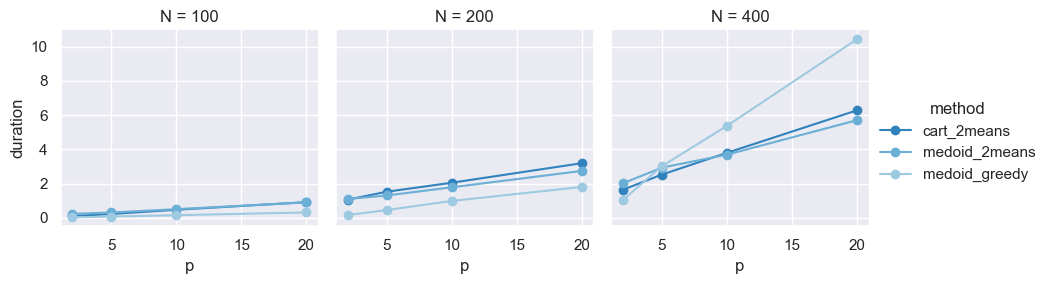

In [3]:
from plot_bench import *
sns.set_theme()
forest_df = make_forest_df(df)
grid = plot_forest_df(forest_df)

## MSE CART vs Medoid

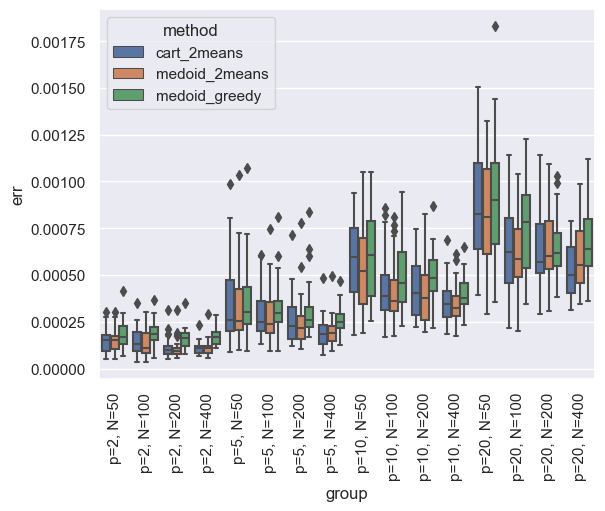

In [5]:
order = [
    f'p={p}, N={N}'
    for p in [2,5,10,20]
    for N in [50,100,200,400]
]
sns.boxplot(df, y='err', x='group', hue='method', order=order)

plt.xticks(rotation=90);

## Runtime CART vs Medoid

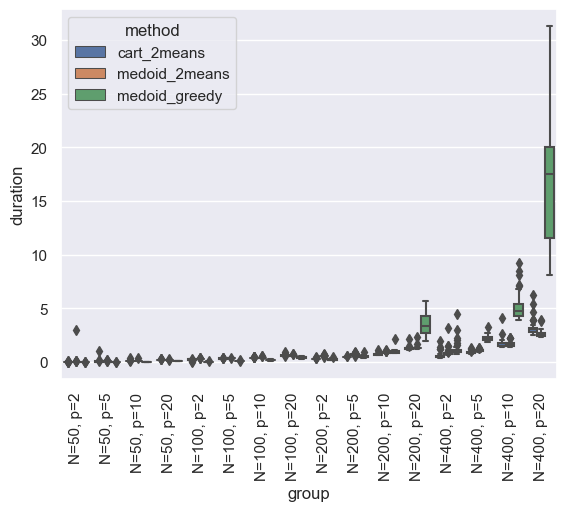

In [28]:
sns.boxplot(df, y='duration', x='group', hue='method')
plt.xticks(rotation=90);